In [2]:
import os
import sys
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import gym

LOCAL_PATH = os.getcwd()
print(os.listdir(LOCAL_PATH))
sys.path.append(LOCAL_PATH)
sys.path.append(LOCAL_PATH + '/lib')

from hajeTTTEnv import *

['.ipynb_checkpoints', 'lib', 'TicTacToeTrialRun.ipynb']


In [3]:
env = TicTacToeEnv()
env.render()

   | | 
  -----
   | | 
  -----
   | | 



In [6]:
dir(env)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_obs',
 '_show_board',
 '_show_episode',
 '_show_result',
 '_show_turn',
 'action_space',
 'alpha',
 'available_actions',
 'board',
 'close',
 'done',
 'mark',
 'metadata',
 'observation_space',
 'render',
 'reset',
 'reward_range',
 'seed',
 'set_start_mark',
 'show_episode',
 'show_number',
 'show_result',
 'show_turn',
 'spec',
 'start_mark',
 'step',
 'unwrapped']

In [8]:
env.action_space

Discrete(9)

In [9]:
env.observation_space

Discrete(9)

In [10]:
state = env.reset()
state

((0, 0, 0, 0, 0, 0, 0, 0, 0), 'O')

In [13]:
dir(env.action_space)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_np_random',
 'contains',
 'dtype',
 'from_jsonable',
 'n',
 'np_random',
 'sample',
 'seed',
 'shape',
 'to_jsonable']

In [14]:
qlearn_Q = np.zeros((env.action_space.n, 3, 3, 3, 3, 3, 3, 3, 3, 3))
qlearn_Q[[0, 1, 2, 3, 4], 0, 0, 0, 0, 0, 0, 0, 0, 0]

array([0., 0., 0., 0., 0.])

In [94]:
## Note: By default environment assumes 'O' starts first. Has positive reward
## The second mark, X, goes second, and has a negative reward
def q_learning_train_function(n_episodes=100000, visualize_env=False, print_output=False,
                        alpha=0.3, gamma=0.9, epsilon=0.1):
    
    ################################### 
    ### Q-TABLE INITIALIZATION HERE ### 

    ## Q-table is 10 dimensions, the first being the action space(9 rows).
    ## The remaining 9 dimensions are one of the three possible values of each square:
    ## 0 is blank, 1 is 'O', 2 is 'X'

    qlearn_Q = np.zeros((env.action_space.n, 
                         3, 3, 3, 
                         3, 3, 3, 
                         3, 3, 3))

    ################################### 

    R_q_agent = [] # for collecting returns
    T_q_agent = [] # for collecting number of timesteps

    start = random.uniform(0, 1)
    if start > 0.5:
        start_first= True
    else:
        start_first = False

    for i_episode in range(n_episodes):

        agent_turn = start_first

        if print_output:
            print('Episode: ' + str(i_episode+1))

        # Reset environment at the beginning of each episode. 
        observation, mark = env.reset()

        done = False

        t = 0 # timestep counter
        ep_return = 0 # return_counter

        available_actions = env.available_actions()

        # Loop through time steps. 
        while not done:

            if print_output:
                print('Timestep: ' + str(t+1))

            # Visualize state of the environment. 
            if visualize_env:
                env.render()
                print('\n ')

            if agent_turn:
                # Pick an action. (Agent's Turn)
                ############################ 
                ### E-GREEDY POLICY HERE ###

                explore = random.uniform(0, 1)

                if explore > epsilon:
                    if start_first:
                        action_index = np.argmax(qlearn_Q[available_actions, 
                                                         observation[0], observation[1], observation[2],
                                                         observation[3], observation[4], observation[5],
                                                         observation[6], observation[7], observation[8]])
                    else:
                        action_index = np.argmin(qlearn_Q[available_actions, 
                                                         observation[0], observation[1], observation[2],
                                                         observation[3], observation[4], observation[5],
                                                         observation[6], observation[7], observation[8]])
                    action = available_actions[action_index]
                else:
                    action = np.random.choice(available_actions)

                ############################ 
            else:
                action = np.random.choice(available_actions)

            if print_output:
                print('Action: ', action)

            # Step through and observe new state and reward. 
            ##########################
            ### STEP FUNCTION HERE ###

            (next_observation, next_mark), reward, done, info = env.step(action)
            available_actions = env.available_actions()

            ##########################

            ###########################
            ### Q-VALUE UPDATE HERE ###

            try:
                if start_first:
                    next_obs_Q = qlearn_Q[available_actions[np.argmax(qlearn_Q[available_actions, 
                                                         next_observation[0], next_observation[1], next_observation[2],
                                                         next_observation[3], next_observation[4], next_observation[5],
                                                         next_observation[6], next_observation[7], next_observation[8]])], 
                                      next_observation[0], next_observation[1], next_observation[2],
                                      next_observation[3], next_observation[4], next_observation[5],
                                      next_observation[6], next_observation[7], next_observation[8]]
                else:
                    next_obs_Q = qlearn_Q[available_actions[np.argmin(qlearn_Q[available_actions, 
                                                         next_observation[0], next_observation[1], next_observation[2],
                                                         next_observation[3], next_observation[4], next_observation[5],
                                                         next_observation[6], next_observation[7], next_observation[8]])], 
                                      next_observation[0], next_observation[1], next_observation[2],
                                      next_observation[3], next_observation[4], next_observation[5],
                                      next_observation[6], next_observation[7], next_observation[8]]

            except ValueError:
                next_obs_Q = 0
            old_Q = qlearn_Q[action, 
                            observation[0], observation[1], observation[2],
                            observation[3], observation[4], observation[5],
                            observation[6], observation[7], observation[8]]
            updated_Q = old_Q + alpha * (reward + gamma * next_obs_Q - old_Q)

            qlearn_Q[action, 
                    observation[0], observation[1], observation[2],
                    observation[3], observation[4], observation[5],
                    observation[6], observation[7], observation[8]] = updated_Q
            observation = next_observation
            mark = next_mark

            ###########################

            # Update counters.
            if start_first:
                ep_return += reward
            else:
                ep_return -= reward

            t += 1
            agent_turn = not agent_turn

            if print_output:
                print('Reward: ' + str(reward))

            # Check if we reached the terminal state. 
            if done:
                R_q_agent.append(ep_return)
                T_q_agent.append(t)
                start_first = not start_first
                break

        if print_output:
            print("Timesteps taken: {}".format(t))
            print("Episode return: {}".format(ep_return))

    env.close()
    return qlearn_Q, R_q_agent, T_q_agent

In [95]:
epsilons = [0.1, 0.2]
results = {}
for epsilon in epsilons:
    results[epsilon] = q_learning_train_function(epsilon=epsilon)

Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9
Episode: 10
Episode: 11
Episode: 12
Episode: 13
Episode: 14
Episode: 15
Episode: 16
Episode: 17
Episode: 18
Episode: 19
Episode: 20
Episode: 21
Episode: 22
Episode: 23
Episode: 24
Episode: 25
Episode: 26
Episode: 27
Episode: 28
Episode: 29
Episode: 30
Episode: 31
Episode: 32
Episode: 33
Episode: 34
Episode: 35
Episode: 36
Episode: 37
Episode: 38
Episode: 39
Episode: 40
Episode: 41
Episode: 42
Episode: 43
Episode: 44
Episode: 45
Episode: 46
Episode: 47
Episode: 48
Episode: 49
Episode: 50
Episode: 51
Episode: 52
Episode: 53
Episode: 54
Episode: 55
Episode: 56
Episode: 57
Episode: 58
Episode: 59
Episode: 60
Episode: 61
Episode: 62
Episode: 63
Episode: 64
Episode: 65
Episode: 66
Episode: 67
Episode: 68
Episode: 69
Episode: 70
Episode: 71
Episode: 72
Episode: 73
Episode: 74
Episode: 75
Episode: 76
Episode: 77
Episode: 78
Episode: 79
Episode: 80
Episode: 81
Episode: 82
Episode: 83
Episode: 84
E

Episode: 978
Episode: 979
Episode: 980
Episode: 981
Episode: 982
Episode: 983
Episode: 984
Episode: 985
Episode: 986
Episode: 987
Episode: 988
Episode: 989
Episode: 990
Episode: 991
Episode: 992
Episode: 993
Episode: 994
Episode: 995
Episode: 996
Episode: 997
Episode: 998
Episode: 999
Episode: 1000
Episode: 1001
Episode: 1002
Episode: 1003
Episode: 1004
Episode: 1005
Episode: 1006
Episode: 1007
Episode: 1008
Episode: 1009
Episode: 1010
Episode: 1011
Episode: 1012
Episode: 1013
Episode: 1014
Episode: 1015
Episode: 1016
Episode: 1017
Episode: 1018
Episode: 1019
Episode: 1020
Episode: 1021
Episode: 1022
Episode: 1023
Episode: 1024
Episode: 1025
Episode: 1026
Episode: 1027
Episode: 1028
Episode: 1029
Episode: 1030
Episode: 1031
Episode: 1032
Episode: 1033
Episode: 1034
Episode: 1035
Episode: 1036
Episode: 1037
Episode: 1038
Episode: 1039
Episode: 1040
Episode: 1041
Episode: 1042
Episode: 1043
Episode: 1044
Episode: 1045
Episode: 1046
Episode: 1047
Episode: 1048
Episode: 1049
Episode: 1050


Episode: 2013
Episode: 2014
Episode: 2015
Episode: 2016
Episode: 2017
Episode: 2018
Episode: 2019
Episode: 2020
Episode: 2021
Episode: 2022
Episode: 2023
Episode: 2024
Episode: 2025
Episode: 2026
Episode: 2027
Episode: 2028
Episode: 2029
Episode: 2030
Episode: 2031
Episode: 2032
Episode: 2033
Episode: 2034
Episode: 2035
Episode: 2036
Episode: 2037
Episode: 2038
Episode: 2039
Episode: 2040
Episode: 2041
Episode: 2042
Episode: 2043
Episode: 2044
Episode: 2045
Episode: 2046
Episode: 2047
Episode: 2048
Episode: 2049
Episode: 2050
Episode: 2051
Episode: 2052
Episode: 2053
Episode: 2054
Episode: 2055
Episode: 2056
Episode: 2057
Episode: 2058
Episode: 2059
Episode: 2060
Episode: 2061
Episode: 2062
Episode: 2063
Episode: 2064
Episode: 2065
Episode: 2066
Episode: 2067
Episode: 2068
Episode: 2069
Episode: 2070
Episode: 2071
Episode: 2072
Episode: 2073
Episode: 2074
Episode: 2075
Episode: 2076
Episode: 2077
Episode: 2078
Episode: 2079
Episode: 2080
Episode: 2081
Episode: 2082
Episode: 2083
Episod

Episode: 3029
Episode: 3030
Episode: 3031
Episode: 3032
Episode: 3033
Episode: 3034
Episode: 3035
Episode: 3036
Episode: 3037
Episode: 3038
Episode: 3039
Episode: 3040
Episode: 3041
Episode: 3042
Episode: 3043
Episode: 3044
Episode: 3045
Episode: 3046
Episode: 3047
Episode: 3048
Episode: 3049
Episode: 3050
Episode: 3051
Episode: 3052
Episode: 3053
Episode: 3054
Episode: 3055
Episode: 3056
Episode: 3057
Episode: 3058
Episode: 3059
Episode: 3060
Episode: 3061
Episode: 3062
Episode: 3063
Episode: 3064
Episode: 3065
Episode: 3066
Episode: 3067
Episode: 3068
Episode: 3069
Episode: 3070
Episode: 3071
Episode: 3072
Episode: 3073
Episode: 3074
Episode: 3075
Episode: 3076
Episode: 3077
Episode: 3078
Episode: 3079
Episode: 3080
Episode: 3081
Episode: 3082
Episode: 3083
Episode: 3084
Episode: 3085
Episode: 3086
Episode: 3087
Episode: 3088
Episode: 3089
Episode: 3090
Episode: 3091
Episode: 3092
Episode: 3093
Episode: 3094
Episode: 3095
Episode: 3096
Episode: 3097
Episode: 3098
Episode: 3099
Episod

Episode: 4026
Episode: 4027
Episode: 4028
Episode: 4029
Episode: 4030
Episode: 4031
Episode: 4032
Episode: 4033
Episode: 4034
Episode: 4035
Episode: 4036
Episode: 4037
Episode: 4038
Episode: 4039
Episode: 4040
Episode: 4041
Episode: 4042
Episode: 4043
Episode: 4044
Episode: 4045
Episode: 4046
Episode: 4047
Episode: 4048
Episode: 4049
Episode: 4050
Episode: 4051
Episode: 4052
Episode: 4053
Episode: 4054
Episode: 4055
Episode: 4056
Episode: 4057
Episode: 4058
Episode: 4059
Episode: 4060
Episode: 4061
Episode: 4062
Episode: 4063
Episode: 4064
Episode: 4065
Episode: 4066
Episode: 4067
Episode: 4068
Episode: 4069
Episode: 4070
Episode: 4071
Episode: 4072
Episode: 4073
Episode: 4074
Episode: 4075
Episode: 4076
Episode: 4077
Episode: 4078
Episode: 4079
Episode: 4080
Episode: 4081
Episode: 4082
Episode: 4083
Episode: 4084
Episode: 4085
Episode: 4086
Episode: 4087
Episode: 4088
Episode: 4089
Episode: 4090
Episode: 4091
Episode: 4092
Episode: 4093
Episode: 4094
Episode: 4095
Episode: 4096
Episod

Episode: 5045
Episode: 5046
Episode: 5047
Episode: 5048
Episode: 5049
Episode: 5050
Episode: 5051
Episode: 5052
Episode: 5053
Episode: 5054
Episode: 5055
Episode: 5056
Episode: 5057
Episode: 5058
Episode: 5059
Episode: 5060
Episode: 5061
Episode: 5062
Episode: 5063
Episode: 5064
Episode: 5065
Episode: 5066
Episode: 5067
Episode: 5068
Episode: 5069
Episode: 5070
Episode: 5071
Episode: 5072
Episode: 5073
Episode: 5074
Episode: 5075
Episode: 5076
Episode: 5077
Episode: 5078
Episode: 5079
Episode: 5080
Episode: 5081
Episode: 5082
Episode: 5083
Episode: 5084
Episode: 5085
Episode: 5086
Episode: 5087
Episode: 5088
Episode: 5089
Episode: 5090
Episode: 5091
Episode: 5092
Episode: 5093
Episode: 5094
Episode: 5095
Episode: 5096
Episode: 5097
Episode: 5098
Episode: 5099
Episode: 5100
Episode: 5101
Episode: 5102
Episode: 5103
Episode: 5104
Episode: 5105
Episode: 5106
Episode: 5107
Episode: 5108
Episode: 5109
Episode: 5110
Episode: 5111
Episode: 5112
Episode: 5113
Episode: 5114
Episode: 5115
Episod

Episode: 6039
Episode: 6040
Episode: 6041
Episode: 6042
Episode: 6043
Episode: 6044
Episode: 6045
Episode: 6046
Episode: 6047
Episode: 6048
Episode: 6049
Episode: 6050
Episode: 6051
Episode: 6052
Episode: 6053
Episode: 6054
Episode: 6055
Episode: 6056
Episode: 6057
Episode: 6058
Episode: 6059
Episode: 6060
Episode: 6061
Episode: 6062
Episode: 6063
Episode: 6064
Episode: 6065
Episode: 6066
Episode: 6067
Episode: 6068
Episode: 6069
Episode: 6070
Episode: 6071
Episode: 6072
Episode: 6073
Episode: 6074
Episode: 6075
Episode: 6076
Episode: 6077
Episode: 6078
Episode: 6079
Episode: 6080
Episode: 6081
Episode: 6082
Episode: 6083
Episode: 6084
Episode: 6085
Episode: 6086
Episode: 6087
Episode: 6088
Episode: 6089
Episode: 6090
Episode: 6091
Episode: 6092
Episode: 6093
Episode: 6094
Episode: 6095
Episode: 6096
Episode: 6097
Episode: 6098
Episode: 6099
Episode: 6100
Episode: 6101
Episode: 6102
Episode: 6103
Episode: 6104
Episode: 6105
Episode: 6106
Episode: 6107
Episode: 6108
Episode: 6109
Episod

Episode: 7045
Episode: 7046
Episode: 7047
Episode: 7048
Episode: 7049
Episode: 7050
Episode: 7051
Episode: 7052
Episode: 7053
Episode: 7054
Episode: 7055
Episode: 7056
Episode: 7057
Episode: 7058
Episode: 7059
Episode: 7060
Episode: 7061
Episode: 7062
Episode: 7063
Episode: 7064
Episode: 7065
Episode: 7066
Episode: 7067
Episode: 7068
Episode: 7069
Episode: 7070
Episode: 7071
Episode: 7072
Episode: 7073
Episode: 7074
Episode: 7075
Episode: 7076
Episode: 7077
Episode: 7078
Episode: 7079
Episode: 7080
Episode: 7081
Episode: 7082
Episode: 7083
Episode: 7084
Episode: 7085
Episode: 7086
Episode: 7087
Episode: 7088
Episode: 7089
Episode: 7090
Episode: 7091
Episode: 7092
Episode: 7093
Episode: 7094
Episode: 7095
Episode: 7096
Episode: 7097
Episode: 7098
Episode: 7099
Episode: 7100
Episode: 7101
Episode: 7102
Episode: 7103
Episode: 7104
Episode: 7105
Episode: 7106
Episode: 7107
Episode: 7108
Episode: 7109
Episode: 7110
Episode: 7111
Episode: 7112
Episode: 7113
Episode: 7114
Episode: 7115
Episod

Episode: 8057
Episode: 8058
Episode: 8059
Episode: 8060
Episode: 8061
Episode: 8062
Episode: 8063
Episode: 8064
Episode: 8065
Episode: 8066
Episode: 8067
Episode: 8068
Episode: 8069
Episode: 8070
Episode: 8071
Episode: 8072
Episode: 8073
Episode: 8074
Episode: 8075
Episode: 8076
Episode: 8077
Episode: 8078
Episode: 8079
Episode: 8080
Episode: 8081
Episode: 8082
Episode: 8083
Episode: 8084
Episode: 8085
Episode: 8086
Episode: 8087
Episode: 8088
Episode: 8089
Episode: 8090
Episode: 8091
Episode: 8092
Episode: 8093
Episode: 8094
Episode: 8095
Episode: 8096
Episode: 8097
Episode: 8098
Episode: 8099
Episode: 8100
Episode: 8101
Episode: 8102
Episode: 8103
Episode: 8104
Episode: 8105
Episode: 8106
Episode: 8107
Episode: 8108
Episode: 8109
Episode: 8110
Episode: 8111
Episode: 8112
Episode: 8113
Episode: 8114
Episode: 8115
Episode: 8116
Episode: 8117
Episode: 8118
Episode: 8119
Episode: 8120
Episode: 8121
Episode: 8122
Episode: 8123
Episode: 8124
Episode: 8125
Episode: 8126
Episode: 8127
Episod

Episode: 9088
Episode: 9089
Episode: 9090
Episode: 9091
Episode: 9092
Episode: 9093
Episode: 9094
Episode: 9095
Episode: 9096
Episode: 9097
Episode: 9098
Episode: 9099
Episode: 9100
Episode: 9101
Episode: 9102
Episode: 9103
Episode: 9104
Episode: 9105
Episode: 9106
Episode: 9107
Episode: 9108
Episode: 9109
Episode: 9110
Episode: 9111
Episode: 9112
Episode: 9113
Episode: 9114
Episode: 9115
Episode: 9116
Episode: 9117
Episode: 9118
Episode: 9119
Episode: 9120
Episode: 9121
Episode: 9122
Episode: 9123
Episode: 9124
Episode: 9125
Episode: 9126
Episode: 9127
Episode: 9128
Episode: 9129
Episode: 9130
Episode: 9131
Episode: 9132
Episode: 9133
Episode: 9134
Episode: 9135
Episode: 9136
Episode: 9137
Episode: 9138
Episode: 9139
Episode: 9140
Episode: 9141
Episode: 9142
Episode: 9143
Episode: 9144
Episode: 9145
Episode: 9146
Episode: 9147
Episode: 9148
Episode: 9149
Episode: 9150
Episode: 9151
Episode: 9152
Episode: 9153
Episode: 9154
Episode: 9155
Episode: 9156
Episode: 9157
Episode: 9158
Episod

Episode: 10114
Episode: 10115
Episode: 10116
Episode: 10117
Episode: 10118
Episode: 10119
Episode: 10120
Episode: 10121
Episode: 10122
Episode: 10123
Episode: 10124
Episode: 10125
Episode: 10126
Episode: 10127
Episode: 10128
Episode: 10129
Episode: 10130
Episode: 10131
Episode: 10132
Episode: 10133
Episode: 10134
Episode: 10135
Episode: 10136
Episode: 10137
Episode: 10138
Episode: 10139
Episode: 10140
Episode: 10141
Episode: 10142
Episode: 10143
Episode: 10144
Episode: 10145
Episode: 10146
Episode: 10147
Episode: 10148
Episode: 10149
Episode: 10150
Episode: 10151
Episode: 10152
Episode: 10153
Episode: 10154
Episode: 10155
Episode: 10156
Episode: 10157
Episode: 10158
Episode: 10159
Episode: 10160
Episode: 10161
Episode: 10162
Episode: 10163
Episode: 10164
Episode: 10165
Episode: 10166
Episode: 10167
Episode: 10168
Episode: 10169
Episode: 10170
Episode: 10171
Episode: 10172
Episode: 10173
Episode: 10174
Episode: 10175
Episode: 10176
Episode: 10177
Episode: 10178
Episode: 10179
Episode: 1

Episode: 11157
Episode: 11158
Episode: 11159
Episode: 11160
Episode: 11161
Episode: 11162
Episode: 11163
Episode: 11164
Episode: 11165
Episode: 11166
Episode: 11167
Episode: 11168
Episode: 11169
Episode: 11170
Episode: 11171
Episode: 11172
Episode: 11173
Episode: 11174
Episode: 11175
Episode: 11176
Episode: 11177
Episode: 11178
Episode: 11179
Episode: 11180
Episode: 11181
Episode: 11182
Episode: 11183
Episode: 11184
Episode: 11185
Episode: 11186
Episode: 11187
Episode: 11188
Episode: 11189
Episode: 11190
Episode: 11191
Episode: 11192
Episode: 11193
Episode: 11194
Episode: 11195
Episode: 11196
Episode: 11197
Episode: 11198
Episode: 11199
Episode: 11200
Episode: 11201
Episode: 11202
Episode: 11203
Episode: 11204
Episode: 11205
Episode: 11206
Episode: 11207
Episode: 11208
Episode: 11209
Episode: 11210
Episode: 11211
Episode: 11212
Episode: 11213
Episode: 11214
Episode: 11215
Episode: 11216
Episode: 11217
Episode: 11218
Episode: 11219
Episode: 11220
Episode: 11221
Episode: 11222
Episode: 1

Episode: 12158
Episode: 12159
Episode: 12160
Episode: 12161
Episode: 12162
Episode: 12163
Episode: 12164
Episode: 12165
Episode: 12166
Episode: 12167
Episode: 12168
Episode: 12169
Episode: 12170
Episode: 12171
Episode: 12172
Episode: 12173
Episode: 12174
Episode: 12175
Episode: 12176
Episode: 12177
Episode: 12178
Episode: 12179
Episode: 12180
Episode: 12181
Episode: 12182
Episode: 12183
Episode: 12184
Episode: 12185
Episode: 12186
Episode: 12187
Episode: 12188
Episode: 12189
Episode: 12190
Episode: 12191
Episode: 12192
Episode: 12193
Episode: 12194
Episode: 12195
Episode: 12196
Episode: 12197
Episode: 12198
Episode: 12199
Episode: 12200
Episode: 12201
Episode: 12202
Episode: 12203
Episode: 12204
Episode: 12205
Episode: 12206
Episode: 12207
Episode: 12208
Episode: 12209
Episode: 12210
Episode: 12211
Episode: 12212
Episode: 12213
Episode: 12214
Episode: 12215
Episode: 12216
Episode: 12217
Episode: 12218
Episode: 12219
Episode: 12220
Episode: 12221
Episode: 12222
Episode: 12223
Episode: 1

Episode: 13188
Episode: 13189
Episode: 13190
Episode: 13191
Episode: 13192
Episode: 13193
Episode: 13194
Episode: 13195
Episode: 13196
Episode: 13197
Episode: 13198
Episode: 13199
Episode: 13200
Episode: 13201
Episode: 13202
Episode: 13203
Episode: 13204
Episode: 13205
Episode: 13206
Episode: 13207
Episode: 13208
Episode: 13209
Episode: 13210
Episode: 13211
Episode: 13212
Episode: 13213
Episode: 13214
Episode: 13215
Episode: 13216
Episode: 13217
Episode: 13218
Episode: 13219
Episode: 13220
Episode: 13221
Episode: 13222
Episode: 13223
Episode: 13224
Episode: 13225
Episode: 13226
Episode: 13227
Episode: 13228
Episode: 13229
Episode: 13230
Episode: 13231
Episode: 13232
Episode: 13233
Episode: 13234
Episode: 13235
Episode: 13236
Episode: 13237
Episode: 13238
Episode: 13239
Episode: 13240
Episode: 13241
Episode: 13242
Episode: 13243
Episode: 13244
Episode: 13245
Episode: 13246
Episode: 13247
Episode: 13248
Episode: 13249
Episode: 13250
Episode: 13251
Episode: 13252
Episode: 13253
Episode: 1

Episode: 14212
Episode: 14213
Episode: 14214
Episode: 14215
Episode: 14216
Episode: 14217
Episode: 14218
Episode: 14219
Episode: 14220
Episode: 14221
Episode: 14222
Episode: 14223
Episode: 14224
Episode: 14225
Episode: 14226
Episode: 14227
Episode: 14228
Episode: 14229
Episode: 14230
Episode: 14231
Episode: 14232
Episode: 14233
Episode: 14234
Episode: 14235
Episode: 14236
Episode: 14237
Episode: 14238
Episode: 14239
Episode: 14240
Episode: 14241
Episode: 14242
Episode: 14243
Episode: 14244
Episode: 14245
Episode: 14246
Episode: 14247
Episode: 14248
Episode: 14249
Episode: 14250
Episode: 14251
Episode: 14252
Episode: 14253
Episode: 14254
Episode: 14255
Episode: 14256
Episode: 14257
Episode: 14258
Episode: 14259
Episode: 14260
Episode: 14261
Episode: 14262
Episode: 14263
Episode: 14264
Episode: 14265
Episode: 14266
Episode: 14267
Episode: 14268
Episode: 14269
Episode: 14270
Episode: 14271
Episode: 14272
Episode: 14273
Episode: 14274
Episode: 14275
Episode: 14276
Episode: 14277
Episode: 1

Episode: 15226
Episode: 15227
Episode: 15228
Episode: 15229
Episode: 15230
Episode: 15231
Episode: 15232
Episode: 15233
Episode: 15234
Episode: 15235
Episode: 15236
Episode: 15237
Episode: 15238
Episode: 15239
Episode: 15240
Episode: 15241
Episode: 15242
Episode: 15243
Episode: 15244
Episode: 15245
Episode: 15246
Episode: 15247
Episode: 15248
Episode: 15249
Episode: 15250
Episode: 15251
Episode: 15252
Episode: 15253
Episode: 15254
Episode: 15255
Episode: 15256
Episode: 15257
Episode: 15258
Episode: 15259
Episode: 15260
Episode: 15261
Episode: 15262
Episode: 15263
Episode: 15264
Episode: 15265
Episode: 15266
Episode: 15267
Episode: 15268
Episode: 15269
Episode: 15270
Episode: 15271
Episode: 15272
Episode: 15273
Episode: 15274
Episode: 15275
Episode: 15276
Episode: 15277
Episode: 15278
Episode: 15279
Episode: 15280
Episode: 15281
Episode: 15282
Episode: 15283
Episode: 15284
Episode: 15285
Episode: 15286
Episode: 15287
Episode: 15288
Episode: 15289
Episode: 15290
Episode: 15291
Episode: 1

Episode: 16243
Episode: 16244
Episode: 16245
Episode: 16246
Episode: 16247
Episode: 16248
Episode: 16249
Episode: 16250
Episode: 16251
Episode: 16252
Episode: 16253
Episode: 16254
Episode: 16255
Episode: 16256
Episode: 16257
Episode: 16258
Episode: 16259
Episode: 16260
Episode: 16261
Episode: 16262
Episode: 16263
Episode: 16264
Episode: 16265
Episode: 16266
Episode: 16267
Episode: 16268
Episode: 16269
Episode: 16270
Episode: 16271
Episode: 16272
Episode: 16273
Episode: 16274
Episode: 16275
Episode: 16276
Episode: 16277
Episode: 16278
Episode: 16279
Episode: 16280
Episode: 16281
Episode: 16282
Episode: 16283
Episode: 16284
Episode: 16285
Episode: 16286
Episode: 16287
Episode: 16288
Episode: 16289
Episode: 16290
Episode: 16291
Episode: 16292
Episode: 16293
Episode: 16294
Episode: 16295
Episode: 16296
Episode: 16297
Episode: 16298
Episode: 16299
Episode: 16300
Episode: 16301
Episode: 16302
Episode: 16303
Episode: 16304
Episode: 16305
Episode: 16306
Episode: 16307
Episode: 16308
Episode: 1

Episode: 17186
Episode: 17187
Episode: 17188
Episode: 17189
Episode: 17190
Episode: 17191
Episode: 17192
Episode: 17193
Episode: 17194
Episode: 17195
Episode: 17196
Episode: 17197
Episode: 17198
Episode: 17199
Episode: 17200
Episode: 17201
Episode: 17202
Episode: 17203
Episode: 17204
Episode: 17205
Episode: 17206
Episode: 17207
Episode: 17208
Episode: 17209
Episode: 17210
Episode: 17211
Episode: 17212
Episode: 17213
Episode: 17214
Episode: 17215
Episode: 17216
Episode: 17217
Episode: 17218
Episode: 17219
Episode: 17220
Episode: 17221
Episode: 17222
Episode: 17223
Episode: 17224
Episode: 17225
Episode: 17226
Episode: 17227
Episode: 17228
Episode: 17229
Episode: 17230
Episode: 17231
Episode: 17232
Episode: 17233
Episode: 17234
Episode: 17235
Episode: 17236
Episode: 17237
Episode: 17238
Episode: 17239
Episode: 17240
Episode: 17241
Episode: 17242
Episode: 17243
Episode: 17244
Episode: 17245
Episode: 17246
Episode: 17247
Episode: 17248
Episode: 17249
Episode: 17250
Episode: 17251
Episode: 1

Episode: 18125
Episode: 18126
Episode: 18127
Episode: 18128
Episode: 18129
Episode: 18130
Episode: 18131
Episode: 18132
Episode: 18133
Episode: 18134
Episode: 18135
Episode: 18136
Episode: 18137
Episode: 18138
Episode: 18139
Episode: 18140
Episode: 18141
Episode: 18142
Episode: 18143
Episode: 18144
Episode: 18145
Episode: 18146
Episode: 18147
Episode: 18148
Episode: 18149
Episode: 18150
Episode: 18151
Episode: 18152
Episode: 18153
Episode: 18154
Episode: 18155
Episode: 18156
Episode: 18157
Episode: 18158
Episode: 18159
Episode: 18160
Episode: 18161
Episode: 18162
Episode: 18163
Episode: 18164
Episode: 18165
Episode: 18166
Episode: 18167
Episode: 18168
Episode: 18169
Episode: 18170
Episode: 18171
Episode: 18172
Episode: 18173
Episode: 18174
Episode: 18175
Episode: 18176
Episode: 18177
Episode: 18178
Episode: 18179
Episode: 18180
Episode: 18181
Episode: 18182
Episode: 18183
Episode: 18184
Episode: 18185
Episode: 18186
Episode: 18187
Episode: 18188
Episode: 18189
Episode: 18190
Episode: 1

Episode: 19115
Episode: 19116
Episode: 19117
Episode: 19118
Episode: 19119
Episode: 19120
Episode: 19121
Episode: 19122
Episode: 19123
Episode: 19124
Episode: 19125
Episode: 19126
Episode: 19127
Episode: 19128
Episode: 19129
Episode: 19130
Episode: 19131
Episode: 19132
Episode: 19133
Episode: 19134
Episode: 19135
Episode: 19136
Episode: 19137
Episode: 19138
Episode: 19139
Episode: 19140
Episode: 19141
Episode: 19142
Episode: 19143
Episode: 19144
Episode: 19145
Episode: 19146
Episode: 19147
Episode: 19148
Episode: 19149
Episode: 19150
Episode: 19151
Episode: 19152
Episode: 19153
Episode: 19154
Episode: 19155
Episode: 19156
Episode: 19157
Episode: 19158
Episode: 19159
Episode: 19160
Episode: 19161
Episode: 19162
Episode: 19163
Episode: 19164
Episode: 19165
Episode: 19166
Episode: 19167
Episode: 19168
Episode: 19169
Episode: 19170
Episode: 19171
Episode: 19172
Episode: 19173
Episode: 19174
Episode: 19175
Episode: 19176
Episode: 19177
Episode: 19178
Episode: 19179
Episode: 19180
Episode: 1

Episode: 20155
Episode: 20156
Episode: 20157
Episode: 20158
Episode: 20159
Episode: 20160
Episode: 20161
Episode: 20162
Episode: 20163
Episode: 20164
Episode: 20165
Episode: 20166
Episode: 20167
Episode: 20168
Episode: 20169
Episode: 20170
Episode: 20171
Episode: 20172
Episode: 20173
Episode: 20174
Episode: 20175
Episode: 20176
Episode: 20177
Episode: 20178
Episode: 20179
Episode: 20180
Episode: 20181
Episode: 20182
Episode: 20183
Episode: 20184
Episode: 20185
Episode: 20186
Episode: 20187
Episode: 20188
Episode: 20189
Episode: 20190
Episode: 20191
Episode: 20192
Episode: 20193
Episode: 20194
Episode: 20195
Episode: 20196
Episode: 20197
Episode: 20198
Episode: 20199
Episode: 20200
Episode: 20201
Episode: 20202
Episode: 20203
Episode: 20204
Episode: 20205
Episode: 20206
Episode: 20207
Episode: 20208
Episode: 20209
Episode: 20210
Episode: 20211
Episode: 20212
Episode: 20213
Episode: 20214
Episode: 20215
Episode: 20216
Episode: 20217
Episode: 20218
Episode: 20219
Episode: 20220
Episode: 2

Episode: 21195
Episode: 21196
Episode: 21197
Episode: 21198
Episode: 21199
Episode: 21200
Episode: 21201
Episode: 21202
Episode: 21203
Episode: 21204
Episode: 21205
Episode: 21206
Episode: 21207
Episode: 21208
Episode: 21209
Episode: 21210
Episode: 21211
Episode: 21212
Episode: 21213
Episode: 21214
Episode: 21215
Episode: 21216
Episode: 21217
Episode: 21218
Episode: 21219
Episode: 21220
Episode: 21221
Episode: 21222
Episode: 21223
Episode: 21224
Episode: 21225
Episode: 21226
Episode: 21227
Episode: 21228
Episode: 21229
Episode: 21230
Episode: 21231
Episode: 21232
Episode: 21233
Episode: 21234
Episode: 21235
Episode: 21236
Episode: 21237
Episode: 21238
Episode: 21239
Episode: 21240
Episode: 21241
Episode: 21242
Episode: 21243
Episode: 21244
Episode: 21245
Episode: 21246
Episode: 21247
Episode: 21248
Episode: 21249
Episode: 21250
Episode: 21251
Episode: 21252
Episode: 21253
Episode: 21254
Episode: 21255
Episode: 21256
Episode: 21257
Episode: 21258
Episode: 21259
Episode: 21260
Episode: 2

Episode: 22202
Episode: 22203
Episode: 22204
Episode: 22205
Episode: 22206
Episode: 22207
Episode: 22208
Episode: 22209
Episode: 22210
Episode: 22211
Episode: 22212
Episode: 22213
Episode: 22214
Episode: 22215
Episode: 22216
Episode: 22217
Episode: 22218
Episode: 22219
Episode: 22220
Episode: 22221
Episode: 22222
Episode: 22223
Episode: 22224
Episode: 22225
Episode: 22226
Episode: 22227
Episode: 22228
Episode: 22229
Episode: 22230
Episode: 22231
Episode: 22232
Episode: 22233
Episode: 22234
Episode: 22235
Episode: 22236
Episode: 22237
Episode: 22238
Episode: 22239
Episode: 22240
Episode: 22241
Episode: 22242
Episode: 22243
Episode: 22244
Episode: 22245
Episode: 22246
Episode: 22247
Episode: 22248
Episode: 22249
Episode: 22250
Episode: 22251
Episode: 22252
Episode: 22253
Episode: 22254
Episode: 22255
Episode: 22256
Episode: 22257
Episode: 22258
Episode: 22259
Episode: 22260
Episode: 22261
Episode: 22262
Episode: 22263
Episode: 22264
Episode: 22265
Episode: 22266
Episode: 22267
Episode: 2

Episode: 23237
Episode: 23238
Episode: 23239
Episode: 23240
Episode: 23241
Episode: 23242
Episode: 23243
Episode: 23244
Episode: 23245
Episode: 23246
Episode: 23247
Episode: 23248
Episode: 23249
Episode: 23250
Episode: 23251
Episode: 23252
Episode: 23253
Episode: 23254
Episode: 23255
Episode: 23256
Episode: 23257
Episode: 23258
Episode: 23259
Episode: 23260
Episode: 23261
Episode: 23262
Episode: 23263
Episode: 23264
Episode: 23265
Episode: 23266
Episode: 23267
Episode: 23268
Episode: 23269
Episode: 23270
Episode: 23271
Episode: 23272
Episode: 23273
Episode: 23274
Episode: 23275
Episode: 23276
Episode: 23277
Episode: 23278
Episode: 23279
Episode: 23280
Episode: 23281
Episode: 23282
Episode: 23283
Episode: 23284
Episode: 23285
Episode: 23286
Episode: 23287
Episode: 23288
Episode: 23289
Episode: 23290
Episode: 23291
Episode: 23292
Episode: 23293
Episode: 23294
Episode: 23295
Episode: 23296
Episode: 23297
Episode: 23298
Episode: 23299
Episode: 23300
Episode: 23301
Episode: 23302
Episode: 2

Episode: 24262
Episode: 24263
Episode: 24264
Episode: 24265
Episode: 24266
Episode: 24267
Episode: 24268
Episode: 24269
Episode: 24270
Episode: 24271
Episode: 24272
Episode: 24273
Episode: 24274
Episode: 24275
Episode: 24276
Episode: 24277
Episode: 24278
Episode: 24279
Episode: 24280
Episode: 24281
Episode: 24282
Episode: 24283
Episode: 24284
Episode: 24285
Episode: 24286
Episode: 24287
Episode: 24288
Episode: 24289
Episode: 24290
Episode: 24291
Episode: 24292
Episode: 24293
Episode: 24294
Episode: 24295
Episode: 24296
Episode: 24297
Episode: 24298
Episode: 24299
Episode: 24300
Episode: 24301
Episode: 24302
Episode: 24303
Episode: 24304
Episode: 24305
Episode: 24306
Episode: 24307
Episode: 24308
Episode: 24309
Episode: 24310
Episode: 24311
Episode: 24312
Episode: 24313
Episode: 24314
Episode: 24315
Episode: 24316
Episode: 24317
Episode: 24318
Episode: 24319
Episode: 24320
Episode: 24321
Episode: 24322
Episode: 24323
Episode: 24324
Episode: 24325
Episode: 24326
Episode: 24327
Episode: 2

Episode: 25275
Episode: 25276
Episode: 25277
Episode: 25278
Episode: 25279
Episode: 25280
Episode: 25281
Episode: 25282
Episode: 25283
Episode: 25284
Episode: 25285
Episode: 25286
Episode: 25287
Episode: 25288
Episode: 25289
Episode: 25290
Episode: 25291
Episode: 25292
Episode: 25293
Episode: 25294
Episode: 25295
Episode: 25296
Episode: 25297
Episode: 25298
Episode: 25299
Episode: 25300
Episode: 25301
Episode: 25302
Episode: 25303
Episode: 25304
Episode: 25305
Episode: 25306
Episode: 25307
Episode: 25308
Episode: 25309
Episode: 25310
Episode: 25311
Episode: 25312
Episode: 25313
Episode: 25314
Episode: 25315
Episode: 25316
Episode: 25317
Episode: 25318
Episode: 25319
Episode: 25320
Episode: 25321
Episode: 25322
Episode: 25323
Episode: 25324
Episode: 25325
Episode: 25326
Episode: 25327
Episode: 25328
Episode: 25329
Episode: 25330
Episode: 25331
Episode: 25332
Episode: 25333
Episode: 25334
Episode: 25335
Episode: 25336
Episode: 25337
Episode: 25338
Episode: 25339
Episode: 25340
Episode: 2

Episode: 26207
Episode: 26208
Episode: 26209
Episode: 26210
Episode: 26211
Episode: 26212
Episode: 26213
Episode: 26214
Episode: 26215
Episode: 26216
Episode: 26217
Episode: 26218
Episode: 26219
Episode: 26220
Episode: 26221
Episode: 26222
Episode: 26223
Episode: 26224
Episode: 26225
Episode: 26226
Episode: 26227
Episode: 26228
Episode: 26229
Episode: 26230
Episode: 26231
Episode: 26232
Episode: 26233
Episode: 26234
Episode: 26235
Episode: 26236
Episode: 26237
Episode: 26238
Episode: 26239
Episode: 26240
Episode: 26241
Episode: 26242
Episode: 26243
Episode: 26244
Episode: 26245
Episode: 26246
Episode: 26247
Episode: 26248
Episode: 26249
Episode: 26250
Episode: 26251
Episode: 26252
Episode: 26253
Episode: 26254
Episode: 26255
Episode: 26256
Episode: 26257
Episode: 26258
Episode: 26259
Episode: 26260
Episode: 26261
Episode: 26262
Episode: 26263
Episode: 26264
Episode: 26265
Episode: 26266
Episode: 26267
Episode: 26268
Episode: 26269
Episode: 26270
Episode: 26271
Episode: 26272
Episode: 2

Episode: 27242
Episode: 27243
Episode: 27244
Episode: 27245
Episode: 27246
Episode: 27247
Episode: 27248
Episode: 27249
Episode: 27250
Episode: 27251
Episode: 27252
Episode: 27253
Episode: 27254
Episode: 27255
Episode: 27256
Episode: 27257
Episode: 27258
Episode: 27259
Episode: 27260
Episode: 27261
Episode: 27262
Episode: 27263
Episode: 27264
Episode: 27265
Episode: 27266
Episode: 27267
Episode: 27268
Episode: 27269
Episode: 27270
Episode: 27271
Episode: 27272
Episode: 27273
Episode: 27274
Episode: 27275
Episode: 27276
Episode: 27277
Episode: 27278
Episode: 27279
Episode: 27280
Episode: 27281
Episode: 27282
Episode: 27283
Episode: 27284
Episode: 27285
Episode: 27286
Episode: 27287
Episode: 27288
Episode: 27289
Episode: 27290
Episode: 27291
Episode: 27292
Episode: 27293
Episode: 27294
Episode: 27295
Episode: 27296
Episode: 27297
Episode: 27298
Episode: 27299
Episode: 27300
Episode: 27301
Episode: 27302
Episode: 27303
Episode: 27304
Episode: 27305
Episode: 27306
Episode: 27307
Episode: 2

Episode: 28271
Episode: 28272
Episode: 28273
Episode: 28274
Episode: 28275
Episode: 28276
Episode: 28277
Episode: 28278
Episode: 28279
Episode: 28280
Episode: 28281
Episode: 28282
Episode: 28283
Episode: 28284
Episode: 28285
Episode: 28286
Episode: 28287
Episode: 28288
Episode: 28289
Episode: 28290
Episode: 28291
Episode: 28292
Episode: 28293
Episode: 28294
Episode: 28295
Episode: 28296
Episode: 28297
Episode: 28298
Episode: 28299
Episode: 28300
Episode: 28301
Episode: 28302
Episode: 28303
Episode: 28304
Episode: 28305
Episode: 28306
Episode: 28307
Episode: 28308
Episode: 28309
Episode: 28310
Episode: 28311
Episode: 28312
Episode: 28313
Episode: 28314
Episode: 28315
Episode: 28316
Episode: 28317
Episode: 28318
Episode: 28319
Episode: 28320
Episode: 28321
Episode: 28322
Episode: 28323
Episode: 28324
Episode: 28325
Episode: 28326
Episode: 28327
Episode: 28328
Episode: 28329
Episode: 28330
Episode: 28331
Episode: 28332
Episode: 28333
Episode: 28334
Episode: 28335
Episode: 28336
Episode: 2

Episode: 29311
Episode: 29312
Episode: 29313
Episode: 29314
Episode: 29315
Episode: 29316
Episode: 29317
Episode: 29318
Episode: 29319
Episode: 29320
Episode: 29321
Episode: 29322
Episode: 29323
Episode: 29324
Episode: 29325
Episode: 29326
Episode: 29327
Episode: 29328
Episode: 29329
Episode: 29330
Episode: 29331
Episode: 29332
Episode: 29333
Episode: 29334
Episode: 29335
Episode: 29336
Episode: 29337
Episode: 29338
Episode: 29339
Episode: 29340
Episode: 29341
Episode: 29342
Episode: 29343
Episode: 29344
Episode: 29345
Episode: 29346
Episode: 29347
Episode: 29348
Episode: 29349
Episode: 29350
Episode: 29351
Episode: 29352
Episode: 29353
Episode: 29354
Episode: 29355
Episode: 29356
Episode: 29357
Episode: 29358
Episode: 29359
Episode: 29360
Episode: 29361
Episode: 29362
Episode: 29363
Episode: 29364
Episode: 29365
Episode: 29366
Episode: 29367
Episode: 29368
Episode: 29369
Episode: 29370
Episode: 29371
Episode: 29372
Episode: 29373
Episode: 29374
Episode: 29375
Episode: 29376
Episode: 2

Episode: 30354
Episode: 30355
Episode: 30356
Episode: 30357
Episode: 30358
Episode: 30359
Episode: 30360
Episode: 30361
Episode: 30362
Episode: 30363
Episode: 30364
Episode: 30365
Episode: 30366
Episode: 30367
Episode: 30368
Episode: 30369
Episode: 30370
Episode: 30371
Episode: 30372
Episode: 30373
Episode: 30374
Episode: 30375
Episode: 30376
Episode: 30377
Episode: 30378
Episode: 30379
Episode: 30380
Episode: 30381
Episode: 30382
Episode: 30383
Episode: 30384
Episode: 30385
Episode: 30386
Episode: 30387
Episode: 30388
Episode: 30389
Episode: 30390
Episode: 30391
Episode: 30392
Episode: 30393
Episode: 30394
Episode: 30395
Episode: 30396
Episode: 30397
Episode: 30398
Episode: 30399
Episode: 30400
Episode: 30401
Episode: 30402
Episode: 30403
Episode: 30404
Episode: 30405
Episode: 30406
Episode: 30407
Episode: 30408
Episode: 30409
Episode: 30410
Episode: 30411
Episode: 30412
Episode: 30413
Episode: 30414
Episode: 30415
Episode: 30416
Episode: 30417
Episode: 30418
Episode: 30419
Episode: 3

Episode: 31369
Episode: 31370
Episode: 31371
Episode: 31372
Episode: 31373
Episode: 31374
Episode: 31375
Episode: 31376
Episode: 31377
Episode: 31378
Episode: 31379
Episode: 31380
Episode: 31381
Episode: 31382
Episode: 31383
Episode: 31384
Episode: 31385
Episode: 31386
Episode: 31387
Episode: 31388
Episode: 31389
Episode: 31390
Episode: 31391
Episode: 31392
Episode: 31393
Episode: 31394
Episode: 31395
Episode: 31396
Episode: 31397
Episode: 31398
Episode: 31399
Episode: 31400
Episode: 31401
Episode: 31402
Episode: 31403
Episode: 31404
Episode: 31405
Episode: 31406
Episode: 31407
Episode: 31408
Episode: 31409
Episode: 31410
Episode: 31411
Episode: 31412
Episode: 31413
Episode: 31414
Episode: 31415
Episode: 31416
Episode: 31417
Episode: 31418
Episode: 31419
Episode: 31420
Episode: 31421
Episode: 31422
Episode: 31423
Episode: 31424
Episode: 31425
Episode: 31426
Episode: 31427
Episode: 31428
Episode: 31429
Episode: 31430
Episode: 31431
Episode: 31432
Episode: 31433
Episode: 31434
Episode: 3

Episode: 32410
Episode: 32411
Episode: 32412
Episode: 32413
Episode: 32414
Episode: 32415
Episode: 32416
Episode: 32417
Episode: 32418
Episode: 32419
Episode: 32420
Episode: 32421
Episode: 32422
Episode: 32423
Episode: 32424
Episode: 32425
Episode: 32426
Episode: 32427
Episode: 32428
Episode: 32429
Episode: 32430
Episode: 32431
Episode: 32432
Episode: 32433
Episode: 32434
Episode: 32435
Episode: 32436
Episode: 32437
Episode: 32438
Episode: 32439
Episode: 32440
Episode: 32441
Episode: 32442
Episode: 32443
Episode: 32444
Episode: 32445
Episode: 32446
Episode: 32447
Episode: 32448
Episode: 32449
Episode: 32450
Episode: 32451
Episode: 32452
Episode: 32453
Episode: 32454
Episode: 32455
Episode: 32456
Episode: 32457
Episode: 32458
Episode: 32459
Episode: 32460
Episode: 32461
Episode: 32462
Episode: 32463
Episode: 32464
Episode: 32465
Episode: 32466
Episode: 32467
Episode: 32468
Episode: 32469
Episode: 32470
Episode: 32471
Episode: 32472
Episode: 32473
Episode: 32474
Episode: 32475
Episode: 3

Episode: 33462
Episode: 33463
Episode: 33464
Episode: 33465
Episode: 33466
Episode: 33467
Episode: 33468
Episode: 33469
Episode: 33470
Episode: 33471
Episode: 33472
Episode: 33473
Episode: 33474
Episode: 33475
Episode: 33476
Episode: 33477
Episode: 33478
Episode: 33479
Episode: 33480
Episode: 33481
Episode: 33482
Episode: 33483
Episode: 33484
Episode: 33485
Episode: 33486
Episode: 33487
Episode: 33488
Episode: 33489
Episode: 33490
Episode: 33491
Episode: 33492
Episode: 33493
Episode: 33494
Episode: 33495
Episode: 33496
Episode: 33497
Episode: 33498
Episode: 33499
Episode: 33500
Episode: 33501
Episode: 33502
Episode: 33503
Episode: 33504
Episode: 33505
Episode: 33506
Episode: 33507
Episode: 33508
Episode: 33509
Episode: 33510
Episode: 33511
Episode: 33512
Episode: 33513
Episode: 33514
Episode: 33515
Episode: 33516
Episode: 33517
Episode: 33518
Episode: 33519
Episode: 33520
Episode: 33521
Episode: 33522
Episode: 33523
Episode: 33524
Episode: 33525
Episode: 33526
Episode: 33527
Episode: 3

Episode: 34478
Episode: 34479
Episode: 34480
Episode: 34481
Episode: 34482
Episode: 34483
Episode: 34484
Episode: 34485
Episode: 34486
Episode: 34487
Episode: 34488
Episode: 34489
Episode: 34490
Episode: 34491
Episode: 34492
Episode: 34493
Episode: 34494
Episode: 34495
Episode: 34496
Episode: 34497
Episode: 34498
Episode: 34499
Episode: 34500
Episode: 34501
Episode: 34502
Episode: 34503
Episode: 34504
Episode: 34505
Episode: 34506
Episode: 34507
Episode: 34508
Episode: 34509
Episode: 34510
Episode: 34511
Episode: 34512
Episode: 34513
Episode: 34514
Episode: 34515
Episode: 34516
Episode: 34517
Episode: 34518
Episode: 34519
Episode: 34520
Episode: 34521
Episode: 34522
Episode: 34523
Episode: 34524
Episode: 34525
Episode: 34526
Episode: 34527
Episode: 34528
Episode: 34529
Episode: 34530
Episode: 34531
Episode: 34532
Episode: 34533
Episode: 34534
Episode: 34535
Episode: 34536
Episode: 34537
Episode: 34538
Episode: 34539
Episode: 34540
Episode: 34541
Episode: 34542
Episode: 34543
Episode: 3

Episode: 35468
Episode: 35469
Episode: 35470
Episode: 35471
Episode: 35472
Episode: 35473
Episode: 35474
Episode: 35475
Episode: 35476
Episode: 35477
Episode: 35478
Episode: 35479
Episode: 35480
Episode: 35481
Episode: 35482
Episode: 35483
Episode: 35484
Episode: 35485
Episode: 35486
Episode: 35487
Episode: 35488
Episode: 35489
Episode: 35490
Episode: 35491
Episode: 35492
Episode: 35493
Episode: 35494
Episode: 35495
Episode: 35496
Episode: 35497
Episode: 35498
Episode: 35499
Episode: 35500
Episode: 35501
Episode: 35502
Episode: 35503
Episode: 35504
Episode: 35505
Episode: 35506
Episode: 35507
Episode: 35508
Episode: 35509
Episode: 35510
Episode: 35511
Episode: 35512
Episode: 35513
Episode: 35514
Episode: 35515
Episode: 35516
Episode: 35517
Episode: 35518
Episode: 35519
Episode: 35520
Episode: 35521
Episode: 35522
Episode: 35523
Episode: 35524
Episode: 35525
Episode: 35526
Episode: 35527
Episode: 35528
Episode: 35529
Episode: 35530
Episode: 35531
Episode: 35532
Episode: 35533
Episode: 3

Episode: 36485
Episode: 36486
Episode: 36487
Episode: 36488
Episode: 36489
Episode: 36490
Episode: 36491
Episode: 36492
Episode: 36493
Episode: 36494
Episode: 36495
Episode: 36496
Episode: 36497
Episode: 36498
Episode: 36499
Episode: 36500
Episode: 36501
Episode: 36502
Episode: 36503
Episode: 36504
Episode: 36505
Episode: 36506
Episode: 36507
Episode: 36508
Episode: 36509
Episode: 36510
Episode: 36511
Episode: 36512
Episode: 36513
Episode: 36514
Episode: 36515
Episode: 36516
Episode: 36517
Episode: 36518
Episode: 36519
Episode: 36520
Episode: 36521
Episode: 36522
Episode: 36523
Episode: 36524
Episode: 36525
Episode: 36526
Episode: 36527
Episode: 36528
Episode: 36529
Episode: 36530
Episode: 36531
Episode: 36532
Episode: 36533
Episode: 36534
Episode: 36535
Episode: 36536
Episode: 36537
Episode: 36538
Episode: 36539
Episode: 36540
Episode: 36541
Episode: 36542
Episode: 36543
Episode: 36544
Episode: 36545
Episode: 36546
Episode: 36547
Episode: 36548
Episode: 36549
Episode: 36550
Episode: 3

Episode: 37511
Episode: 37512
Episode: 37513
Episode: 37514
Episode: 37515
Episode: 37516
Episode: 37517
Episode: 37518
Episode: 37519
Episode: 37520
Episode: 37521
Episode: 37522
Episode: 37523
Episode: 37524
Episode: 37525
Episode: 37526
Episode: 37527
Episode: 37528
Episode: 37529
Episode: 37530
Episode: 37531
Episode: 37532
Episode: 37533
Episode: 37534
Episode: 37535
Episode: 37536
Episode: 37537
Episode: 37538
Episode: 37539
Episode: 37540
Episode: 37541
Episode: 37542
Episode: 37543
Episode: 37544
Episode: 37545
Episode: 37546
Episode: 37547
Episode: 37548
Episode: 37549
Episode: 37550
Episode: 37551
Episode: 37552
Episode: 37553
Episode: 37554
Episode: 37555
Episode: 37556
Episode: 37557
Episode: 37558
Episode: 37559
Episode: 37560
Episode: 37561
Episode: 37562
Episode: 37563
Episode: 37564
Episode: 37565
Episode: 37566
Episode: 37567
Episode: 37568
Episode: 37569
Episode: 37570
Episode: 37571
Episode: 37572
Episode: 37573
Episode: 37574
Episode: 37575
Episode: 37576
Episode: 3

Episode: 38531
Episode: 38532
Episode: 38533
Episode: 38534
Episode: 38535
Episode: 38536
Episode: 38537
Episode: 38538
Episode: 38539
Episode: 38540
Episode: 38541
Episode: 38542
Episode: 38543
Episode: 38544
Episode: 38545
Episode: 38546
Episode: 38547
Episode: 38548
Episode: 38549
Episode: 38550
Episode: 38551
Episode: 38552
Episode: 38553
Episode: 38554
Episode: 38555
Episode: 38556
Episode: 38557
Episode: 38558
Episode: 38559
Episode: 38560
Episode: 38561
Episode: 38562
Episode: 38563
Episode: 38564
Episode: 38565
Episode: 38566
Episode: 38567
Episode: 38568
Episode: 38569
Episode: 38570
Episode: 38571
Episode: 38572
Episode: 38573
Episode: 38574
Episode: 38575
Episode: 38576
Episode: 38577
Episode: 38578
Episode: 38579
Episode: 38580
Episode: 38581
Episode: 38582
Episode: 38583
Episode: 38584
Episode: 38585
Episode: 38586
Episode: 38587
Episode: 38588
Episode: 38589
Episode: 38590
Episode: 38591
Episode: 38592
Episode: 38593
Episode: 38594
Episode: 38595
Episode: 38596
Episode: 3

Episode: 39554
Episode: 39555
Episode: 39556
Episode: 39557
Episode: 39558
Episode: 39559
Episode: 39560
Episode: 39561
Episode: 39562
Episode: 39563
Episode: 39564
Episode: 39565
Episode: 39566
Episode: 39567
Episode: 39568
Episode: 39569
Episode: 39570
Episode: 39571
Episode: 39572
Episode: 39573
Episode: 39574
Episode: 39575
Episode: 39576
Episode: 39577
Episode: 39578
Episode: 39579
Episode: 39580
Episode: 39581
Episode: 39582
Episode: 39583
Episode: 39584
Episode: 39585
Episode: 39586
Episode: 39587
Episode: 39588
Episode: 39589
Episode: 39590
Episode: 39591
Episode: 39592
Episode: 39593
Episode: 39594
Episode: 39595
Episode: 39596
Episode: 39597
Episode: 39598
Episode: 39599
Episode: 39600
Episode: 39601
Episode: 39602
Episode: 39603
Episode: 39604
Episode: 39605
Episode: 39606
Episode: 39607
Episode: 39608
Episode: 39609
Episode: 39610
Episode: 39611
Episode: 39612
Episode: 39613
Episode: 39614
Episode: 39615
Episode: 39616
Episode: 39617
Episode: 39618
Episode: 39619
Episode: 3

Episode: 40592
Episode: 40593
Episode: 40594
Episode: 40595
Episode: 40596
Episode: 40597
Episode: 40598
Episode: 40599
Episode: 40600
Episode: 40601
Episode: 40602
Episode: 40603
Episode: 40604
Episode: 40605
Episode: 40606
Episode: 40607
Episode: 40608
Episode: 40609
Episode: 40610
Episode: 40611
Episode: 40612
Episode: 40613
Episode: 40614
Episode: 40615
Episode: 40616
Episode: 40617
Episode: 40618
Episode: 40619
Episode: 40620
Episode: 40621
Episode: 40622
Episode: 40623
Episode: 40624
Episode: 40625
Episode: 40626
Episode: 40627
Episode: 40628
Episode: 40629
Episode: 40630
Episode: 40631
Episode: 40632
Episode: 40633
Episode: 40634
Episode: 40635
Episode: 40636
Episode: 40637
Episode: 40638
Episode: 40639
Episode: 40640
Episode: 40641
Episode: 40642
Episode: 40643
Episode: 40644
Episode: 40645
Episode: 40646
Episode: 40647
Episode: 40648
Episode: 40649
Episode: 40650
Episode: 40651
Episode: 40652
Episode: 40653
Episode: 40654
Episode: 40655
Episode: 40656
Episode: 40657
Episode: 4

Episode: 41639
Episode: 41640
Episode: 41641
Episode: 41642
Episode: 41643
Episode: 41644
Episode: 41645
Episode: 41646
Episode: 41647
Episode: 41648
Episode: 41649
Episode: 41650
Episode: 41651
Episode: 41652
Episode: 41653
Episode: 41654
Episode: 41655
Episode: 41656
Episode: 41657
Episode: 41658
Episode: 41659
Episode: 41660
Episode: 41661
Episode: 41662
Episode: 41663
Episode: 41664
Episode: 41665
Episode: 41666
Episode: 41667
Episode: 41668
Episode: 41669
Episode: 41670
Episode: 41671
Episode: 41672
Episode: 41673
Episode: 41674
Episode: 41675
Episode: 41676
Episode: 41677
Episode: 41678
Episode: 41679
Episode: 41680
Episode: 41681
Episode: 41682
Episode: 41683
Episode: 41684
Episode: 41685
Episode: 41686
Episode: 41687
Episode: 41688
Episode: 41689
Episode: 41690
Episode: 41691
Episode: 41692
Episode: 41693
Episode: 41694
Episode: 41695
Episode: 41696
Episode: 41697
Episode: 41698
Episode: 41699
Episode: 41700
Episode: 41701
Episode: 41702
Episode: 41703
Episode: 41704
Episode: 4

Episode: 42678
Episode: 42679
Episode: 42680
Episode: 42681
Episode: 42682
Episode: 42683
Episode: 42684
Episode: 42685
Episode: 42686
Episode: 42687
Episode: 42688
Episode: 42689
Episode: 42690
Episode: 42691
Episode: 42692
Episode: 42693
Episode: 42694
Episode: 42695
Episode: 42696
Episode: 42697
Episode: 42698
Episode: 42699
Episode: 42700
Episode: 42701
Episode: 42702
Episode: 42703
Episode: 42704
Episode: 42705
Episode: 42706
Episode: 42707
Episode: 42708
Episode: 42709
Episode: 42710
Episode: 42711
Episode: 42712
Episode: 42713
Episode: 42714
Episode: 42715
Episode: 42716
Episode: 42717
Episode: 42718
Episode: 42719
Episode: 42720
Episode: 42721
Episode: 42722
Episode: 42723
Episode: 42724
Episode: 42725
Episode: 42726
Episode: 42727
Episode: 42728
Episode: 42729
Episode: 42730
Episode: 42731
Episode: 42732
Episode: 42733
Episode: 42734
Episode: 42735
Episode: 42736
Episode: 42737
Episode: 42738
Episode: 42739
Episode: 42740
Episode: 42741
Episode: 42742
Episode: 42743
Episode: 4

Episode: 43721
Episode: 43722
Episode: 43723
Episode: 43724
Episode: 43725
Episode: 43726
Episode: 43727
Episode: 43728
Episode: 43729
Episode: 43730
Episode: 43731
Episode: 43732
Episode: 43733
Episode: 43734
Episode: 43735
Episode: 43736
Episode: 43737
Episode: 43738
Episode: 43739
Episode: 43740
Episode: 43741
Episode: 43742
Episode: 43743
Episode: 43744
Episode: 43745
Episode: 43746
Episode: 43747
Episode: 43748
Episode: 43749
Episode: 43750
Episode: 43751
Episode: 43752
Episode: 43753
Episode: 43754
Episode: 43755
Episode: 43756
Episode: 43757
Episode: 43758
Episode: 43759
Episode: 43760
Episode: 43761
Episode: 43762
Episode: 43763
Episode: 43764
Episode: 43765
Episode: 43766
Episode: 43767
Episode: 43768
Episode: 43769
Episode: 43770
Episode: 43771
Episode: 43772
Episode: 43773
Episode: 43774
Episode: 43775
Episode: 43776
Episode: 43777
Episode: 43778
Episode: 43779
Episode: 43780
Episode: 43781
Episode: 43782
Episode: 43783
Episode: 43784
Episode: 43785
Episode: 43786
Episode: 4

Episode: 44759
Episode: 44760
Episode: 44761
Episode: 44762
Episode: 44763
Episode: 44764
Episode: 44765
Episode: 44766
Episode: 44767
Episode: 44768
Episode: 44769
Episode: 44770
Episode: 44771
Episode: 44772
Episode: 44773
Episode: 44774
Episode: 44775
Episode: 44776
Episode: 44777
Episode: 44778
Episode: 44779
Episode: 44780
Episode: 44781
Episode: 44782
Episode: 44783
Episode: 44784
Episode: 44785
Episode: 44786
Episode: 44787
Episode: 44788
Episode: 44789
Episode: 44790
Episode: 44791
Episode: 44792
Episode: 44793
Episode: 44794
Episode: 44795
Episode: 44796
Episode: 44797
Episode: 44798
Episode: 44799
Episode: 44800
Episode: 44801
Episode: 44802
Episode: 44803
Episode: 44804
Episode: 44805
Episode: 44806
Episode: 44807
Episode: 44808
Episode: 44809
Episode: 44810
Episode: 44811
Episode: 44812
Episode: 44813
Episode: 44814
Episode: 44815
Episode: 44816
Episode: 44817
Episode: 44818
Episode: 44819
Episode: 44820
Episode: 44821
Episode: 44822
Episode: 44823
Episode: 44824
Episode: 4

Episode: 45782
Episode: 45783
Episode: 45784
Episode: 45785
Episode: 45786
Episode: 45787
Episode: 45788
Episode: 45789
Episode: 45790
Episode: 45791
Episode: 45792
Episode: 45793
Episode: 45794
Episode: 45795
Episode: 45796
Episode: 45797
Episode: 45798
Episode: 45799
Episode: 45800
Episode: 45801
Episode: 45802
Episode: 45803
Episode: 45804
Episode: 45805
Episode: 45806
Episode: 45807
Episode: 45808
Episode: 45809
Episode: 45810
Episode: 45811
Episode: 45812
Episode: 45813
Episode: 45814
Episode: 45815
Episode: 45816
Episode: 45817
Episode: 45818
Episode: 45819
Episode: 45820
Episode: 45821
Episode: 45822
Episode: 45823
Episode: 45824
Episode: 45825
Episode: 45826
Episode: 45827
Episode: 45828
Episode: 45829
Episode: 45830
Episode: 45831
Episode: 45832
Episode: 45833
Episode: 45834
Episode: 45835
Episode: 45836
Episode: 45837
Episode: 45838
Episode: 45839
Episode: 45840
Episode: 45841
Episode: 45842
Episode: 45843
Episode: 45844
Episode: 45845
Episode: 45846
Episode: 45847
Episode: 4

Episode: 46820
Episode: 46821
Episode: 46822
Episode: 46823
Episode: 46824
Episode: 46825
Episode: 46826
Episode: 46827
Episode: 46828
Episode: 46829
Episode: 46830
Episode: 46831
Episode: 46832
Episode: 46833
Episode: 46834
Episode: 46835
Episode: 46836
Episode: 46837
Episode: 46838
Episode: 46839
Episode: 46840
Episode: 46841
Episode: 46842
Episode: 46843
Episode: 46844
Episode: 46845
Episode: 46846
Episode: 46847
Episode: 46848
Episode: 46849
Episode: 46850
Episode: 46851
Episode: 46852
Episode: 46853
Episode: 46854
Episode: 46855
Episode: 46856
Episode: 46857
Episode: 46858
Episode: 46859
Episode: 46860
Episode: 46861
Episode: 46862
Episode: 46863
Episode: 46864
Episode: 46865
Episode: 46866
Episode: 46867
Episode: 46868
Episode: 46869
Episode: 46870
Episode: 46871
Episode: 46872
Episode: 46873
Episode: 46874
Episode: 46875
Episode: 46876
Episode: 46877
Episode: 46878
Episode: 46879
Episode: 46880
Episode: 46881
Episode: 46882
Episode: 46883
Episode: 46884
Episode: 46885
Episode: 4

Episode: 47836
Episode: 47837
Episode: 47838
Episode: 47839
Episode: 47840
Episode: 47841
Episode: 47842
Episode: 47843
Episode: 47844
Episode: 47845
Episode: 47846
Episode: 47847
Episode: 47848
Episode: 47849
Episode: 47850
Episode: 47851
Episode: 47852
Episode: 47853
Episode: 47854
Episode: 47855
Episode: 47856
Episode: 47857
Episode: 47858
Episode: 47859
Episode: 47860
Episode: 47861
Episode: 47862
Episode: 47863
Episode: 47864
Episode: 47865
Episode: 47866
Episode: 47867
Episode: 47868
Episode: 47869
Episode: 47870
Episode: 47871
Episode: 47872
Episode: 47873
Episode: 47874
Episode: 47875
Episode: 47876
Episode: 47877
Episode: 47878
Episode: 47879
Episode: 47880
Episode: 47881
Episode: 47882
Episode: 47883
Episode: 47884
Episode: 47885
Episode: 47886
Episode: 47887
Episode: 47888
Episode: 47889
Episode: 47890
Episode: 47891
Episode: 47892
Episode: 47893
Episode: 47894
Episode: 47895
Episode: 47896
Episode: 47897
Episode: 47898
Episode: 47899
Episode: 47900
Episode: 47901
Episode: 4

Episode: 48874
Episode: 48875
Episode: 48876
Episode: 48877
Episode: 48878
Episode: 48879
Episode: 48880
Episode: 48881
Episode: 48882
Episode: 48883
Episode: 48884
Episode: 48885
Episode: 48886
Episode: 48887
Episode: 48888
Episode: 48889
Episode: 48890
Episode: 48891
Episode: 48892
Episode: 48893
Episode: 48894
Episode: 48895
Episode: 48896
Episode: 48897
Episode: 48898
Episode: 48899
Episode: 48900
Episode: 48901
Episode: 48902
Episode: 48903
Episode: 48904
Episode: 48905
Episode: 48906
Episode: 48907
Episode: 48908
Episode: 48909
Episode: 48910
Episode: 48911
Episode: 48912
Episode: 48913
Episode: 48914
Episode: 48915
Episode: 48916
Episode: 48917
Episode: 48918
Episode: 48919
Episode: 48920
Episode: 48921
Episode: 48922
Episode: 48923
Episode: 48924
Episode: 48925
Episode: 48926
Episode: 48927
Episode: 48928
Episode: 48929
Episode: 48930
Episode: 48931
Episode: 48932
Episode: 48933
Episode: 48934
Episode: 48935
Episode: 48936
Episode: 48937
Episode: 48938
Episode: 48939
Episode: 4

Episode: 49923
Episode: 49924
Episode: 49925
Episode: 49926
Episode: 49927
Episode: 49928
Episode: 49929
Episode: 49930
Episode: 49931
Episode: 49932
Episode: 49933
Episode: 49934
Episode: 49935
Episode: 49936
Episode: 49937
Episode: 49938
Episode: 49939
Episode: 49940
Episode: 49941
Episode: 49942
Episode: 49943
Episode: 49944
Episode: 49945
Episode: 49946
Episode: 49947
Episode: 49948
Episode: 49949
Episode: 49950
Episode: 49951
Episode: 49952
Episode: 49953
Episode: 49954
Episode: 49955
Episode: 49956
Episode: 49957
Episode: 49958
Episode: 49959
Episode: 49960
Episode: 49961
Episode: 49962
Episode: 49963
Episode: 49964
Episode: 49965
Episode: 49966
Episode: 49967
Episode: 49968
Episode: 49969
Episode: 49970
Episode: 49971
Episode: 49972
Episode: 49973
Episode: 49974
Episode: 49975
Episode: 49976
Episode: 49977
Episode: 49978
Episode: 49979
Episode: 49980
Episode: 49981
Episode: 49982
Episode: 49983
Episode: 49984
Episode: 49985
Episode: 49986
Episode: 49987
Episode: 49988
Episode: 4

Episode: 50955
Episode: 50956
Episode: 50957
Episode: 50958
Episode: 50959
Episode: 50960
Episode: 50961
Episode: 50962
Episode: 50963
Episode: 50964
Episode: 50965
Episode: 50966
Episode: 50967
Episode: 50968
Episode: 50969
Episode: 50970
Episode: 50971
Episode: 50972
Episode: 50973
Episode: 50974
Episode: 50975
Episode: 50976
Episode: 50977
Episode: 50978
Episode: 50979
Episode: 50980
Episode: 50981
Episode: 50982
Episode: 50983
Episode: 50984
Episode: 50985
Episode: 50986
Episode: 50987
Episode: 50988
Episode: 50989
Episode: 50990
Episode: 50991
Episode: 50992
Episode: 50993
Episode: 50994
Episode: 50995
Episode: 50996
Episode: 50997
Episode: 50998
Episode: 50999
Episode: 51000
Episode: 51001
Episode: 51002
Episode: 51003
Episode: 51004
Episode: 51005
Episode: 51006
Episode: 51007
Episode: 51008
Episode: 51009
Episode: 51010
Episode: 51011
Episode: 51012
Episode: 51013
Episode: 51014
Episode: 51015
Episode: 51016
Episode: 51017
Episode: 51018
Episode: 51019
Episode: 51020
Episode: 5

Episode: 51997
Episode: 51998
Episode: 51999
Episode: 52000
Episode: 52001
Episode: 52002
Episode: 52003
Episode: 52004
Episode: 52005
Episode: 52006
Episode: 52007
Episode: 52008
Episode: 52009
Episode: 52010
Episode: 52011
Episode: 52012
Episode: 52013
Episode: 52014
Episode: 52015
Episode: 52016
Episode: 52017
Episode: 52018
Episode: 52019
Episode: 52020
Episode: 52021
Episode: 52022
Episode: 52023
Episode: 52024
Episode: 52025
Episode: 52026
Episode: 52027
Episode: 52028
Episode: 52029
Episode: 52030
Episode: 52031
Episode: 52032
Episode: 52033
Episode: 52034
Episode: 52035
Episode: 52036
Episode: 52037
Episode: 52038
Episode: 52039
Episode: 52040
Episode: 52041
Episode: 52042
Episode: 52043
Episode: 52044
Episode: 52045
Episode: 52046
Episode: 52047
Episode: 52048
Episode: 52049
Episode: 52050
Episode: 52051
Episode: 52052
Episode: 52053
Episode: 52054
Episode: 52055
Episode: 52056
Episode: 52057
Episode: 52058
Episode: 52059
Episode: 52060
Episode: 52061
Episode: 52062
Episode: 5

Episode: 53014
Episode: 53015
Episode: 53016
Episode: 53017
Episode: 53018
Episode: 53019
Episode: 53020
Episode: 53021
Episode: 53022
Episode: 53023
Episode: 53024
Episode: 53025
Episode: 53026
Episode: 53027
Episode: 53028
Episode: 53029
Episode: 53030
Episode: 53031
Episode: 53032
Episode: 53033
Episode: 53034
Episode: 53035
Episode: 53036
Episode: 53037
Episode: 53038
Episode: 53039
Episode: 53040
Episode: 53041
Episode: 53042
Episode: 53043
Episode: 53044
Episode: 53045
Episode: 53046
Episode: 53047
Episode: 53048
Episode: 53049
Episode: 53050
Episode: 53051
Episode: 53052
Episode: 53053
Episode: 53054
Episode: 53055
Episode: 53056
Episode: 53057
Episode: 53058
Episode: 53059
Episode: 53060
Episode: 53061
Episode: 53062
Episode: 53063
Episode: 53064
Episode: 53065
Episode: 53066
Episode: 53067
Episode: 53068
Episode: 53069
Episode: 53070
Episode: 53071
Episode: 53072
Episode: 53073
Episode: 53074
Episode: 53075
Episode: 53076
Episode: 53077
Episode: 53078
Episode: 53079
Episode: 5

Episode: 54059
Episode: 54060
Episode: 54061
Episode: 54062
Episode: 54063
Episode: 54064
Episode: 54065
Episode: 54066
Episode: 54067
Episode: 54068
Episode: 54069
Episode: 54070
Episode: 54071
Episode: 54072
Episode: 54073
Episode: 54074
Episode: 54075
Episode: 54076
Episode: 54077
Episode: 54078
Episode: 54079
Episode: 54080
Episode: 54081
Episode: 54082
Episode: 54083
Episode: 54084
Episode: 54085
Episode: 54086
Episode: 54087
Episode: 54088
Episode: 54089
Episode: 54090
Episode: 54091
Episode: 54092
Episode: 54093
Episode: 54094
Episode: 54095
Episode: 54096
Episode: 54097
Episode: 54098
Episode: 54099
Episode: 54100
Episode: 54101
Episode: 54102
Episode: 54103
Episode: 54104
Episode: 54105
Episode: 54106
Episode: 54107
Episode: 54108
Episode: 54109
Episode: 54110
Episode: 54111
Episode: 54112
Episode: 54113
Episode: 54114
Episode: 54115
Episode: 54116
Episode: 54117
Episode: 54118
Episode: 54119
Episode: 54120
Episode: 54121
Episode: 54122
Episode: 54123
Episode: 54124
Episode: 5

Episode: 55095
Episode: 55096
Episode: 55097
Episode: 55098
Episode: 55099
Episode: 55100
Episode: 55101
Episode: 55102
Episode: 55103
Episode: 55104
Episode: 55105
Episode: 55106
Episode: 55107
Episode: 55108
Episode: 55109
Episode: 55110
Episode: 55111
Episode: 55112
Episode: 55113
Episode: 55114
Episode: 55115
Episode: 55116
Episode: 55117
Episode: 55118
Episode: 55119
Episode: 55120
Episode: 55121
Episode: 55122
Episode: 55123
Episode: 55124
Episode: 55125
Episode: 55126
Episode: 55127
Episode: 55128
Episode: 55129
Episode: 55130
Episode: 55131
Episode: 55132
Episode: 55133
Episode: 55134
Episode: 55135
Episode: 55136
Episode: 55137
Episode: 55138
Episode: 55139
Episode: 55140
Episode: 55141
Episode: 55142
Episode: 55143
Episode: 55144
Episode: 55145
Episode: 55146
Episode: 55147
Episode: 55148
Episode: 55149
Episode: 55150
Episode: 55151
Episode: 55152
Episode: 55153
Episode: 55154
Episode: 55155
Episode: 55156
Episode: 55157
Episode: 55158
Episode: 55159
Episode: 55160
Episode: 5

Episode: 56137
Episode: 56138
Episode: 56139
Episode: 56140
Episode: 56141
Episode: 56142
Episode: 56143
Episode: 56144
Episode: 56145
Episode: 56146
Episode: 56147
Episode: 56148
Episode: 56149
Episode: 56150
Episode: 56151
Episode: 56152
Episode: 56153
Episode: 56154
Episode: 56155
Episode: 56156
Episode: 56157
Episode: 56158
Episode: 56159
Episode: 56160
Episode: 56161
Episode: 56162
Episode: 56163
Episode: 56164
Episode: 56165
Episode: 56166
Episode: 56167
Episode: 56168
Episode: 56169
Episode: 56170
Episode: 56171
Episode: 56172
Episode: 56173
Episode: 56174
Episode: 56175
Episode: 56176
Episode: 56177
Episode: 56178
Episode: 56179
Episode: 56180
Episode: 56181
Episode: 56182
Episode: 56183
Episode: 56184
Episode: 56185
Episode: 56186
Episode: 56187
Episode: 56188
Episode: 56189
Episode: 56190
Episode: 56191
Episode: 56192
Episode: 56193
Episode: 56194
Episode: 56195
Episode: 56196
Episode: 56197
Episode: 56198
Episode: 56199
Episode: 56200
Episode: 56201
Episode: 56202
Episode: 5

Episode: 57192
Episode: 57193
Episode: 57194
Episode: 57195
Episode: 57196
Episode: 57197
Episode: 57198
Episode: 57199
Episode: 57200
Episode: 57201
Episode: 57202
Episode: 57203
Episode: 57204
Episode: 57205
Episode: 57206
Episode: 57207
Episode: 57208
Episode: 57209
Episode: 57210
Episode: 57211
Episode: 57212
Episode: 57213
Episode: 57214
Episode: 57215
Episode: 57216
Episode: 57217
Episode: 57218
Episode: 57219
Episode: 57220
Episode: 57221
Episode: 57222
Episode: 57223
Episode: 57224
Episode: 57225
Episode: 57226
Episode: 57227
Episode: 57228
Episode: 57229
Episode: 57230
Episode: 57231
Episode: 57232
Episode: 57233
Episode: 57234
Episode: 57235
Episode: 57236
Episode: 57237
Episode: 57238
Episode: 57239
Episode: 57240
Episode: 57241
Episode: 57242
Episode: 57243
Episode: 57244
Episode: 57245
Episode: 57246
Episode: 57247
Episode: 57248
Episode: 57249
Episode: 57250
Episode: 57251
Episode: 57252
Episode: 57253
Episode: 57254
Episode: 57255
Episode: 57256
Episode: 57257
Episode: 5

Episode: 58249
Episode: 58250
Episode: 58251
Episode: 58252
Episode: 58253
Episode: 58254
Episode: 58255
Episode: 58256
Episode: 58257
Episode: 58258
Episode: 58259
Episode: 58260
Episode: 58261
Episode: 58262
Episode: 58263
Episode: 58264
Episode: 58265
Episode: 58266
Episode: 58267
Episode: 58268
Episode: 58269
Episode: 58270
Episode: 58271
Episode: 58272
Episode: 58273
Episode: 58274
Episode: 58275
Episode: 58276
Episode: 58277
Episode: 58278
Episode: 58279
Episode: 58280
Episode: 58281
Episode: 58282
Episode: 58283
Episode: 58284
Episode: 58285
Episode: 58286
Episode: 58287
Episode: 58288
Episode: 58289
Episode: 58290
Episode: 58291
Episode: 58292
Episode: 58293
Episode: 58294
Episode: 58295
Episode: 58296
Episode: 58297
Episode: 58298
Episode: 58299
Episode: 58300
Episode: 58301
Episode: 58302
Episode: 58303
Episode: 58304
Episode: 58305
Episode: 58306
Episode: 58307
Episode: 58308
Episode: 58309
Episode: 58310
Episode: 58311
Episode: 58312
Episode: 58313
Episode: 58314
Episode: 5

Episode: 59299
Episode: 59300
Episode: 59301
Episode: 59302
Episode: 59303
Episode: 59304
Episode: 59305
Episode: 59306
Episode: 59307
Episode: 59308
Episode: 59309
Episode: 59310
Episode: 59311
Episode: 59312
Episode: 59313
Episode: 59314
Episode: 59315
Episode: 59316
Episode: 59317
Episode: 59318
Episode: 59319
Episode: 59320
Episode: 59321
Episode: 59322
Episode: 59323
Episode: 59324
Episode: 59325
Episode: 59326
Episode: 59327
Episode: 59328
Episode: 59329
Episode: 59330
Episode: 59331
Episode: 59332
Episode: 59333
Episode: 59334
Episode: 59335
Episode: 59336
Episode: 59337
Episode: 59338
Episode: 59339
Episode: 59340
Episode: 59341
Episode: 59342
Episode: 59343
Episode: 59344
Episode: 59345
Episode: 59346
Episode: 59347
Episode: 59348
Episode: 59349
Episode: 59350
Episode: 59351
Episode: 59352
Episode: 59353
Episode: 59354
Episode: 59355
Episode: 59356
Episode: 59357
Episode: 59358
Episode: 59359
Episode: 59360
Episode: 59361
Episode: 59362
Episode: 59363
Episode: 59364
Episode: 5

Episode: 60306
Episode: 60307
Episode: 60308
Episode: 60309
Episode: 60310
Episode: 60311
Episode: 60312
Episode: 60313
Episode: 60314
Episode: 60315
Episode: 60316
Episode: 60317
Episode: 60318
Episode: 60319
Episode: 60320
Episode: 60321
Episode: 60322
Episode: 60323
Episode: 60324
Episode: 60325
Episode: 60326
Episode: 60327
Episode: 60328
Episode: 60329
Episode: 60330
Episode: 60331
Episode: 60332
Episode: 60333
Episode: 60334
Episode: 60335
Episode: 60336
Episode: 60337
Episode: 60338
Episode: 60339
Episode: 60340
Episode: 60341
Episode: 60342
Episode: 60343
Episode: 60344
Episode: 60345
Episode: 60346
Episode: 60347
Episode: 60348
Episode: 60349
Episode: 60350
Episode: 60351
Episode: 60352
Episode: 60353
Episode: 60354
Episode: 60355
Episode: 60356
Episode: 60357
Episode: 60358
Episode: 60359
Episode: 60360
Episode: 60361
Episode: 60362
Episode: 60363
Episode: 60364
Episode: 60365
Episode: 60366
Episode: 60367
Episode: 60368
Episode: 60369
Episode: 60370
Episode: 60371
Episode: 6

Episode: 61338
Episode: 61339
Episode: 61340
Episode: 61341
Episode: 61342
Episode: 61343
Episode: 61344
Episode: 61345
Episode: 61346
Episode: 61347
Episode: 61348
Episode: 61349
Episode: 61350
Episode: 61351
Episode: 61352
Episode: 61353
Episode: 61354
Episode: 61355
Episode: 61356
Episode: 61357
Episode: 61358
Episode: 61359
Episode: 61360
Episode: 61361
Episode: 61362
Episode: 61363
Episode: 61364
Episode: 61365
Episode: 61366
Episode: 61367
Episode: 61368
Episode: 61369
Episode: 61370
Episode: 61371
Episode: 61372
Episode: 61373
Episode: 61374
Episode: 61375
Episode: 61376
Episode: 61377
Episode: 61378
Episode: 61379
Episode: 61380
Episode: 61381
Episode: 61382
Episode: 61383
Episode: 61384
Episode: 61385
Episode: 61386
Episode: 61387
Episode: 61388
Episode: 61389
Episode: 61390
Episode: 61391
Episode: 61392
Episode: 61393
Episode: 61394
Episode: 61395
Episode: 61396
Episode: 61397
Episode: 61398
Episode: 61399
Episode: 61400
Episode: 61401
Episode: 61402
Episode: 61403
Episode: 6

Episode: 62385
Episode: 62386
Episode: 62387
Episode: 62388
Episode: 62389
Episode: 62390
Episode: 62391
Episode: 62392
Episode: 62393
Episode: 62394
Episode: 62395
Episode: 62396
Episode: 62397
Episode: 62398
Episode: 62399
Episode: 62400
Episode: 62401
Episode: 62402
Episode: 62403
Episode: 62404
Episode: 62405
Episode: 62406
Episode: 62407
Episode: 62408
Episode: 62409
Episode: 62410
Episode: 62411
Episode: 62412
Episode: 62413
Episode: 62414
Episode: 62415
Episode: 62416
Episode: 62417
Episode: 62418
Episode: 62419
Episode: 62420
Episode: 62421
Episode: 62422
Episode: 62423
Episode: 62424
Episode: 62425
Episode: 62426
Episode: 62427
Episode: 62428
Episode: 62429
Episode: 62430
Episode: 62431
Episode: 62432
Episode: 62433
Episode: 62434
Episode: 62435
Episode: 62436
Episode: 62437
Episode: 62438
Episode: 62439
Episode: 62440
Episode: 62441
Episode: 62442
Episode: 62443
Episode: 62444
Episode: 62445
Episode: 62446
Episode: 62447
Episode: 62448
Episode: 62449
Episode: 62450
Episode: 6

Episode: 63443
Episode: 63444
Episode: 63445
Episode: 63446
Episode: 63447
Episode: 63448
Episode: 63449
Episode: 63450
Episode: 63451
Episode: 63452
Episode: 63453
Episode: 63454
Episode: 63455
Episode: 63456
Episode: 63457
Episode: 63458
Episode: 63459
Episode: 63460
Episode: 63461
Episode: 63462
Episode: 63463
Episode: 63464
Episode: 63465
Episode: 63466
Episode: 63467
Episode: 63468
Episode: 63469
Episode: 63470
Episode: 63471
Episode: 63472
Episode: 63473
Episode: 63474
Episode: 63475
Episode: 63476
Episode: 63477
Episode: 63478
Episode: 63479
Episode: 63480
Episode: 63481
Episode: 63482
Episode: 63483
Episode: 63484
Episode: 63485
Episode: 63486
Episode: 63487
Episode: 63488
Episode: 63489
Episode: 63490
Episode: 63491
Episode: 63492
Episode: 63493
Episode: 63494
Episode: 63495
Episode: 63496
Episode: 63497
Episode: 63498
Episode: 63499
Episode: 63500
Episode: 63501
Episode: 63502
Episode: 63503
Episode: 63504
Episode: 63505
Episode: 63506
Episode: 63507
Episode: 63508
Episode: 6

Episode: 64484
Episode: 64485
Episode: 64486
Episode: 64487
Episode: 64488
Episode: 64489
Episode: 64490
Episode: 64491
Episode: 64492
Episode: 64493
Episode: 64494
Episode: 64495
Episode: 64496
Episode: 64497
Episode: 64498
Episode: 64499
Episode: 64500
Episode: 64501
Episode: 64502
Episode: 64503
Episode: 64504
Episode: 64505
Episode: 64506
Episode: 64507
Episode: 64508
Episode: 64509
Episode: 64510
Episode: 64511
Episode: 64512
Episode: 64513
Episode: 64514
Episode: 64515
Episode: 64516
Episode: 64517
Episode: 64518
Episode: 64519
Episode: 64520
Episode: 64521
Episode: 64522
Episode: 64523
Episode: 64524
Episode: 64525
Episode: 64526
Episode: 64527
Episode: 64528
Episode: 64529
Episode: 64530
Episode: 64531
Episode: 64532
Episode: 64533
Episode: 64534
Episode: 64535
Episode: 64536
Episode: 64537
Episode: 64538
Episode: 64539
Episode: 64540
Episode: 64541
Episode: 64542
Episode: 64543
Episode: 64544
Episode: 64545
Episode: 64546
Episode: 64547
Episode: 64548
Episode: 64549
Episode: 6

Episode: 65547
Episode: 65548
Episode: 65549
Episode: 65550
Episode: 65551
Episode: 65552
Episode: 65553
Episode: 65554
Episode: 65555
Episode: 65556
Episode: 65557
Episode: 65558
Episode: 65559
Episode: 65560
Episode: 65561
Episode: 65562
Episode: 65563
Episode: 65564
Episode: 65565
Episode: 65566
Episode: 65567
Episode: 65568
Episode: 65569
Episode: 65570
Episode: 65571
Episode: 65572
Episode: 65573
Episode: 65574
Episode: 65575
Episode: 65576
Episode: 65577
Episode: 65578
Episode: 65579
Episode: 65580
Episode: 65581
Episode: 65582
Episode: 65583
Episode: 65584
Episode: 65585
Episode: 65586
Episode: 65587
Episode: 65588
Episode: 65589
Episode: 65590
Episode: 65591
Episode: 65592
Episode: 65593
Episode: 65594
Episode: 65595
Episode: 65596
Episode: 65597
Episode: 65598
Episode: 65599
Episode: 65600
Episode: 65601
Episode: 65602
Episode: 65603
Episode: 65604
Episode: 65605
Episode: 65606
Episode: 65607
Episode: 65608
Episode: 65609
Episode: 65610
Episode: 65611
Episode: 65612
Episode: 6

Episode: 66583
Episode: 66584
Episode: 66585
Episode: 66586
Episode: 66587
Episode: 66588
Episode: 66589
Episode: 66590
Episode: 66591
Episode: 66592
Episode: 66593
Episode: 66594
Episode: 66595
Episode: 66596
Episode: 66597
Episode: 66598
Episode: 66599
Episode: 66600
Episode: 66601
Episode: 66602
Episode: 66603
Episode: 66604
Episode: 66605
Episode: 66606
Episode: 66607
Episode: 66608
Episode: 66609
Episode: 66610
Episode: 66611
Episode: 66612
Episode: 66613
Episode: 66614
Episode: 66615
Episode: 66616
Episode: 66617
Episode: 66618
Episode: 66619
Episode: 66620
Episode: 66621
Episode: 66622
Episode: 66623
Episode: 66624
Episode: 66625
Episode: 66626
Episode: 66627
Episode: 66628
Episode: 66629
Episode: 66630
Episode: 66631
Episode: 66632
Episode: 66633
Episode: 66634
Episode: 66635
Episode: 66636
Episode: 66637
Episode: 66638
Episode: 66639
Episode: 66640
Episode: 66641
Episode: 66642
Episode: 66643
Episode: 66644
Episode: 66645
Episode: 66646
Episode: 66647
Episode: 66648
Episode: 6

Episode: 67610
Episode: 67611
Episode: 67612
Episode: 67613
Episode: 67614
Episode: 67615
Episode: 67616
Episode: 67617
Episode: 67618
Episode: 67619
Episode: 67620
Episode: 67621
Episode: 67622
Episode: 67623
Episode: 67624
Episode: 67625
Episode: 67626
Episode: 67627
Episode: 67628
Episode: 67629
Episode: 67630
Episode: 67631
Episode: 67632
Episode: 67633
Episode: 67634
Episode: 67635
Episode: 67636
Episode: 67637
Episode: 67638
Episode: 67639
Episode: 67640
Episode: 67641
Episode: 67642
Episode: 67643
Episode: 67644
Episode: 67645
Episode: 67646
Episode: 67647
Episode: 67648
Episode: 67649
Episode: 67650
Episode: 67651
Episode: 67652
Episode: 67653
Episode: 67654
Episode: 67655
Episode: 67656
Episode: 67657
Episode: 67658
Episode: 67659
Episode: 67660
Episode: 67661
Episode: 67662
Episode: 67663
Episode: 67664
Episode: 67665
Episode: 67666
Episode: 67667
Episode: 67668
Episode: 67669
Episode: 67670
Episode: 67671
Episode: 67672
Episode: 67673
Episode: 67674
Episode: 67675
Episode: 6

Episode: 68654
Episode: 68655
Episode: 68656
Episode: 68657
Episode: 68658
Episode: 68659
Episode: 68660
Episode: 68661
Episode: 68662
Episode: 68663
Episode: 68664
Episode: 68665
Episode: 68666
Episode: 68667
Episode: 68668
Episode: 68669
Episode: 68670
Episode: 68671
Episode: 68672
Episode: 68673
Episode: 68674
Episode: 68675
Episode: 68676
Episode: 68677
Episode: 68678
Episode: 68679
Episode: 68680
Episode: 68681
Episode: 68682
Episode: 68683
Episode: 68684
Episode: 68685
Episode: 68686
Episode: 68687
Episode: 68688
Episode: 68689
Episode: 68690
Episode: 68691
Episode: 68692
Episode: 68693
Episode: 68694
Episode: 68695
Episode: 68696
Episode: 68697
Episode: 68698
Episode: 68699
Episode: 68700
Episode: 68701
Episode: 68702
Episode: 68703
Episode: 68704
Episode: 68705
Episode: 68706
Episode: 68707
Episode: 68708
Episode: 68709
Episode: 68710
Episode: 68711
Episode: 68712
Episode: 68713
Episode: 68714
Episode: 68715
Episode: 68716
Episode: 68717
Episode: 68718
Episode: 68719
Episode: 6

Episode: 69662
Episode: 69663
Episode: 69664
Episode: 69665
Episode: 69666
Episode: 69667
Episode: 69668
Episode: 69669
Episode: 69670
Episode: 69671
Episode: 69672
Episode: 69673
Episode: 69674
Episode: 69675
Episode: 69676
Episode: 69677
Episode: 69678
Episode: 69679
Episode: 69680
Episode: 69681
Episode: 69682
Episode: 69683
Episode: 69684
Episode: 69685
Episode: 69686
Episode: 69687
Episode: 69688
Episode: 69689
Episode: 69690
Episode: 69691
Episode: 69692
Episode: 69693
Episode: 69694
Episode: 69695
Episode: 69696
Episode: 69697
Episode: 69698
Episode: 69699
Episode: 69700
Episode: 69701
Episode: 69702
Episode: 69703
Episode: 69704
Episode: 69705
Episode: 69706
Episode: 69707
Episode: 69708
Episode: 69709
Episode: 69710
Episode: 69711
Episode: 69712
Episode: 69713
Episode: 69714
Episode: 69715
Episode: 69716
Episode: 69717
Episode: 69718
Episode: 69719
Episode: 69720
Episode: 69721
Episode: 69722
Episode: 69723
Episode: 69724
Episode: 69725
Episode: 69726
Episode: 69727
Episode: 6

Episode: 70692
Episode: 70693
Episode: 70694
Episode: 70695
Episode: 70696
Episode: 70697
Episode: 70698
Episode: 70699
Episode: 70700
Episode: 70701
Episode: 70702
Episode: 70703
Episode: 70704
Episode: 70705
Episode: 70706
Episode: 70707
Episode: 70708
Episode: 70709
Episode: 70710
Episode: 70711
Episode: 70712
Episode: 70713
Episode: 70714
Episode: 70715
Episode: 70716
Episode: 70717
Episode: 70718
Episode: 70719
Episode: 70720
Episode: 70721
Episode: 70722
Episode: 70723
Episode: 70724
Episode: 70725
Episode: 70726
Episode: 70727
Episode: 70728
Episode: 70729
Episode: 70730
Episode: 70731
Episode: 70732
Episode: 70733
Episode: 70734
Episode: 70735
Episode: 70736
Episode: 70737
Episode: 70738
Episode: 70739
Episode: 70740
Episode: 70741
Episode: 70742
Episode: 70743
Episode: 70744
Episode: 70745
Episode: 70746
Episode: 70747
Episode: 70748
Episode: 70749
Episode: 70750
Episode: 70751
Episode: 70752
Episode: 70753
Episode: 70754
Episode: 70755
Episode: 70756
Episode: 70757
Episode: 7

Episode: 71721
Episode: 71722
Episode: 71723
Episode: 71724
Episode: 71725
Episode: 71726
Episode: 71727
Episode: 71728
Episode: 71729
Episode: 71730
Episode: 71731
Episode: 71732
Episode: 71733
Episode: 71734
Episode: 71735
Episode: 71736
Episode: 71737
Episode: 71738
Episode: 71739
Episode: 71740
Episode: 71741
Episode: 71742
Episode: 71743
Episode: 71744
Episode: 71745
Episode: 71746
Episode: 71747
Episode: 71748
Episode: 71749
Episode: 71750
Episode: 71751
Episode: 71752
Episode: 71753
Episode: 71754
Episode: 71755
Episode: 71756
Episode: 71757
Episode: 71758
Episode: 71759
Episode: 71760
Episode: 71761
Episode: 71762
Episode: 71763
Episode: 71764
Episode: 71765
Episode: 71766
Episode: 71767
Episode: 71768
Episode: 71769
Episode: 71770
Episode: 71771
Episode: 71772
Episode: 71773
Episode: 71774
Episode: 71775
Episode: 71776
Episode: 71777
Episode: 71778
Episode: 71779
Episode: 71780
Episode: 71781
Episode: 71782
Episode: 71783
Episode: 71784
Episode: 71785
Episode: 71786
Episode: 7

Episode: 72746
Episode: 72747
Episode: 72748
Episode: 72749
Episode: 72750
Episode: 72751
Episode: 72752
Episode: 72753
Episode: 72754
Episode: 72755
Episode: 72756
Episode: 72757
Episode: 72758
Episode: 72759
Episode: 72760
Episode: 72761
Episode: 72762
Episode: 72763
Episode: 72764
Episode: 72765
Episode: 72766
Episode: 72767
Episode: 72768
Episode: 72769
Episode: 72770
Episode: 72771
Episode: 72772
Episode: 72773
Episode: 72774
Episode: 72775
Episode: 72776
Episode: 72777
Episode: 72778
Episode: 72779
Episode: 72780
Episode: 72781
Episode: 72782
Episode: 72783
Episode: 72784
Episode: 72785
Episode: 72786
Episode: 72787
Episode: 72788
Episode: 72789
Episode: 72790
Episode: 72791
Episode: 72792
Episode: 72793
Episode: 72794
Episode: 72795
Episode: 72796
Episode: 72797
Episode: 72798
Episode: 72799
Episode: 72800
Episode: 72801
Episode: 72802
Episode: 72803
Episode: 72804
Episode: 72805
Episode: 72806
Episode: 72807
Episode: 72808
Episode: 72809
Episode: 72810
Episode: 72811
Episode: 7

Episode: 73766
Episode: 73767
Episode: 73768
Episode: 73769
Episode: 73770
Episode: 73771
Episode: 73772
Episode: 73773
Episode: 73774
Episode: 73775
Episode: 73776
Episode: 73777
Episode: 73778
Episode: 73779
Episode: 73780
Episode: 73781
Episode: 73782
Episode: 73783
Episode: 73784
Episode: 73785
Episode: 73786
Episode: 73787
Episode: 73788
Episode: 73789
Episode: 73790
Episode: 73791
Episode: 73792
Episode: 73793
Episode: 73794
Episode: 73795
Episode: 73796
Episode: 73797
Episode: 73798
Episode: 73799
Episode: 73800
Episode: 73801
Episode: 73802
Episode: 73803
Episode: 73804
Episode: 73805
Episode: 73806
Episode: 73807
Episode: 73808
Episode: 73809
Episode: 73810
Episode: 73811
Episode: 73812
Episode: 73813
Episode: 73814
Episode: 73815
Episode: 73816
Episode: 73817
Episode: 73818
Episode: 73819
Episode: 73820
Episode: 73821
Episode: 73822
Episode: 73823
Episode: 73824
Episode: 73825
Episode: 73826
Episode: 73827
Episode: 73828
Episode: 73829
Episode: 73830
Episode: 73831
Episode: 7

Episode: 74787
Episode: 74788
Episode: 74789
Episode: 74790
Episode: 74791
Episode: 74792
Episode: 74793
Episode: 74794
Episode: 74795
Episode: 74796
Episode: 74797
Episode: 74798
Episode: 74799
Episode: 74800
Episode: 74801
Episode: 74802
Episode: 74803
Episode: 74804
Episode: 74805
Episode: 74806
Episode: 74807
Episode: 74808
Episode: 74809
Episode: 74810
Episode: 74811
Episode: 74812
Episode: 74813
Episode: 74814
Episode: 74815
Episode: 74816
Episode: 74817
Episode: 74818
Episode: 74819
Episode: 74820
Episode: 74821
Episode: 74822
Episode: 74823
Episode: 74824
Episode: 74825
Episode: 74826
Episode: 74827
Episode: 74828
Episode: 74829
Episode: 74830
Episode: 74831
Episode: 74832
Episode: 74833
Episode: 74834
Episode: 74835
Episode: 74836
Episode: 74837
Episode: 74838
Episode: 74839
Episode: 74840
Episode: 74841
Episode: 74842
Episode: 74843
Episode: 74844
Episode: 74845
Episode: 74846
Episode: 74847
Episode: 74848
Episode: 74849
Episode: 74850
Episode: 74851
Episode: 74852
Episode: 7

Episode: 75835
Episode: 75836
Episode: 75837
Episode: 75838
Episode: 75839
Episode: 75840
Episode: 75841
Episode: 75842
Episode: 75843
Episode: 75844
Episode: 75845
Episode: 75846
Episode: 75847
Episode: 75848
Episode: 75849
Episode: 75850
Episode: 75851
Episode: 75852
Episode: 75853
Episode: 75854
Episode: 75855
Episode: 75856
Episode: 75857
Episode: 75858
Episode: 75859
Episode: 75860
Episode: 75861
Episode: 75862
Episode: 75863
Episode: 75864
Episode: 75865
Episode: 75866
Episode: 75867
Episode: 75868
Episode: 75869
Episode: 75870
Episode: 75871
Episode: 75872
Episode: 75873
Episode: 75874
Episode: 75875
Episode: 75876
Episode: 75877
Episode: 75878
Episode: 75879
Episode: 75880
Episode: 75881
Episode: 75882
Episode: 75883
Episode: 75884
Episode: 75885
Episode: 75886
Episode: 75887
Episode: 75888
Episode: 75889
Episode: 75890
Episode: 75891
Episode: 75892
Episode: 75893
Episode: 75894
Episode: 75895
Episode: 75896
Episode: 75897
Episode: 75898
Episode: 75899
Episode: 75900
Episode: 7

Episode: 76856
Episode: 76857
Episode: 76858
Episode: 76859
Episode: 76860
Episode: 76861
Episode: 76862
Episode: 76863
Episode: 76864
Episode: 76865
Episode: 76866
Episode: 76867
Episode: 76868
Episode: 76869
Episode: 76870
Episode: 76871
Episode: 76872
Episode: 76873
Episode: 76874
Episode: 76875
Episode: 76876
Episode: 76877
Episode: 76878
Episode: 76879
Episode: 76880
Episode: 76881
Episode: 76882
Episode: 76883
Episode: 76884
Episode: 76885
Episode: 76886
Episode: 76887
Episode: 76888
Episode: 76889
Episode: 76890
Episode: 76891
Episode: 76892
Episode: 76893
Episode: 76894
Episode: 76895
Episode: 76896
Episode: 76897
Episode: 76898
Episode: 76899
Episode: 76900
Episode: 76901
Episode: 76902
Episode: 76903
Episode: 76904
Episode: 76905
Episode: 76906
Episode: 76907
Episode: 76908
Episode: 76909
Episode: 76910
Episode: 76911
Episode: 76912
Episode: 76913
Episode: 76914
Episode: 76915
Episode: 76916
Episode: 76917
Episode: 76918
Episode: 76919
Episode: 76920
Episode: 76921
Episode: 7

Episode: 77895
Episode: 77896
Episode: 77897
Episode: 77898
Episode: 77899
Episode: 77900
Episode: 77901
Episode: 77902
Episode: 77903
Episode: 77904
Episode: 77905
Episode: 77906
Episode: 77907
Episode: 77908
Episode: 77909
Episode: 77910
Episode: 77911
Episode: 77912
Episode: 77913
Episode: 77914
Episode: 77915
Episode: 77916
Episode: 77917
Episode: 77918
Episode: 77919
Episode: 77920
Episode: 77921
Episode: 77922
Episode: 77923
Episode: 77924
Episode: 77925
Episode: 77926
Episode: 77927
Episode: 77928
Episode: 77929
Episode: 77930
Episode: 77931
Episode: 77932
Episode: 77933
Episode: 77934
Episode: 77935
Episode: 77936
Episode: 77937
Episode: 77938
Episode: 77939
Episode: 77940
Episode: 77941
Episode: 77942
Episode: 77943
Episode: 77944
Episode: 77945
Episode: 77946
Episode: 77947
Episode: 77948
Episode: 77949
Episode: 77950
Episode: 77951
Episode: 77952
Episode: 77953
Episode: 77954
Episode: 77955
Episode: 77956
Episode: 77957
Episode: 77958
Episode: 77959
Episode: 77960
Episode: 7

Episode: 78941
Episode: 78942
Episode: 78943
Episode: 78944
Episode: 78945
Episode: 78946
Episode: 78947
Episode: 78948
Episode: 78949
Episode: 78950
Episode: 78951
Episode: 78952
Episode: 78953
Episode: 78954
Episode: 78955
Episode: 78956
Episode: 78957
Episode: 78958
Episode: 78959
Episode: 78960
Episode: 78961
Episode: 78962
Episode: 78963
Episode: 78964
Episode: 78965
Episode: 78966
Episode: 78967
Episode: 78968
Episode: 78969
Episode: 78970
Episode: 78971
Episode: 78972
Episode: 78973
Episode: 78974
Episode: 78975
Episode: 78976
Episode: 78977
Episode: 78978
Episode: 78979
Episode: 78980
Episode: 78981
Episode: 78982
Episode: 78983
Episode: 78984
Episode: 78985
Episode: 78986
Episode: 78987
Episode: 78988
Episode: 78989
Episode: 78990
Episode: 78991
Episode: 78992
Episode: 78993
Episode: 78994
Episode: 78995
Episode: 78996
Episode: 78997
Episode: 78998
Episode: 78999
Episode: 79000
Episode: 79001
Episode: 79002
Episode: 79003
Episode: 79004
Episode: 79005
Episode: 79006
Episode: 7

Episode: 79988
Episode: 79989
Episode: 79990
Episode: 79991
Episode: 79992
Episode: 79993
Episode: 79994
Episode: 79995
Episode: 79996
Episode: 79997
Episode: 79998
Episode: 79999
Episode: 80000
Episode: 80001
Episode: 80002
Episode: 80003
Episode: 80004
Episode: 80005
Episode: 80006
Episode: 80007
Episode: 80008
Episode: 80009
Episode: 80010
Episode: 80011
Episode: 80012
Episode: 80013
Episode: 80014
Episode: 80015
Episode: 80016
Episode: 80017
Episode: 80018
Episode: 80019
Episode: 80020
Episode: 80021
Episode: 80022
Episode: 80023
Episode: 80024
Episode: 80025
Episode: 80026
Episode: 80027
Episode: 80028
Episode: 80029
Episode: 80030
Episode: 80031
Episode: 80032
Episode: 80033
Episode: 80034
Episode: 80035
Episode: 80036
Episode: 80037
Episode: 80038
Episode: 80039
Episode: 80040
Episode: 80041
Episode: 80042
Episode: 80043
Episode: 80044
Episode: 80045
Episode: 80046
Episode: 80047
Episode: 80048
Episode: 80049
Episode: 80050
Episode: 80051
Episode: 80052
Episode: 80053
Episode: 8

Episode: 81016
Episode: 81017
Episode: 81018
Episode: 81019
Episode: 81020
Episode: 81021
Episode: 81022
Episode: 81023
Episode: 81024
Episode: 81025
Episode: 81026
Episode: 81027
Episode: 81028
Episode: 81029
Episode: 81030
Episode: 81031
Episode: 81032
Episode: 81033
Episode: 81034
Episode: 81035
Episode: 81036
Episode: 81037
Episode: 81038
Episode: 81039
Episode: 81040
Episode: 81041
Episode: 81042
Episode: 81043
Episode: 81044
Episode: 81045
Episode: 81046
Episode: 81047
Episode: 81048
Episode: 81049
Episode: 81050
Episode: 81051
Episode: 81052
Episode: 81053
Episode: 81054
Episode: 81055
Episode: 81056
Episode: 81057
Episode: 81058
Episode: 81059
Episode: 81060
Episode: 81061
Episode: 81062
Episode: 81063
Episode: 81064
Episode: 81065
Episode: 81066
Episode: 81067
Episode: 81068
Episode: 81069
Episode: 81070
Episode: 81071
Episode: 81072
Episode: 81073
Episode: 81074
Episode: 81075
Episode: 81076
Episode: 81077
Episode: 81078
Episode: 81079
Episode: 81080
Episode: 81081
Episode: 8

Episode: 82061
Episode: 82062
Episode: 82063
Episode: 82064
Episode: 82065
Episode: 82066
Episode: 82067
Episode: 82068
Episode: 82069
Episode: 82070
Episode: 82071
Episode: 82072
Episode: 82073
Episode: 82074
Episode: 82075
Episode: 82076
Episode: 82077
Episode: 82078
Episode: 82079
Episode: 82080
Episode: 82081
Episode: 82082
Episode: 82083
Episode: 82084
Episode: 82085
Episode: 82086
Episode: 82087
Episode: 82088
Episode: 82089
Episode: 82090
Episode: 82091
Episode: 82092
Episode: 82093
Episode: 82094
Episode: 82095
Episode: 82096
Episode: 82097
Episode: 82098
Episode: 82099
Episode: 82100
Episode: 82101
Episode: 82102
Episode: 82103
Episode: 82104
Episode: 82105
Episode: 82106
Episode: 82107
Episode: 82108
Episode: 82109
Episode: 82110
Episode: 82111
Episode: 82112
Episode: 82113
Episode: 82114
Episode: 82115
Episode: 82116
Episode: 82117
Episode: 82118
Episode: 82119
Episode: 82120
Episode: 82121
Episode: 82122
Episode: 82123
Episode: 82124
Episode: 82125
Episode: 82126
Episode: 8

Episode: 83123
Episode: 83124
Episode: 83125
Episode: 83126
Episode: 83127
Episode: 83128
Episode: 83129
Episode: 83130
Episode: 83131
Episode: 83132
Episode: 83133
Episode: 83134
Episode: 83135
Episode: 83136
Episode: 83137
Episode: 83138
Episode: 83139
Episode: 83140
Episode: 83141
Episode: 83142
Episode: 83143
Episode: 83144
Episode: 83145
Episode: 83146
Episode: 83147
Episode: 83148
Episode: 83149
Episode: 83150
Episode: 83151
Episode: 83152
Episode: 83153
Episode: 83154
Episode: 83155
Episode: 83156
Episode: 83157
Episode: 83158
Episode: 83159
Episode: 83160
Episode: 83161
Episode: 83162
Episode: 83163
Episode: 83164
Episode: 83165
Episode: 83166
Episode: 83167
Episode: 83168
Episode: 83169
Episode: 83170
Episode: 83171
Episode: 83172
Episode: 83173
Episode: 83174
Episode: 83175
Episode: 83176
Episode: 83177
Episode: 83178
Episode: 83179
Episode: 83180
Episode: 83181
Episode: 83182
Episode: 83183
Episode: 83184
Episode: 83185
Episode: 83186
Episode: 83187
Episode: 83188
Episode: 8

Episode: 84157
Episode: 84158
Episode: 84159
Episode: 84160
Episode: 84161
Episode: 84162
Episode: 84163
Episode: 84164
Episode: 84165
Episode: 84166
Episode: 84167
Episode: 84168
Episode: 84169
Episode: 84170
Episode: 84171
Episode: 84172
Episode: 84173
Episode: 84174
Episode: 84175
Episode: 84176
Episode: 84177
Episode: 84178
Episode: 84179
Episode: 84180
Episode: 84181
Episode: 84182
Episode: 84183
Episode: 84184
Episode: 84185
Episode: 84186
Episode: 84187
Episode: 84188
Episode: 84189
Episode: 84190
Episode: 84191
Episode: 84192
Episode: 84193
Episode: 84194
Episode: 84195
Episode: 84196
Episode: 84197
Episode: 84198
Episode: 84199
Episode: 84200
Episode: 84201
Episode: 84202
Episode: 84203
Episode: 84204
Episode: 84205
Episode: 84206
Episode: 84207
Episode: 84208
Episode: 84209
Episode: 84210
Episode: 84211
Episode: 84212
Episode: 84213
Episode: 84214
Episode: 84215
Episode: 84216
Episode: 84217
Episode: 84218
Episode: 84219
Episode: 84220
Episode: 84221
Episode: 84222
Episode: 8

Episode: 85198
Episode: 85199
Episode: 85200
Episode: 85201
Episode: 85202
Episode: 85203
Episode: 85204
Episode: 85205
Episode: 85206
Episode: 85207
Episode: 85208
Episode: 85209
Episode: 85210
Episode: 85211
Episode: 85212
Episode: 85213
Episode: 85214
Episode: 85215
Episode: 85216
Episode: 85217
Episode: 85218
Episode: 85219
Episode: 85220
Episode: 85221
Episode: 85222
Episode: 85223
Episode: 85224
Episode: 85225
Episode: 85226
Episode: 85227
Episode: 85228
Episode: 85229
Episode: 85230
Episode: 85231
Episode: 85232
Episode: 85233
Episode: 85234
Episode: 85235
Episode: 85236
Episode: 85237
Episode: 85238
Episode: 85239
Episode: 85240
Episode: 85241
Episode: 85242
Episode: 85243
Episode: 85244
Episode: 85245
Episode: 85246
Episode: 85247
Episode: 85248
Episode: 85249
Episode: 85250
Episode: 85251
Episode: 85252
Episode: 85253
Episode: 85254
Episode: 85255
Episode: 85256
Episode: 85257
Episode: 85258
Episode: 85259
Episode: 85260
Episode: 85261
Episode: 85262
Episode: 85263
Episode: 8

Episode: 86244
Episode: 86245
Episode: 86246
Episode: 86247
Episode: 86248
Episode: 86249
Episode: 86250
Episode: 86251
Episode: 86252
Episode: 86253
Episode: 86254
Episode: 86255
Episode: 86256
Episode: 86257
Episode: 86258
Episode: 86259
Episode: 86260
Episode: 86261
Episode: 86262
Episode: 86263
Episode: 86264
Episode: 86265
Episode: 86266
Episode: 86267
Episode: 86268
Episode: 86269
Episode: 86270
Episode: 86271
Episode: 86272
Episode: 86273
Episode: 86274
Episode: 86275
Episode: 86276
Episode: 86277
Episode: 86278
Episode: 86279
Episode: 86280
Episode: 86281
Episode: 86282
Episode: 86283
Episode: 86284
Episode: 86285
Episode: 86286
Episode: 86287
Episode: 86288
Episode: 86289
Episode: 86290
Episode: 86291
Episode: 86292
Episode: 86293
Episode: 86294
Episode: 86295
Episode: 86296
Episode: 86297
Episode: 86298
Episode: 86299
Episode: 86300
Episode: 86301
Episode: 86302
Episode: 86303
Episode: 86304
Episode: 86305
Episode: 86306
Episode: 86307
Episode: 86308
Episode: 86309
Episode: 8

Episode: 87273
Episode: 87274
Episode: 87275
Episode: 87276
Episode: 87277
Episode: 87278
Episode: 87279
Episode: 87280
Episode: 87281
Episode: 87282
Episode: 87283
Episode: 87284
Episode: 87285
Episode: 87286
Episode: 87287
Episode: 87288
Episode: 87289
Episode: 87290
Episode: 87291
Episode: 87292
Episode: 87293
Episode: 87294
Episode: 87295
Episode: 87296
Episode: 87297
Episode: 87298
Episode: 87299
Episode: 87300
Episode: 87301
Episode: 87302
Episode: 87303
Episode: 87304
Episode: 87305
Episode: 87306
Episode: 87307
Episode: 87308
Episode: 87309
Episode: 87310
Episode: 87311
Episode: 87312
Episode: 87313
Episode: 87314
Episode: 87315
Episode: 87316
Episode: 87317
Episode: 87318
Episode: 87319
Episode: 87320
Episode: 87321
Episode: 87322
Episode: 87323
Episode: 87324
Episode: 87325
Episode: 87326
Episode: 87327
Episode: 87328
Episode: 87329
Episode: 87330
Episode: 87331
Episode: 87332
Episode: 87333
Episode: 87334
Episode: 87335
Episode: 87336
Episode: 87337
Episode: 87338
Episode: 8

Episode: 88314
Episode: 88315
Episode: 88316
Episode: 88317
Episode: 88318
Episode: 88319
Episode: 88320
Episode: 88321
Episode: 88322
Episode: 88323
Episode: 88324
Episode: 88325
Episode: 88326
Episode: 88327
Episode: 88328
Episode: 88329
Episode: 88330
Episode: 88331
Episode: 88332
Episode: 88333
Episode: 88334
Episode: 88335
Episode: 88336
Episode: 88337
Episode: 88338
Episode: 88339
Episode: 88340
Episode: 88341
Episode: 88342
Episode: 88343
Episode: 88344
Episode: 88345
Episode: 88346
Episode: 88347
Episode: 88348
Episode: 88349
Episode: 88350
Episode: 88351
Episode: 88352
Episode: 88353
Episode: 88354
Episode: 88355
Episode: 88356
Episode: 88357
Episode: 88358
Episode: 88359
Episode: 88360
Episode: 88361
Episode: 88362
Episode: 88363
Episode: 88364
Episode: 88365
Episode: 88366
Episode: 88367
Episode: 88368
Episode: 88369
Episode: 88370
Episode: 88371
Episode: 88372
Episode: 88373
Episode: 88374
Episode: 88375
Episode: 88376
Episode: 88377
Episode: 88378
Episode: 88379
Episode: 8

Episode: 89358
Episode: 89359
Episode: 89360
Episode: 89361
Episode: 89362
Episode: 89363
Episode: 89364
Episode: 89365
Episode: 89366
Episode: 89367
Episode: 89368
Episode: 89369
Episode: 89370
Episode: 89371
Episode: 89372
Episode: 89373
Episode: 89374
Episode: 89375
Episode: 89376
Episode: 89377
Episode: 89378
Episode: 89379
Episode: 89380
Episode: 89381
Episode: 89382
Episode: 89383
Episode: 89384
Episode: 89385
Episode: 89386
Episode: 89387
Episode: 89388
Episode: 89389
Episode: 89390
Episode: 89391
Episode: 89392
Episode: 89393
Episode: 89394
Episode: 89395
Episode: 89396
Episode: 89397
Episode: 89398
Episode: 89399
Episode: 89400
Episode: 89401
Episode: 89402
Episode: 89403
Episode: 89404
Episode: 89405
Episode: 89406
Episode: 89407
Episode: 89408
Episode: 89409
Episode: 89410
Episode: 89411
Episode: 89412
Episode: 89413
Episode: 89414
Episode: 89415
Episode: 89416
Episode: 89417
Episode: 89418
Episode: 89419
Episode: 89420
Episode: 89421
Episode: 89422
Episode: 89423
Episode: 8

Episode: 90399
Episode: 90400
Episode: 90401
Episode: 90402
Episode: 90403
Episode: 90404
Episode: 90405
Episode: 90406
Episode: 90407
Episode: 90408
Episode: 90409
Episode: 90410
Episode: 90411
Episode: 90412
Episode: 90413
Episode: 90414
Episode: 90415
Episode: 90416
Episode: 90417
Episode: 90418
Episode: 90419
Episode: 90420
Episode: 90421
Episode: 90422
Episode: 90423
Episode: 90424
Episode: 90425
Episode: 90426
Episode: 90427
Episode: 90428
Episode: 90429
Episode: 90430
Episode: 90431
Episode: 90432
Episode: 90433
Episode: 90434
Episode: 90435
Episode: 90436
Episode: 90437
Episode: 90438
Episode: 90439
Episode: 90440
Episode: 90441
Episode: 90442
Episode: 90443
Episode: 90444
Episode: 90445
Episode: 90446
Episode: 90447
Episode: 90448
Episode: 90449
Episode: 90450
Episode: 90451
Episode: 90452
Episode: 90453
Episode: 90454
Episode: 90455
Episode: 90456
Episode: 90457
Episode: 90458
Episode: 90459
Episode: 90460
Episode: 90461
Episode: 90462
Episode: 90463
Episode: 90464
Episode: 9

Episode: 91441
Episode: 91442
Episode: 91443
Episode: 91444
Episode: 91445
Episode: 91446
Episode: 91447
Episode: 91448
Episode: 91449
Episode: 91450
Episode: 91451
Episode: 91452
Episode: 91453
Episode: 91454
Episode: 91455
Episode: 91456
Episode: 91457
Episode: 91458
Episode: 91459
Episode: 91460
Episode: 91461
Episode: 91462
Episode: 91463
Episode: 91464
Episode: 91465
Episode: 91466
Episode: 91467
Episode: 91468
Episode: 91469
Episode: 91470
Episode: 91471
Episode: 91472
Episode: 91473
Episode: 91474
Episode: 91475
Episode: 91476
Episode: 91477
Episode: 91478
Episode: 91479
Episode: 91480
Episode: 91481
Episode: 91482
Episode: 91483
Episode: 91484
Episode: 91485
Episode: 91486
Episode: 91487
Episode: 91488
Episode: 91489
Episode: 91490
Episode: 91491
Episode: 91492
Episode: 91493
Episode: 91494
Episode: 91495
Episode: 91496
Episode: 91497
Episode: 91498
Episode: 91499
Episode: 91500
Episode: 91501
Episode: 91502
Episode: 91503
Episode: 91504
Episode: 91505
Episode: 91506
Episode: 9

Episode: 92480
Episode: 92481
Episode: 92482
Episode: 92483
Episode: 92484
Episode: 92485
Episode: 92486
Episode: 92487
Episode: 92488
Episode: 92489
Episode: 92490
Episode: 92491
Episode: 92492
Episode: 92493
Episode: 92494
Episode: 92495
Episode: 92496
Episode: 92497
Episode: 92498
Episode: 92499
Episode: 92500
Episode: 92501
Episode: 92502
Episode: 92503
Episode: 92504
Episode: 92505
Episode: 92506
Episode: 92507
Episode: 92508
Episode: 92509
Episode: 92510
Episode: 92511
Episode: 92512
Episode: 92513
Episode: 92514
Episode: 92515
Episode: 92516
Episode: 92517
Episode: 92518
Episode: 92519
Episode: 92520
Episode: 92521
Episode: 92522
Episode: 92523
Episode: 92524
Episode: 92525
Episode: 92526
Episode: 92527
Episode: 92528
Episode: 92529
Episode: 92530
Episode: 92531
Episode: 92532
Episode: 92533
Episode: 92534
Episode: 92535
Episode: 92536
Episode: 92537
Episode: 92538
Episode: 92539
Episode: 92540
Episode: 92541
Episode: 92542
Episode: 92543
Episode: 92544
Episode: 92545
Episode: 9

Episode: 93537
Episode: 93538
Episode: 93539
Episode: 93540
Episode: 93541
Episode: 93542
Episode: 93543
Episode: 93544
Episode: 93545
Episode: 93546
Episode: 93547
Episode: 93548
Episode: 93549
Episode: 93550
Episode: 93551
Episode: 93552
Episode: 93553
Episode: 93554
Episode: 93555
Episode: 93556
Episode: 93557
Episode: 93558
Episode: 93559
Episode: 93560
Episode: 93561
Episode: 93562
Episode: 93563
Episode: 93564
Episode: 93565
Episode: 93566
Episode: 93567
Episode: 93568
Episode: 93569
Episode: 93570
Episode: 93571
Episode: 93572
Episode: 93573
Episode: 93574
Episode: 93575
Episode: 93576
Episode: 93577
Episode: 93578
Episode: 93579
Episode: 93580
Episode: 93581
Episode: 93582
Episode: 93583
Episode: 93584
Episode: 93585
Episode: 93586
Episode: 93587
Episode: 93588
Episode: 93589
Episode: 93590
Episode: 93591
Episode: 93592
Episode: 93593
Episode: 93594
Episode: 93595
Episode: 93596
Episode: 93597
Episode: 93598
Episode: 93599
Episode: 93600
Episode: 93601
Episode: 93602
Episode: 9

Episode: 94586
Episode: 94587
Episode: 94588
Episode: 94589
Episode: 94590
Episode: 94591
Episode: 94592
Episode: 94593
Episode: 94594
Episode: 94595
Episode: 94596
Episode: 94597
Episode: 94598
Episode: 94599
Episode: 94600
Episode: 94601
Episode: 94602
Episode: 94603
Episode: 94604
Episode: 94605
Episode: 94606
Episode: 94607
Episode: 94608
Episode: 94609
Episode: 94610
Episode: 94611
Episode: 94612
Episode: 94613
Episode: 94614
Episode: 94615
Episode: 94616
Episode: 94617
Episode: 94618
Episode: 94619
Episode: 94620
Episode: 94621
Episode: 94622
Episode: 94623
Episode: 94624
Episode: 94625
Episode: 94626
Episode: 94627
Episode: 94628
Episode: 94629
Episode: 94630
Episode: 94631
Episode: 94632
Episode: 94633
Episode: 94634
Episode: 94635
Episode: 94636
Episode: 94637
Episode: 94638
Episode: 94639
Episode: 94640
Episode: 94641
Episode: 94642
Episode: 94643
Episode: 94644
Episode: 94645
Episode: 94646
Episode: 94647
Episode: 94648
Episode: 94649
Episode: 94650
Episode: 94651
Episode: 9

Episode: 95638
Episode: 95639
Episode: 95640
Episode: 95641
Episode: 95642
Episode: 95643
Episode: 95644
Episode: 95645
Episode: 95646
Episode: 95647
Episode: 95648
Episode: 95649
Episode: 95650
Episode: 95651
Episode: 95652
Episode: 95653
Episode: 95654
Episode: 95655
Episode: 95656
Episode: 95657
Episode: 95658
Episode: 95659
Episode: 95660
Episode: 95661
Episode: 95662
Episode: 95663
Episode: 95664
Episode: 95665
Episode: 95666
Episode: 95667
Episode: 95668
Episode: 95669
Episode: 95670
Episode: 95671
Episode: 95672
Episode: 95673
Episode: 95674
Episode: 95675
Episode: 95676
Episode: 95677
Episode: 95678
Episode: 95679
Episode: 95680
Episode: 95681
Episode: 95682
Episode: 95683
Episode: 95684
Episode: 95685
Episode: 95686
Episode: 95687
Episode: 95688
Episode: 95689
Episode: 95690
Episode: 95691
Episode: 95692
Episode: 95693
Episode: 95694
Episode: 95695
Episode: 95696
Episode: 95697
Episode: 95698
Episode: 95699
Episode: 95700
Episode: 95701
Episode: 95702
Episode: 95703
Episode: 9

Episode: 96675
Episode: 96676
Episode: 96677
Episode: 96678
Episode: 96679
Episode: 96680
Episode: 96681
Episode: 96682
Episode: 96683
Episode: 96684
Episode: 96685
Episode: 96686
Episode: 96687
Episode: 96688
Episode: 96689
Episode: 96690
Episode: 96691
Episode: 96692
Episode: 96693
Episode: 96694
Episode: 96695
Episode: 96696
Episode: 96697
Episode: 96698
Episode: 96699
Episode: 96700
Episode: 96701
Episode: 96702
Episode: 96703
Episode: 96704
Episode: 96705
Episode: 96706
Episode: 96707
Episode: 96708
Episode: 96709
Episode: 96710
Episode: 96711
Episode: 96712
Episode: 96713
Episode: 96714
Episode: 96715
Episode: 96716
Episode: 96717
Episode: 96718
Episode: 96719
Episode: 96720
Episode: 96721
Episode: 96722
Episode: 96723
Episode: 96724
Episode: 96725
Episode: 96726
Episode: 96727
Episode: 96728
Episode: 96729
Episode: 96730
Episode: 96731
Episode: 96732
Episode: 96733
Episode: 96734
Episode: 96735
Episode: 96736
Episode: 96737
Episode: 96738
Episode: 96739
Episode: 96740
Episode: 9

Episode: 97704
Episode: 97705
Episode: 97706
Episode: 97707
Episode: 97708
Episode: 97709
Episode: 97710
Episode: 97711
Episode: 97712
Episode: 97713
Episode: 97714
Episode: 97715
Episode: 97716
Episode: 97717
Episode: 97718
Episode: 97719
Episode: 97720
Episode: 97721
Episode: 97722
Episode: 97723
Episode: 97724
Episode: 97725
Episode: 97726
Episode: 97727
Episode: 97728
Episode: 97729
Episode: 97730
Episode: 97731
Episode: 97732
Episode: 97733
Episode: 97734
Episode: 97735
Episode: 97736
Episode: 97737
Episode: 97738
Episode: 97739
Episode: 97740
Episode: 97741
Episode: 97742
Episode: 97743
Episode: 97744
Episode: 97745
Episode: 97746
Episode: 97747
Episode: 97748
Episode: 97749
Episode: 97750
Episode: 97751
Episode: 97752
Episode: 97753
Episode: 97754
Episode: 97755
Episode: 97756
Episode: 97757
Episode: 97758
Episode: 97759
Episode: 97760
Episode: 97761
Episode: 97762
Episode: 97763
Episode: 97764
Episode: 97765
Episode: 97766
Episode: 97767
Episode: 97768
Episode: 97769
Episode: 9

Episode: 98766
Episode: 98767
Episode: 98768
Episode: 98769
Episode: 98770
Episode: 98771
Episode: 98772
Episode: 98773
Episode: 98774
Episode: 98775
Episode: 98776
Episode: 98777
Episode: 98778
Episode: 98779
Episode: 98780
Episode: 98781
Episode: 98782
Episode: 98783
Episode: 98784
Episode: 98785
Episode: 98786
Episode: 98787
Episode: 98788
Episode: 98789
Episode: 98790
Episode: 98791
Episode: 98792
Episode: 98793
Episode: 98794
Episode: 98795
Episode: 98796
Episode: 98797
Episode: 98798
Episode: 98799
Episode: 98800
Episode: 98801
Episode: 98802
Episode: 98803
Episode: 98804
Episode: 98805
Episode: 98806
Episode: 98807
Episode: 98808
Episode: 98809
Episode: 98810
Episode: 98811
Episode: 98812
Episode: 98813
Episode: 98814
Episode: 98815
Episode: 98816
Episode: 98817
Episode: 98818
Episode: 98819
Episode: 98820
Episode: 98821
Episode: 98822
Episode: 98823
Episode: 98824
Episode: 98825
Episode: 98826
Episode: 98827
Episode: 98828
Episode: 98829
Episode: 98830
Episode: 98831
Episode: 9

Episode: 99842
Episode: 99843
Episode: 99844
Episode: 99845
Episode: 99846
Episode: 99847
Episode: 99848
Episode: 99849
Episode: 99850
Episode: 99851
Episode: 99852
Episode: 99853
Episode: 99854
Episode: 99855
Episode: 99856
Episode: 99857
Episode: 99858
Episode: 99859
Episode: 99860
Episode: 99861
Episode: 99862
Episode: 99863
Episode: 99864
Episode: 99865
Episode: 99866
Episode: 99867
Episode: 99868
Episode: 99869
Episode: 99870
Episode: 99871
Episode: 99872
Episode: 99873
Episode: 99874
Episode: 99875
Episode: 99876
Episode: 99877
Episode: 99878
Episode: 99879
Episode: 99880
Episode: 99881
Episode: 99882
Episode: 99883
Episode: 99884
Episode: 99885
Episode: 99886
Episode: 99887
Episode: 99888
Episode: 99889
Episode: 99890
Episode: 99891
Episode: 99892
Episode: 99893
Episode: 99894
Episode: 99895
Episode: 99896
Episode: 99897
Episode: 99898
Episode: 99899
Episode: 99900
Episode: 99901
Episode: 99902
Episode: 99903
Episode: 99904
Episode: 99905
Episode: 99906
Episode: 99907
Episode: 9

Episode: 830
Episode: 831
Episode: 832
Episode: 833
Episode: 834
Episode: 835
Episode: 836
Episode: 837
Episode: 838
Episode: 839
Episode: 840
Episode: 841
Episode: 842
Episode: 843
Episode: 844
Episode: 845
Episode: 846
Episode: 847
Episode: 848
Episode: 849
Episode: 850
Episode: 851
Episode: 852
Episode: 853
Episode: 854
Episode: 855
Episode: 856
Episode: 857
Episode: 858
Episode: 859
Episode: 860
Episode: 861
Episode: 862
Episode: 863
Episode: 864
Episode: 865
Episode: 866
Episode: 867
Episode: 868
Episode: 869
Episode: 870
Episode: 871
Episode: 872
Episode: 873
Episode: 874
Episode: 875
Episode: 876
Episode: 877
Episode: 878
Episode: 879
Episode: 880
Episode: 881
Episode: 882
Episode: 883
Episode: 884
Episode: 885
Episode: 886
Episode: 887
Episode: 888
Episode: 889
Episode: 890
Episode: 891
Episode: 892
Episode: 893
Episode: 894
Episode: 895
Episode: 896
Episode: 897
Episode: 898
Episode: 899
Episode: 900
Episode: 901
Episode: 902
Episode: 903
Episode: 904
Episode: 905
Episode: 906

Episode: 1807
Episode: 1808
Episode: 1809
Episode: 1810
Episode: 1811
Episode: 1812
Episode: 1813
Episode: 1814
Episode: 1815
Episode: 1816
Episode: 1817
Episode: 1818
Episode: 1819
Episode: 1820
Episode: 1821
Episode: 1822
Episode: 1823
Episode: 1824
Episode: 1825
Episode: 1826
Episode: 1827
Episode: 1828
Episode: 1829
Episode: 1830
Episode: 1831
Episode: 1832
Episode: 1833
Episode: 1834
Episode: 1835
Episode: 1836
Episode: 1837
Episode: 1838
Episode: 1839
Episode: 1840
Episode: 1841
Episode: 1842
Episode: 1843
Episode: 1844
Episode: 1845
Episode: 1846
Episode: 1847
Episode: 1848
Episode: 1849
Episode: 1850
Episode: 1851
Episode: 1852
Episode: 1853
Episode: 1854
Episode: 1855
Episode: 1856
Episode: 1857
Episode: 1858
Episode: 1859
Episode: 1860
Episode: 1861
Episode: 1862
Episode: 1863
Episode: 1864
Episode: 1865
Episode: 1866
Episode: 1867
Episode: 1868
Episode: 1869
Episode: 1870
Episode: 1871
Episode: 1872
Episode: 1873
Episode: 1874
Episode: 1875
Episode: 1876
Episode: 1877
Episod

Episode: 2798
Episode: 2799
Episode: 2800
Episode: 2801
Episode: 2802
Episode: 2803
Episode: 2804
Episode: 2805
Episode: 2806
Episode: 2807
Episode: 2808
Episode: 2809
Episode: 2810
Episode: 2811
Episode: 2812
Episode: 2813
Episode: 2814
Episode: 2815
Episode: 2816
Episode: 2817
Episode: 2818
Episode: 2819
Episode: 2820
Episode: 2821
Episode: 2822
Episode: 2823
Episode: 2824
Episode: 2825
Episode: 2826
Episode: 2827
Episode: 2828
Episode: 2829
Episode: 2830
Episode: 2831
Episode: 2832
Episode: 2833
Episode: 2834
Episode: 2835
Episode: 2836
Episode: 2837
Episode: 2838
Episode: 2839
Episode: 2840
Episode: 2841
Episode: 2842
Episode: 2843
Episode: 2844
Episode: 2845
Episode: 2846
Episode: 2847
Episode: 2848
Episode: 2849
Episode: 2850
Episode: 2851
Episode: 2852
Episode: 2853
Episode: 2854
Episode: 2855
Episode: 2856
Episode: 2857
Episode: 2858
Episode: 2859
Episode: 2860
Episode: 2861
Episode: 2862
Episode: 2863
Episode: 2864
Episode: 2865
Episode: 2866
Episode: 2867
Episode: 2868
Episod

Episode: 3774
Episode: 3775
Episode: 3776
Episode: 3777
Episode: 3778
Episode: 3779
Episode: 3780
Episode: 3781
Episode: 3782
Episode: 3783
Episode: 3784
Episode: 3785
Episode: 3786
Episode: 3787
Episode: 3788
Episode: 3789
Episode: 3790
Episode: 3791
Episode: 3792
Episode: 3793
Episode: 3794
Episode: 3795
Episode: 3796
Episode: 3797
Episode: 3798
Episode: 3799
Episode: 3800
Episode: 3801
Episode: 3802
Episode: 3803
Episode: 3804
Episode: 3805
Episode: 3806
Episode: 3807
Episode: 3808
Episode: 3809
Episode: 3810
Episode: 3811
Episode: 3812
Episode: 3813
Episode: 3814
Episode: 3815
Episode: 3816
Episode: 3817
Episode: 3818
Episode: 3819
Episode: 3820
Episode: 3821
Episode: 3822
Episode: 3823
Episode: 3824
Episode: 3825
Episode: 3826
Episode: 3827
Episode: 3828
Episode: 3829
Episode: 3830
Episode: 3831
Episode: 3832
Episode: 3833
Episode: 3834
Episode: 3835
Episode: 3836
Episode: 3837
Episode: 3838
Episode: 3839
Episode: 3840
Episode: 3841
Episode: 3842
Episode: 3843
Episode: 3844
Episod

Episode: 4767
Episode: 4768
Episode: 4769
Episode: 4770
Episode: 4771
Episode: 4772
Episode: 4773
Episode: 4774
Episode: 4775
Episode: 4776
Episode: 4777
Episode: 4778
Episode: 4779
Episode: 4780
Episode: 4781
Episode: 4782
Episode: 4783
Episode: 4784
Episode: 4785
Episode: 4786
Episode: 4787
Episode: 4788
Episode: 4789
Episode: 4790
Episode: 4791
Episode: 4792
Episode: 4793
Episode: 4794
Episode: 4795
Episode: 4796
Episode: 4797
Episode: 4798
Episode: 4799
Episode: 4800
Episode: 4801
Episode: 4802
Episode: 4803
Episode: 4804
Episode: 4805
Episode: 4806
Episode: 4807
Episode: 4808
Episode: 4809
Episode: 4810
Episode: 4811
Episode: 4812
Episode: 4813
Episode: 4814
Episode: 4815
Episode: 4816
Episode: 4817
Episode: 4818
Episode: 4819
Episode: 4820
Episode: 4821
Episode: 4822
Episode: 4823
Episode: 4824
Episode: 4825
Episode: 4826
Episode: 4827
Episode: 4828
Episode: 4829
Episode: 4830
Episode: 4831
Episode: 4832
Episode: 4833
Episode: 4834
Episode: 4835
Episode: 4836
Episode: 4837
Episod

Episode: 5758
Episode: 5759
Episode: 5760
Episode: 5761
Episode: 5762
Episode: 5763
Episode: 5764
Episode: 5765
Episode: 5766
Episode: 5767
Episode: 5768
Episode: 5769
Episode: 5770
Episode: 5771
Episode: 5772
Episode: 5773
Episode: 5774
Episode: 5775
Episode: 5776
Episode: 5777
Episode: 5778
Episode: 5779
Episode: 5780
Episode: 5781
Episode: 5782
Episode: 5783
Episode: 5784
Episode: 5785
Episode: 5786
Episode: 5787
Episode: 5788
Episode: 5789
Episode: 5790
Episode: 5791
Episode: 5792
Episode: 5793
Episode: 5794
Episode: 5795
Episode: 5796
Episode: 5797
Episode: 5798
Episode: 5799
Episode: 5800
Episode: 5801
Episode: 5802
Episode: 5803
Episode: 5804
Episode: 5805
Episode: 5806
Episode: 5807
Episode: 5808
Episode: 5809
Episode: 5810
Episode: 5811
Episode: 5812
Episode: 5813
Episode: 5814
Episode: 5815
Episode: 5816
Episode: 5817
Episode: 5818
Episode: 5819
Episode: 5820
Episode: 5821
Episode: 5822
Episode: 5823
Episode: 5824
Episode: 5825
Episode: 5826
Episode: 5827
Episode: 5828
Episod

Episode: 6764
Episode: 6765
Episode: 6766
Episode: 6767
Episode: 6768
Episode: 6769
Episode: 6770
Episode: 6771
Episode: 6772
Episode: 6773
Episode: 6774
Episode: 6775
Episode: 6776
Episode: 6777
Episode: 6778
Episode: 6779
Episode: 6780
Episode: 6781
Episode: 6782
Episode: 6783
Episode: 6784
Episode: 6785
Episode: 6786
Episode: 6787
Episode: 6788
Episode: 6789
Episode: 6790
Episode: 6791
Episode: 6792
Episode: 6793
Episode: 6794
Episode: 6795
Episode: 6796
Episode: 6797
Episode: 6798
Episode: 6799
Episode: 6800
Episode: 6801
Episode: 6802
Episode: 6803
Episode: 6804
Episode: 6805
Episode: 6806
Episode: 6807
Episode: 6808
Episode: 6809
Episode: 6810
Episode: 6811
Episode: 6812
Episode: 6813
Episode: 6814
Episode: 6815
Episode: 6816
Episode: 6817
Episode: 6818
Episode: 6819
Episode: 6820
Episode: 6821
Episode: 6822
Episode: 6823
Episode: 6824
Episode: 6825
Episode: 6826
Episode: 6827
Episode: 6828
Episode: 6829
Episode: 6830
Episode: 6831
Episode: 6832
Episode: 6833
Episode: 6834
Episod

Episode: 7480
Episode: 7481
Episode: 7482
Episode: 7483
Episode: 7484
Episode: 7485
Episode: 7486
Episode: 7487
Episode: 7488
Episode: 7489
Episode: 7490
Episode: 7491
Episode: 7492
Episode: 7493
Episode: 7494
Episode: 7495
Episode: 7496
Episode: 7497
Episode: 7498
Episode: 7499
Episode: 7500
Episode: 7501
Episode: 7502
Episode: 7503
Episode: 7504
Episode: 7505
Episode: 7506
Episode: 7507
Episode: 7508
Episode: 7509
Episode: 7510
Episode: 7511
Episode: 7512
Episode: 7513
Episode: 7514
Episode: 7515
Episode: 7516
Episode: 7517
Episode: 7518
Episode: 7519
Episode: 7520
Episode: 7521
Episode: 7522
Episode: 7523
Episode: 7524
Episode: 7525
Episode: 7526
Episode: 7527
Episode: 7528
Episode: 7529
Episode: 7530
Episode: 7531
Episode: 7532
Episode: 7533
Episode: 7534
Episode: 7535
Episode: 7536
Episode: 7537
Episode: 7538
Episode: 7539
Episode: 7540
Episode: 7541
Episode: 7542
Episode: 7543
Episode: 7544
Episode: 7545
Episode: 7546
Episode: 7547
Episode: 7548
Episode: 7549
Episode: 7550
Episod

Episode: 8402
Episode: 8403
Episode: 8404
Episode: 8405
Episode: 8406
Episode: 8407
Episode: 8408
Episode: 8409
Episode: 8410
Episode: 8411
Episode: 8412
Episode: 8413
Episode: 8414
Episode: 8415
Episode: 8416
Episode: 8417
Episode: 8418
Episode: 8419
Episode: 8420
Episode: 8421
Episode: 8422
Episode: 8423
Episode: 8424
Episode: 8425
Episode: 8426
Episode: 8427
Episode: 8428
Episode: 8429
Episode: 8430
Episode: 8431
Episode: 8432
Episode: 8433
Episode: 8434
Episode: 8435
Episode: 8436
Episode: 8437
Episode: 8438
Episode: 8439
Episode: 8440
Episode: 8441
Episode: 8442
Episode: 8443
Episode: 8444
Episode: 8445
Episode: 8446
Episode: 8447
Episode: 8448
Episode: 8449
Episode: 8450
Episode: 8451
Episode: 8452
Episode: 8453
Episode: 8454
Episode: 8455
Episode: 8456
Episode: 8457
Episode: 8458
Episode: 8459
Episode: 8460
Episode: 8461
Episode: 8462
Episode: 8463
Episode: 8464
Episode: 8465
Episode: 8466
Episode: 8467
Episode: 8468
Episode: 8469
Episode: 8470
Episode: 8471
Episode: 8472
Episod

Episode: 9396
Episode: 9397
Episode: 9398
Episode: 9399
Episode: 9400
Episode: 9401
Episode: 9402
Episode: 9403
Episode: 9404
Episode: 9405
Episode: 9406
Episode: 9407
Episode: 9408
Episode: 9409
Episode: 9410
Episode: 9411
Episode: 9412
Episode: 9413
Episode: 9414
Episode: 9415
Episode: 9416
Episode: 9417
Episode: 9418
Episode: 9419
Episode: 9420
Episode: 9421
Episode: 9422
Episode: 9423
Episode: 9424
Episode: 9425
Episode: 9426
Episode: 9427
Episode: 9428
Episode: 9429
Episode: 9430
Episode: 9431
Episode: 9432
Episode: 9433
Episode: 9434
Episode: 9435
Episode: 9436
Episode: 9437
Episode: 9438
Episode: 9439
Episode: 9440
Episode: 9441
Episode: 9442
Episode: 9443
Episode: 9444
Episode: 9445
Episode: 9446
Episode: 9447
Episode: 9448
Episode: 9449
Episode: 9450
Episode: 9451
Episode: 9452
Episode: 9453
Episode: 9454
Episode: 9455
Episode: 9456
Episode: 9457
Episode: 9458
Episode: 9459
Episode: 9460
Episode: 9461
Episode: 9462
Episode: 9463
Episode: 9464
Episode: 9465
Episode: 9466
Episod

Episode: 10353
Episode: 10354
Episode: 10355
Episode: 10356
Episode: 10357
Episode: 10358
Episode: 10359
Episode: 10360
Episode: 10361
Episode: 10362
Episode: 10363
Episode: 10364
Episode: 10365
Episode: 10366
Episode: 10367
Episode: 10368
Episode: 10369
Episode: 10370
Episode: 10371
Episode: 10372
Episode: 10373
Episode: 10374
Episode: 10375
Episode: 10376
Episode: 10377
Episode: 10378
Episode: 10379
Episode: 10380
Episode: 10381
Episode: 10382
Episode: 10383
Episode: 10384
Episode: 10385
Episode: 10386
Episode: 10387
Episode: 10388
Episode: 10389
Episode: 10390
Episode: 10391
Episode: 10392
Episode: 10393
Episode: 10394
Episode: 10395
Episode: 10396
Episode: 10397
Episode: 10398
Episode: 10399
Episode: 10400
Episode: 10401
Episode: 10402
Episode: 10403
Episode: 10404
Episode: 10405
Episode: 10406
Episode: 10407
Episode: 10408
Episode: 10409
Episode: 10410
Episode: 10411
Episode: 10412
Episode: 10413
Episode: 10414
Episode: 10415
Episode: 10416
Episode: 10417
Episode: 10418
Episode: 1

Episode: 11344
Episode: 11345
Episode: 11346
Episode: 11347
Episode: 11348
Episode: 11349
Episode: 11350
Episode: 11351
Episode: 11352
Episode: 11353
Episode: 11354
Episode: 11355
Episode: 11356
Episode: 11357
Episode: 11358
Episode: 11359
Episode: 11360
Episode: 11361
Episode: 11362
Episode: 11363
Episode: 11364
Episode: 11365
Episode: 11366
Episode: 11367
Episode: 11368
Episode: 11369
Episode: 11370
Episode: 11371
Episode: 11372
Episode: 11373
Episode: 11374
Episode: 11375
Episode: 11376
Episode: 11377
Episode: 11378
Episode: 11379
Episode: 11380
Episode: 11381
Episode: 11382
Episode: 11383
Episode: 11384
Episode: 11385
Episode: 11386
Episode: 11387
Episode: 11388
Episode: 11389
Episode: 11390
Episode: 11391
Episode: 11392
Episode: 11393
Episode: 11394
Episode: 11395
Episode: 11396
Episode: 11397
Episode: 11398
Episode: 11399
Episode: 11400
Episode: 11401
Episode: 11402
Episode: 11403
Episode: 11404
Episode: 11405
Episode: 11406
Episode: 11407
Episode: 11408
Episode: 11409
Episode: 1

Episode: 12325
Episode: 12326
Episode: 12327
Episode: 12328
Episode: 12329
Episode: 12330
Episode: 12331
Episode: 12332
Episode: 12333
Episode: 12334
Episode: 12335
Episode: 12336
Episode: 12337
Episode: 12338
Episode: 12339
Episode: 12340
Episode: 12341
Episode: 12342
Episode: 12343
Episode: 12344
Episode: 12345
Episode: 12346
Episode: 12347
Episode: 12348
Episode: 12349
Episode: 12350
Episode: 12351
Episode: 12352
Episode: 12353
Episode: 12354
Episode: 12355
Episode: 12356
Episode: 12357
Episode: 12358
Episode: 12359
Episode: 12360
Episode: 12361
Episode: 12362
Episode: 12363
Episode: 12364
Episode: 12365
Episode: 12366
Episode: 12367
Episode: 12368
Episode: 12369
Episode: 12370
Episode: 12371
Episode: 12372
Episode: 12373
Episode: 12374
Episode: 12375
Episode: 12376
Episode: 12377
Episode: 12378
Episode: 12379
Episode: 12380
Episode: 12381
Episode: 12382
Episode: 12383
Episode: 12384
Episode: 12385
Episode: 12386
Episode: 12387
Episode: 12388
Episode: 12389
Episode: 12390
Episode: 1

Episode: 13306
Episode: 13307
Episode: 13308
Episode: 13309
Episode: 13310
Episode: 13311
Episode: 13312
Episode: 13313
Episode: 13314
Episode: 13315
Episode: 13316
Episode: 13317
Episode: 13318
Episode: 13319
Episode: 13320
Episode: 13321
Episode: 13322
Episode: 13323
Episode: 13324
Episode: 13325
Episode: 13326
Episode: 13327
Episode: 13328
Episode: 13329
Episode: 13330
Episode: 13331
Episode: 13332
Episode: 13333
Episode: 13334
Episode: 13335
Episode: 13336
Episode: 13337
Episode: 13338
Episode: 13339
Episode: 13340
Episode: 13341
Episode: 13342
Episode: 13343
Episode: 13344
Episode: 13345
Episode: 13346
Episode: 13347
Episode: 13348
Episode: 13349
Episode: 13350
Episode: 13351
Episode: 13352
Episode: 13353
Episode: 13354
Episode: 13355
Episode: 13356
Episode: 13357
Episode: 13358
Episode: 13359
Episode: 13360
Episode: 13361
Episode: 13362
Episode: 13363
Episode: 13364
Episode: 13365
Episode: 13366
Episode: 13367
Episode: 13368
Episode: 13369
Episode: 13370
Episode: 13371
Episode: 1

Episode: 14267
Episode: 14268
Episode: 14269
Episode: 14270
Episode: 14271
Episode: 14272
Episode: 14273
Episode: 14274
Episode: 14275
Episode: 14276
Episode: 14277
Episode: 14278
Episode: 14279
Episode: 14280
Episode: 14281
Episode: 14282
Episode: 14283
Episode: 14284
Episode: 14285
Episode: 14286
Episode: 14287
Episode: 14288
Episode: 14289
Episode: 14290
Episode: 14291
Episode: 14292
Episode: 14293
Episode: 14294
Episode: 14295
Episode: 14296
Episode: 14297
Episode: 14298
Episode: 14299
Episode: 14300
Episode: 14301
Episode: 14302
Episode: 14303
Episode: 14304
Episode: 14305
Episode: 14306
Episode: 14307
Episode: 14308
Episode: 14309
Episode: 14310
Episode: 14311
Episode: 14312
Episode: 14313
Episode: 14314
Episode: 14315
Episode: 14316
Episode: 14317
Episode: 14318
Episode: 14319
Episode: 14320
Episode: 14321
Episode: 14322
Episode: 14323
Episode: 14324
Episode: 14325
Episode: 14326
Episode: 14327
Episode: 14328
Episode: 14329
Episode: 14330
Episode: 14331
Episode: 14332
Episode: 1

Episode: 15205
Episode: 15206
Episode: 15207
Episode: 15208
Episode: 15209
Episode: 15210
Episode: 15211
Episode: 15212
Episode: 15213
Episode: 15214
Episode: 15215
Episode: 15216
Episode: 15217
Episode: 15218
Episode: 15219
Episode: 15220
Episode: 15221
Episode: 15222
Episode: 15223
Episode: 15224
Episode: 15225
Episode: 15226
Episode: 15227
Episode: 15228
Episode: 15229
Episode: 15230
Episode: 15231
Episode: 15232
Episode: 15233
Episode: 15234
Episode: 15235
Episode: 15236
Episode: 15237
Episode: 15238
Episode: 15239
Episode: 15240
Episode: 15241
Episode: 15242
Episode: 15243
Episode: 15244
Episode: 15245
Episode: 15246
Episode: 15247
Episode: 15248
Episode: 15249
Episode: 15250
Episode: 15251
Episode: 15252
Episode: 15253
Episode: 15254
Episode: 15255
Episode: 15256
Episode: 15257
Episode: 15258
Episode: 15259
Episode: 15260
Episode: 15261
Episode: 15262
Episode: 15263
Episode: 15264
Episode: 15265
Episode: 15266
Episode: 15267
Episode: 15268
Episode: 15269
Episode: 15270
Episode: 1

Episode: 16118
Episode: 16119
Episode: 16120
Episode: 16121
Episode: 16122
Episode: 16123
Episode: 16124
Episode: 16125
Episode: 16126
Episode: 16127
Episode: 16128
Episode: 16129
Episode: 16130
Episode: 16131
Episode: 16132
Episode: 16133
Episode: 16134
Episode: 16135
Episode: 16136
Episode: 16137
Episode: 16138
Episode: 16139
Episode: 16140
Episode: 16141
Episode: 16142
Episode: 16143
Episode: 16144
Episode: 16145
Episode: 16146
Episode: 16147
Episode: 16148
Episode: 16149
Episode: 16150
Episode: 16151
Episode: 16152
Episode: 16153
Episode: 16154
Episode: 16155
Episode: 16156
Episode: 16157
Episode: 16158
Episode: 16159
Episode: 16160
Episode: 16161
Episode: 16162
Episode: 16163
Episode: 16164
Episode: 16165
Episode: 16166
Episode: 16167
Episode: 16168
Episode: 16169
Episode: 16170
Episode: 16171
Episode: 16172
Episode: 16173
Episode: 16174
Episode: 16175
Episode: 16176
Episode: 16177
Episode: 16178
Episode: 16179
Episode: 16180
Episode: 16181
Episode: 16182
Episode: 16183
Episode: 1

Episode: 17055
Episode: 17056
Episode: 17057
Episode: 17058
Episode: 17059
Episode: 17060
Episode: 17061
Episode: 17062
Episode: 17063
Episode: 17064
Episode: 17065
Episode: 17066
Episode: 17067
Episode: 17068
Episode: 17069
Episode: 17070
Episode: 17071
Episode: 17072
Episode: 17073
Episode: 17074
Episode: 17075
Episode: 17076
Episode: 17077
Episode: 17078
Episode: 17079
Episode: 17080
Episode: 17081
Episode: 17082
Episode: 17083
Episode: 17084
Episode: 17085
Episode: 17086
Episode: 17087
Episode: 17088
Episode: 17089
Episode: 17090
Episode: 17091
Episode: 17092
Episode: 17093
Episode: 17094
Episode: 17095
Episode: 17096
Episode: 17097
Episode: 17098
Episode: 17099
Episode: 17100
Episode: 17101
Episode: 17102
Episode: 17103
Episode: 17104
Episode: 17105
Episode: 17106
Episode: 17107
Episode: 17108
Episode: 17109
Episode: 17110
Episode: 17111
Episode: 17112
Episode: 17113
Episode: 17114
Episode: 17115
Episode: 17116
Episode: 17117
Episode: 17118
Episode: 17119
Episode: 17120
Episode: 1

Episode: 17994
Episode: 17995
Episode: 17996
Episode: 17997
Episode: 17998
Episode: 17999
Episode: 18000
Episode: 18001
Episode: 18002
Episode: 18003
Episode: 18004
Episode: 18005
Episode: 18006
Episode: 18007
Episode: 18008
Episode: 18009
Episode: 18010
Episode: 18011
Episode: 18012
Episode: 18013
Episode: 18014
Episode: 18015
Episode: 18016
Episode: 18017
Episode: 18018
Episode: 18019
Episode: 18020
Episode: 18021
Episode: 18022
Episode: 18023
Episode: 18024
Episode: 18025
Episode: 18026
Episode: 18027
Episode: 18028
Episode: 18029
Episode: 18030
Episode: 18031
Episode: 18032
Episode: 18033
Episode: 18034
Episode: 18035
Episode: 18036
Episode: 18037
Episode: 18038
Episode: 18039
Episode: 18040
Episode: 18041
Episode: 18042
Episode: 18043
Episode: 18044
Episode: 18045
Episode: 18046
Episode: 18047
Episode: 18048
Episode: 18049
Episode: 18050
Episode: 18051
Episode: 18052
Episode: 18053
Episode: 18054
Episode: 18055
Episode: 18056
Episode: 18057
Episode: 18058
Episode: 18059
Episode: 1

Episode: 18925
Episode: 18926
Episode: 18927
Episode: 18928
Episode: 18929
Episode: 18930
Episode: 18931
Episode: 18932
Episode: 18933
Episode: 18934
Episode: 18935
Episode: 18936
Episode: 18937
Episode: 18938
Episode: 18939
Episode: 18940
Episode: 18941
Episode: 18942
Episode: 18943
Episode: 18944
Episode: 18945
Episode: 18946
Episode: 18947
Episode: 18948
Episode: 18949
Episode: 18950
Episode: 18951
Episode: 18952
Episode: 18953
Episode: 18954
Episode: 18955
Episode: 18956
Episode: 18957
Episode: 18958
Episode: 18959
Episode: 18960
Episode: 18961
Episode: 18962
Episode: 18963
Episode: 18964
Episode: 18965
Episode: 18966
Episode: 18967
Episode: 18968
Episode: 18969
Episode: 18970
Episode: 18971
Episode: 18972
Episode: 18973
Episode: 18974
Episode: 18975
Episode: 18976
Episode: 18977
Episode: 18978
Episode: 18979
Episode: 18980
Episode: 18981
Episode: 18982
Episode: 18983
Episode: 18984
Episode: 18985
Episode: 18986
Episode: 18987
Episode: 18988
Episode: 18989
Episode: 18990
Episode: 1

Episode: 19889
Episode: 19890
Episode: 19891
Episode: 19892
Episode: 19893
Episode: 19894
Episode: 19895
Episode: 19896
Episode: 19897
Episode: 19898
Episode: 19899
Episode: 19900
Episode: 19901
Episode: 19902
Episode: 19903
Episode: 19904
Episode: 19905
Episode: 19906
Episode: 19907
Episode: 19908
Episode: 19909
Episode: 19910
Episode: 19911
Episode: 19912
Episode: 19913
Episode: 19914
Episode: 19915
Episode: 19916
Episode: 19917
Episode: 19918
Episode: 19919
Episode: 19920
Episode: 19921
Episode: 19922
Episode: 19923
Episode: 19924
Episode: 19925
Episode: 19926
Episode: 19927
Episode: 19928
Episode: 19929
Episode: 19930
Episode: 19931
Episode: 19932
Episode: 19933
Episode: 19934
Episode: 19935
Episode: 19936
Episode: 19937
Episode: 19938
Episode: 19939
Episode: 19940
Episode: 19941
Episode: 19942
Episode: 19943
Episode: 19944
Episode: 19945
Episode: 19946
Episode: 19947
Episode: 19948
Episode: 19949
Episode: 19950
Episode: 19951
Episode: 19952
Episode: 19953
Episode: 19954
Episode: 1

Episode: 20850
Episode: 20851
Episode: 20852
Episode: 20853
Episode: 20854
Episode: 20855
Episode: 20856
Episode: 20857
Episode: 20858
Episode: 20859
Episode: 20860
Episode: 20861
Episode: 20862
Episode: 20863
Episode: 20864
Episode: 20865
Episode: 20866
Episode: 20867
Episode: 20868
Episode: 20869
Episode: 20870
Episode: 20871
Episode: 20872
Episode: 20873
Episode: 20874
Episode: 20875
Episode: 20876
Episode: 20877
Episode: 20878
Episode: 20879
Episode: 20880
Episode: 20881
Episode: 20882
Episode: 20883
Episode: 20884
Episode: 20885
Episode: 20886
Episode: 20887
Episode: 20888
Episode: 20889
Episode: 20890
Episode: 20891
Episode: 20892
Episode: 20893
Episode: 20894
Episode: 20895
Episode: 20896
Episode: 20897
Episode: 20898
Episode: 20899
Episode: 20900
Episode: 20901
Episode: 20902
Episode: 20903
Episode: 20904
Episode: 20905
Episode: 20906
Episode: 20907
Episode: 20908
Episode: 20909
Episode: 20910
Episode: 20911
Episode: 20912
Episode: 20913
Episode: 20914
Episode: 20915
Episode: 2

Episode: 21815
Episode: 21816
Episode: 21817
Episode: 21818
Episode: 21819
Episode: 21820
Episode: 21821
Episode: 21822
Episode: 21823
Episode: 21824
Episode: 21825
Episode: 21826
Episode: 21827
Episode: 21828
Episode: 21829
Episode: 21830
Episode: 21831
Episode: 21832
Episode: 21833
Episode: 21834
Episode: 21835
Episode: 21836
Episode: 21837
Episode: 21838
Episode: 21839
Episode: 21840
Episode: 21841
Episode: 21842
Episode: 21843
Episode: 21844
Episode: 21845
Episode: 21846
Episode: 21847
Episode: 21848
Episode: 21849
Episode: 21850
Episode: 21851
Episode: 21852
Episode: 21853
Episode: 21854
Episode: 21855
Episode: 21856
Episode: 21857
Episode: 21858
Episode: 21859
Episode: 21860
Episode: 21861
Episode: 21862
Episode: 21863
Episode: 21864
Episode: 21865
Episode: 21866
Episode: 21867
Episode: 21868
Episode: 21869
Episode: 21870
Episode: 21871
Episode: 21872
Episode: 21873
Episode: 21874
Episode: 21875
Episode: 21876
Episode: 21877
Episode: 21878
Episode: 21879
Episode: 21880
Episode: 2

Episode: 22769
Episode: 22770
Episode: 22771
Episode: 22772
Episode: 22773
Episode: 22774
Episode: 22775
Episode: 22776
Episode: 22777
Episode: 22778
Episode: 22779
Episode: 22780
Episode: 22781
Episode: 22782
Episode: 22783
Episode: 22784
Episode: 22785
Episode: 22786
Episode: 22787
Episode: 22788
Episode: 22789
Episode: 22790
Episode: 22791
Episode: 22792
Episode: 22793
Episode: 22794
Episode: 22795
Episode: 22796
Episode: 22797
Episode: 22798
Episode: 22799
Episode: 22800
Episode: 22801
Episode: 22802
Episode: 22803
Episode: 22804
Episode: 22805
Episode: 22806
Episode: 22807
Episode: 22808
Episode: 22809
Episode: 22810
Episode: 22811
Episode: 22812
Episode: 22813
Episode: 22814
Episode: 22815
Episode: 22816
Episode: 22817
Episode: 22818
Episode: 22819
Episode: 22820
Episode: 22821
Episode: 22822
Episode: 22823
Episode: 22824
Episode: 22825
Episode: 22826
Episode: 22827
Episode: 22828
Episode: 22829
Episode: 22830
Episode: 22831
Episode: 22832
Episode: 22833
Episode: 22834
Episode: 2

Episode: 23676
Episode: 23677
Episode: 23678
Episode: 23679
Episode: 23680
Episode: 23681
Episode: 23682
Episode: 23683
Episode: 23684
Episode: 23685
Episode: 23686
Episode: 23687
Episode: 23688
Episode: 23689
Episode: 23690
Episode: 23691
Episode: 23692
Episode: 23693
Episode: 23694
Episode: 23695
Episode: 23696
Episode: 23697
Episode: 23698
Episode: 23699
Episode: 23700
Episode: 23701
Episode: 23702
Episode: 23703
Episode: 23704
Episode: 23705
Episode: 23706
Episode: 23707
Episode: 23708
Episode: 23709
Episode: 23710
Episode: 23711
Episode: 23712
Episode: 23713
Episode: 23714
Episode: 23715
Episode: 23716
Episode: 23717
Episode: 23718
Episode: 23719
Episode: 23720
Episode: 23721
Episode: 23722
Episode: 23723
Episode: 23724
Episode: 23725
Episode: 23726
Episode: 23727
Episode: 23728
Episode: 23729
Episode: 23730
Episode: 23731
Episode: 23732
Episode: 23733
Episode: 23734
Episode: 23735
Episode: 23736
Episode: 23737
Episode: 23738
Episode: 23739
Episode: 23740
Episode: 23741
Episode: 2

Episode: 24664
Episode: 24665
Episode: 24666
Episode: 24667
Episode: 24668
Episode: 24669
Episode: 24670
Episode: 24671
Episode: 24672
Episode: 24673
Episode: 24674
Episode: 24675
Episode: 24676
Episode: 24677
Episode: 24678
Episode: 24679
Episode: 24680
Episode: 24681
Episode: 24682
Episode: 24683
Episode: 24684
Episode: 24685
Episode: 24686
Episode: 24687
Episode: 24688
Episode: 24689
Episode: 24690
Episode: 24691
Episode: 24692
Episode: 24693
Episode: 24694
Episode: 24695
Episode: 24696
Episode: 24697
Episode: 24698
Episode: 24699
Episode: 24700
Episode: 24701
Episode: 24702
Episode: 24703
Episode: 24704
Episode: 24705
Episode: 24706
Episode: 24707
Episode: 24708
Episode: 24709
Episode: 24710
Episode: 24711
Episode: 24712
Episode: 24713
Episode: 24714
Episode: 24715
Episode: 24716
Episode: 24717
Episode: 24718
Episode: 24719
Episode: 24720
Episode: 24721
Episode: 24722
Episode: 24723
Episode: 24724
Episode: 24725
Episode: 24726
Episode: 24727
Episode: 24728
Episode: 24729
Episode: 2

Episode: 25609
Episode: 25610
Episode: 25611
Episode: 25612
Episode: 25613
Episode: 25614
Episode: 25615
Episode: 25616
Episode: 25617
Episode: 25618
Episode: 25619
Episode: 25620
Episode: 25621
Episode: 25622
Episode: 25623
Episode: 25624
Episode: 25625
Episode: 25626
Episode: 25627
Episode: 25628
Episode: 25629
Episode: 25630
Episode: 25631
Episode: 25632
Episode: 25633
Episode: 25634
Episode: 25635
Episode: 25636
Episode: 25637
Episode: 25638
Episode: 25639
Episode: 25640
Episode: 25641
Episode: 25642
Episode: 25643
Episode: 25644
Episode: 25645
Episode: 25646
Episode: 25647
Episode: 25648
Episode: 25649
Episode: 25650
Episode: 25651
Episode: 25652
Episode: 25653
Episode: 25654
Episode: 25655
Episode: 25656
Episode: 25657
Episode: 25658
Episode: 25659
Episode: 25660
Episode: 25661
Episode: 25662
Episode: 25663
Episode: 25664
Episode: 25665
Episode: 25666
Episode: 25667
Episode: 25668
Episode: 25669
Episode: 25670
Episode: 25671
Episode: 25672
Episode: 25673
Episode: 25674
Episode: 2

Episode: 26558
Episode: 26559
Episode: 26560
Episode: 26561
Episode: 26562
Episode: 26563
Episode: 26564
Episode: 26565
Episode: 26566
Episode: 26567
Episode: 26568
Episode: 26569
Episode: 26570
Episode: 26571
Episode: 26572
Episode: 26573
Episode: 26574
Episode: 26575
Episode: 26576
Episode: 26577
Episode: 26578
Episode: 26579
Episode: 26580
Episode: 26581
Episode: 26582
Episode: 26583
Episode: 26584
Episode: 26585
Episode: 26586
Episode: 26587
Episode: 26588
Episode: 26589
Episode: 26590
Episode: 26591
Episode: 26592
Episode: 26593
Episode: 26594
Episode: 26595
Episode: 26596
Episode: 26597
Episode: 26598
Episode: 26599
Episode: 26600
Episode: 26601
Episode: 26602
Episode: 26603
Episode: 26604
Episode: 26605
Episode: 26606
Episode: 26607
Episode: 26608
Episode: 26609
Episode: 26610
Episode: 26611
Episode: 26612
Episode: 26613
Episode: 26614
Episode: 26615
Episode: 26616
Episode: 26617
Episode: 26618
Episode: 26619
Episode: 26620
Episode: 26621
Episode: 26622
Episode: 26623
Episode: 2

Episode: 27531
Episode: 27532
Episode: 27533
Episode: 27534
Episode: 27535
Episode: 27536
Episode: 27537
Episode: 27538
Episode: 27539
Episode: 27540
Episode: 27541
Episode: 27542
Episode: 27543
Episode: 27544
Episode: 27545
Episode: 27546
Episode: 27547
Episode: 27548
Episode: 27549
Episode: 27550
Episode: 27551
Episode: 27552
Episode: 27553
Episode: 27554
Episode: 27555
Episode: 27556
Episode: 27557
Episode: 27558
Episode: 27559
Episode: 27560
Episode: 27561
Episode: 27562
Episode: 27563
Episode: 27564
Episode: 27565
Episode: 27566
Episode: 27567
Episode: 27568
Episode: 27569
Episode: 27570
Episode: 27571
Episode: 27572
Episode: 27573
Episode: 27574
Episode: 27575
Episode: 27576
Episode: 27577
Episode: 27578
Episode: 27579
Episode: 27580
Episode: 27581
Episode: 27582
Episode: 27583
Episode: 27584
Episode: 27585
Episode: 27586
Episode: 27587
Episode: 27588
Episode: 27589
Episode: 27590
Episode: 27591
Episode: 27592
Episode: 27593
Episode: 27594
Episode: 27595
Episode: 27596
Episode: 2

Episode: 28399
Episode: 28400
Episode: 28401
Episode: 28402
Episode: 28403
Episode: 28404
Episode: 28405
Episode: 28406
Episode: 28407
Episode: 28408
Episode: 28409
Episode: 28410
Episode: 28411
Episode: 28412
Episode: 28413
Episode: 28414
Episode: 28415
Episode: 28416
Episode: 28417
Episode: 28418
Episode: 28419
Episode: 28420
Episode: 28421
Episode: 28422
Episode: 28423
Episode: 28424
Episode: 28425
Episode: 28426
Episode: 28427
Episode: 28428
Episode: 28429
Episode: 28430
Episode: 28431
Episode: 28432
Episode: 28433
Episode: 28434
Episode: 28435
Episode: 28436
Episode: 28437
Episode: 28438
Episode: 28439
Episode: 28440
Episode: 28441
Episode: 28442
Episode: 28443
Episode: 28444
Episode: 28445
Episode: 28446
Episode: 28447
Episode: 28448
Episode: 28449
Episode: 28450
Episode: 28451
Episode: 28452
Episode: 28453
Episode: 28454
Episode: 28455
Episode: 28456
Episode: 28457
Episode: 28458
Episode: 28459
Episode: 28460
Episode: 28461
Episode: 28462
Episode: 28463
Episode: 28464
Episode: 2

Episode: 29290
Episode: 29291
Episode: 29292
Episode: 29293
Episode: 29294
Episode: 29295
Episode: 29296
Episode: 29297
Episode: 29298
Episode: 29299
Episode: 29300
Episode: 29301
Episode: 29302
Episode: 29303
Episode: 29304
Episode: 29305
Episode: 29306
Episode: 29307
Episode: 29308
Episode: 29309
Episode: 29310
Episode: 29311
Episode: 29312
Episode: 29313
Episode: 29314
Episode: 29315
Episode: 29316
Episode: 29317
Episode: 29318
Episode: 29319
Episode: 29320
Episode: 29321
Episode: 29322
Episode: 29323
Episode: 29324
Episode: 29325
Episode: 29326
Episode: 29327
Episode: 29328
Episode: 29329
Episode: 29330
Episode: 29331
Episode: 29332
Episode: 29333
Episode: 29334
Episode: 29335
Episode: 29336
Episode: 29337
Episode: 29338
Episode: 29339
Episode: 29340
Episode: 29341
Episode: 29342
Episode: 29343
Episode: 29344
Episode: 29345
Episode: 29346
Episode: 29347
Episode: 29348
Episode: 29349
Episode: 29350
Episode: 29351
Episode: 29352
Episode: 29353
Episode: 29354
Episode: 29355
Episode: 2

Episode: 30124
Episode: 30125
Episode: 30126
Episode: 30127
Episode: 30128
Episode: 30129
Episode: 30130
Episode: 30131
Episode: 30132
Episode: 30133
Episode: 30134
Episode: 30135
Episode: 30136
Episode: 30137
Episode: 30138
Episode: 30139
Episode: 30140
Episode: 30141
Episode: 30142
Episode: 30143
Episode: 30144
Episode: 30145
Episode: 30146
Episode: 30147
Episode: 30148
Episode: 30149
Episode: 30150
Episode: 30151
Episode: 30152
Episode: 30153
Episode: 30154
Episode: 30155
Episode: 30156
Episode: 30157
Episode: 30158
Episode: 30159
Episode: 30160
Episode: 30161
Episode: 30162
Episode: 30163
Episode: 30164
Episode: 30165
Episode: 30166
Episode: 30167
Episode: 30168
Episode: 30169
Episode: 30170
Episode: 30171
Episode: 30172
Episode: 30173
Episode: 30174
Episode: 30175
Episode: 30176
Episode: 30177
Episode: 30178
Episode: 30179
Episode: 30180
Episode: 30181
Episode: 30182
Episode: 30183
Episode: 30184
Episode: 30185
Episode: 30186
Episode: 30187
Episode: 30188
Episode: 30189
Episode: 3

Episode: 30979
Episode: 30980
Episode: 30981
Episode: 30982
Episode: 30983
Episode: 30984
Episode: 30985
Episode: 30986
Episode: 30987
Episode: 30988
Episode: 30989
Episode: 30990
Episode: 30991
Episode: 30992
Episode: 30993
Episode: 30994
Episode: 30995
Episode: 30996
Episode: 30997
Episode: 30998
Episode: 30999
Episode: 31000
Episode: 31001
Episode: 31002
Episode: 31003
Episode: 31004
Episode: 31005
Episode: 31006
Episode: 31007
Episode: 31008
Episode: 31009
Episode: 31010
Episode: 31011
Episode: 31012
Episode: 31013
Episode: 31014
Episode: 31015
Episode: 31016
Episode: 31017
Episode: 31018
Episode: 31019
Episode: 31020
Episode: 31021
Episode: 31022
Episode: 31023
Episode: 31024
Episode: 31025
Episode: 31026
Episode: 31027
Episode: 31028
Episode: 31029
Episode: 31030
Episode: 31031
Episode: 31032
Episode: 31033
Episode: 31034
Episode: 31035
Episode: 31036
Episode: 31037
Episode: 31038
Episode: 31039
Episode: 31040
Episode: 31041
Episode: 31042
Episode: 31043
Episode: 31044
Episode: 3

Episode: 31964
Episode: 31965
Episode: 31966
Episode: 31967
Episode: 31968
Episode: 31969
Episode: 31970
Episode: 31971
Episode: 31972
Episode: 31973
Episode: 31974
Episode: 31975
Episode: 31976
Episode: 31977
Episode: 31978
Episode: 31979
Episode: 31980
Episode: 31981
Episode: 31982
Episode: 31983
Episode: 31984
Episode: 31985
Episode: 31986
Episode: 31987
Episode: 31988
Episode: 31989
Episode: 31990
Episode: 31991
Episode: 31992
Episode: 31993
Episode: 31994
Episode: 31995
Episode: 31996
Episode: 31997
Episode: 31998
Episode: 31999
Episode: 32000
Episode: 32001
Episode: 32002
Episode: 32003
Episode: 32004
Episode: 32005
Episode: 32006
Episode: 32007
Episode: 32008
Episode: 32009
Episode: 32010
Episode: 32011
Episode: 32012
Episode: 32013
Episode: 32014
Episode: 32015
Episode: 32016
Episode: 32017
Episode: 32018
Episode: 32019
Episode: 32020
Episode: 32021
Episode: 32022
Episode: 32023
Episode: 32024
Episode: 32025
Episode: 32026
Episode: 32027
Episode: 32028
Episode: 32029
Episode: 3

Episode: 32949
Episode: 32950
Episode: 32951
Episode: 32952
Episode: 32953
Episode: 32954
Episode: 32955
Episode: 32956
Episode: 32957
Episode: 32958
Episode: 32959
Episode: 32960
Episode: 32961
Episode: 32962
Episode: 32963
Episode: 32964
Episode: 32965
Episode: 32966
Episode: 32967
Episode: 32968
Episode: 32969
Episode: 32970
Episode: 32971
Episode: 32972
Episode: 32973
Episode: 32974
Episode: 32975
Episode: 32976
Episode: 32977
Episode: 32978
Episode: 32979
Episode: 32980
Episode: 32981
Episode: 32982
Episode: 32983
Episode: 32984
Episode: 32985
Episode: 32986
Episode: 32987
Episode: 32988
Episode: 32989
Episode: 32990
Episode: 32991
Episode: 32992
Episode: 32993
Episode: 32994
Episode: 32995
Episode: 32996
Episode: 32997
Episode: 32998
Episode: 32999
Episode: 33000
Episode: 33001
Episode: 33002
Episode: 33003
Episode: 33004
Episode: 33005
Episode: 33006
Episode: 33007
Episode: 33008
Episode: 33009
Episode: 33010
Episode: 33011
Episode: 33012
Episode: 33013
Episode: 33014
Episode: 3

Episode: 33961
Episode: 33962
Episode: 33963
Episode: 33964
Episode: 33965
Episode: 33966
Episode: 33967
Episode: 33968
Episode: 33969
Episode: 33970
Episode: 33971
Episode: 33972
Episode: 33973
Episode: 33974
Episode: 33975
Episode: 33976
Episode: 33977
Episode: 33978
Episode: 33979
Episode: 33980
Episode: 33981
Episode: 33982
Episode: 33983
Episode: 33984
Episode: 33985
Episode: 33986
Episode: 33987
Episode: 33988
Episode: 33989
Episode: 33990
Episode: 33991
Episode: 33992
Episode: 33993
Episode: 33994
Episode: 33995
Episode: 33996
Episode: 33997
Episode: 33998
Episode: 33999
Episode: 34000
Episode: 34001
Episode: 34002
Episode: 34003
Episode: 34004
Episode: 34005
Episode: 34006
Episode: 34007
Episode: 34008
Episode: 34009
Episode: 34010
Episode: 34011
Episode: 34012
Episode: 34013
Episode: 34014
Episode: 34015
Episode: 34016
Episode: 34017
Episode: 34018
Episode: 34019
Episode: 34020
Episode: 34021
Episode: 34022
Episode: 34023
Episode: 34024
Episode: 34025
Episode: 34026
Episode: 3

Episode: 34966
Episode: 34967
Episode: 34968
Episode: 34969
Episode: 34970
Episode: 34971
Episode: 34972
Episode: 34973
Episode: 34974
Episode: 34975
Episode: 34976
Episode: 34977
Episode: 34978
Episode: 34979
Episode: 34980
Episode: 34981
Episode: 34982
Episode: 34983
Episode: 34984
Episode: 34985
Episode: 34986
Episode: 34987
Episode: 34988
Episode: 34989
Episode: 34990
Episode: 34991
Episode: 34992
Episode: 34993
Episode: 34994
Episode: 34995
Episode: 34996
Episode: 34997
Episode: 34998
Episode: 34999
Episode: 35000
Episode: 35001
Episode: 35002
Episode: 35003
Episode: 35004
Episode: 35005
Episode: 35006
Episode: 35007
Episode: 35008
Episode: 35009
Episode: 35010
Episode: 35011
Episode: 35012
Episode: 35013
Episode: 35014
Episode: 35015
Episode: 35016
Episode: 35017
Episode: 35018
Episode: 35019
Episode: 35020
Episode: 35021
Episode: 35022
Episode: 35023
Episode: 35024
Episode: 35025
Episode: 35026
Episode: 35027
Episode: 35028
Episode: 35029
Episode: 35030
Episode: 35031
Episode: 3

Episode: 35986
Episode: 35987
Episode: 35988
Episode: 35989
Episode: 35990
Episode: 35991
Episode: 35992
Episode: 35993
Episode: 35994
Episode: 35995
Episode: 35996
Episode: 35997
Episode: 35998
Episode: 35999
Episode: 36000
Episode: 36001
Episode: 36002
Episode: 36003
Episode: 36004
Episode: 36005
Episode: 36006
Episode: 36007
Episode: 36008
Episode: 36009
Episode: 36010
Episode: 36011
Episode: 36012
Episode: 36013
Episode: 36014
Episode: 36015
Episode: 36016
Episode: 36017
Episode: 36018
Episode: 36019
Episode: 36020
Episode: 36021
Episode: 36022
Episode: 36023
Episode: 36024
Episode: 36025
Episode: 36026
Episode: 36027
Episode: 36028
Episode: 36029
Episode: 36030
Episode: 36031
Episode: 36032
Episode: 36033
Episode: 36034
Episode: 36035
Episode: 36036
Episode: 36037
Episode: 36038
Episode: 36039
Episode: 36040
Episode: 36041
Episode: 36042
Episode: 36043
Episode: 36044
Episode: 36045
Episode: 36046
Episode: 36047
Episode: 36048
Episode: 36049
Episode: 36050
Episode: 36051
Episode: 3

Episode: 37009
Episode: 37010
Episode: 37011
Episode: 37012
Episode: 37013
Episode: 37014
Episode: 37015
Episode: 37016
Episode: 37017
Episode: 37018
Episode: 37019
Episode: 37020
Episode: 37021
Episode: 37022
Episode: 37023
Episode: 37024
Episode: 37025
Episode: 37026
Episode: 37027
Episode: 37028
Episode: 37029
Episode: 37030
Episode: 37031
Episode: 37032
Episode: 37033
Episode: 37034
Episode: 37035
Episode: 37036
Episode: 37037
Episode: 37038
Episode: 37039
Episode: 37040
Episode: 37041
Episode: 37042
Episode: 37043
Episode: 37044
Episode: 37045
Episode: 37046
Episode: 37047
Episode: 37048
Episode: 37049
Episode: 37050
Episode: 37051
Episode: 37052
Episode: 37053
Episode: 37054
Episode: 37055
Episode: 37056
Episode: 37057
Episode: 37058
Episode: 37059
Episode: 37060
Episode: 37061
Episode: 37062
Episode: 37063
Episode: 37064
Episode: 37065
Episode: 37066
Episode: 37067
Episode: 37068
Episode: 37069
Episode: 37070
Episode: 37071
Episode: 37072
Episode: 37073
Episode: 37074
Episode: 3

Episode: 38051
Episode: 38052
Episode: 38053
Episode: 38054
Episode: 38055
Episode: 38056
Episode: 38057
Episode: 38058
Episode: 38059
Episode: 38060
Episode: 38061
Episode: 38062
Episode: 38063
Episode: 38064
Episode: 38065
Episode: 38066
Episode: 38067
Episode: 38068
Episode: 38069
Episode: 38070
Episode: 38071
Episode: 38072
Episode: 38073
Episode: 38074
Episode: 38075
Episode: 38076
Episode: 38077
Episode: 38078
Episode: 38079
Episode: 38080
Episode: 38081
Episode: 38082
Episode: 38083
Episode: 38084
Episode: 38085
Episode: 38086
Episode: 38087
Episode: 38088
Episode: 38089
Episode: 38090
Episode: 38091
Episode: 38092
Episode: 38093
Episode: 38094
Episode: 38095
Episode: 38096
Episode: 38097
Episode: 38098
Episode: 38099
Episode: 38100
Episode: 38101
Episode: 38102
Episode: 38103
Episode: 38104
Episode: 38105
Episode: 38106
Episode: 38107
Episode: 38108
Episode: 38109
Episode: 38110
Episode: 38111
Episode: 38112
Episode: 38113
Episode: 38114
Episode: 38115
Episode: 38116
Episode: 3

Episode: 39085
Episode: 39086
Episode: 39087
Episode: 39088
Episode: 39089
Episode: 39090
Episode: 39091
Episode: 39092
Episode: 39093
Episode: 39094
Episode: 39095
Episode: 39096
Episode: 39097
Episode: 39098
Episode: 39099
Episode: 39100
Episode: 39101
Episode: 39102
Episode: 39103
Episode: 39104
Episode: 39105
Episode: 39106
Episode: 39107
Episode: 39108
Episode: 39109
Episode: 39110
Episode: 39111
Episode: 39112
Episode: 39113
Episode: 39114
Episode: 39115
Episode: 39116
Episode: 39117
Episode: 39118
Episode: 39119
Episode: 39120
Episode: 39121
Episode: 39122
Episode: 39123
Episode: 39124
Episode: 39125
Episode: 39126
Episode: 39127
Episode: 39128
Episode: 39129
Episode: 39130
Episode: 39131
Episode: 39132
Episode: 39133
Episode: 39134
Episode: 39135
Episode: 39136
Episode: 39137
Episode: 39138
Episode: 39139
Episode: 39140
Episode: 39141
Episode: 39142
Episode: 39143
Episode: 39144
Episode: 39145
Episode: 39146
Episode: 39147
Episode: 39148
Episode: 39149
Episode: 39150
Episode: 3

Episode: 40111
Episode: 40112
Episode: 40113
Episode: 40114
Episode: 40115
Episode: 40116
Episode: 40117
Episode: 40118
Episode: 40119
Episode: 40120
Episode: 40121
Episode: 40122
Episode: 40123
Episode: 40124
Episode: 40125
Episode: 40126
Episode: 40127
Episode: 40128
Episode: 40129
Episode: 40130
Episode: 40131
Episode: 40132
Episode: 40133
Episode: 40134
Episode: 40135
Episode: 40136
Episode: 40137
Episode: 40138
Episode: 40139
Episode: 40140
Episode: 40141
Episode: 40142
Episode: 40143
Episode: 40144
Episode: 40145
Episode: 40146
Episode: 40147
Episode: 40148
Episode: 40149
Episode: 40150
Episode: 40151
Episode: 40152
Episode: 40153
Episode: 40154
Episode: 40155
Episode: 40156
Episode: 40157
Episode: 40158
Episode: 40159
Episode: 40160
Episode: 40161
Episode: 40162
Episode: 40163
Episode: 40164
Episode: 40165
Episode: 40166
Episode: 40167
Episode: 40168
Episode: 40169
Episode: 40170
Episode: 40171
Episode: 40172
Episode: 40173
Episode: 40174
Episode: 40175
Episode: 40176
Episode: 4

Episode: 41123
Episode: 41124
Episode: 41125
Episode: 41126
Episode: 41127
Episode: 41128
Episode: 41129
Episode: 41130
Episode: 41131
Episode: 41132
Episode: 41133
Episode: 41134
Episode: 41135
Episode: 41136
Episode: 41137
Episode: 41138
Episode: 41139
Episode: 41140
Episode: 41141
Episode: 41142
Episode: 41143
Episode: 41144
Episode: 41145
Episode: 41146
Episode: 41147
Episode: 41148
Episode: 41149
Episode: 41150
Episode: 41151
Episode: 41152
Episode: 41153
Episode: 41154
Episode: 41155
Episode: 41156
Episode: 41157
Episode: 41158
Episode: 41159
Episode: 41160
Episode: 41161
Episode: 41162
Episode: 41163
Episode: 41164
Episode: 41165
Episode: 41166
Episode: 41167
Episode: 41168
Episode: 41169
Episode: 41170
Episode: 41171
Episode: 41172
Episode: 41173
Episode: 41174
Episode: 41175
Episode: 41176
Episode: 41177
Episode: 41178
Episode: 41179
Episode: 41180
Episode: 41181
Episode: 41182
Episode: 41183
Episode: 41184
Episode: 41185
Episode: 41186
Episode: 41187
Episode: 41188
Episode: 4

Episode: 42096
Episode: 42097
Episode: 42098
Episode: 42099
Episode: 42100
Episode: 42101
Episode: 42102
Episode: 42103
Episode: 42104
Episode: 42105
Episode: 42106
Episode: 42107
Episode: 42108
Episode: 42109
Episode: 42110
Episode: 42111
Episode: 42112
Episode: 42113
Episode: 42114
Episode: 42115
Episode: 42116
Episode: 42117
Episode: 42118
Episode: 42119
Episode: 42120
Episode: 42121
Episode: 42122
Episode: 42123
Episode: 42124
Episode: 42125
Episode: 42126
Episode: 42127
Episode: 42128
Episode: 42129
Episode: 42130
Episode: 42131
Episode: 42132
Episode: 42133
Episode: 42134
Episode: 42135
Episode: 42136
Episode: 42137
Episode: 42138
Episode: 42139
Episode: 42140
Episode: 42141
Episode: 42142
Episode: 42143
Episode: 42144
Episode: 42145
Episode: 42146
Episode: 42147
Episode: 42148
Episode: 42149
Episode: 42150
Episode: 42151
Episode: 42152
Episode: 42153
Episode: 42154
Episode: 42155
Episode: 42156
Episode: 42157
Episode: 42158
Episode: 42159
Episode: 42160
Episode: 42161
Episode: 4

Episode: 43105
Episode: 43106
Episode: 43107
Episode: 43108
Episode: 43109
Episode: 43110
Episode: 43111
Episode: 43112
Episode: 43113
Episode: 43114
Episode: 43115
Episode: 43116
Episode: 43117
Episode: 43118
Episode: 43119
Episode: 43120
Episode: 43121
Episode: 43122
Episode: 43123
Episode: 43124
Episode: 43125
Episode: 43126
Episode: 43127
Episode: 43128
Episode: 43129
Episode: 43130
Episode: 43131
Episode: 43132
Episode: 43133
Episode: 43134
Episode: 43135
Episode: 43136
Episode: 43137
Episode: 43138
Episode: 43139
Episode: 43140
Episode: 43141
Episode: 43142
Episode: 43143
Episode: 43144
Episode: 43145
Episode: 43146
Episode: 43147
Episode: 43148
Episode: 43149
Episode: 43150
Episode: 43151
Episode: 43152
Episode: 43153
Episode: 43154
Episode: 43155
Episode: 43156
Episode: 43157
Episode: 43158
Episode: 43159
Episode: 43160
Episode: 43161
Episode: 43162
Episode: 43163
Episode: 43164
Episode: 43165
Episode: 43166
Episode: 43167
Episode: 43168
Episode: 43169
Episode: 43170
Episode: 4

Episode: 44047
Episode: 44048
Episode: 44049
Episode: 44050
Episode: 44051
Episode: 44052
Episode: 44053
Episode: 44054
Episode: 44055
Episode: 44056
Episode: 44057
Episode: 44058
Episode: 44059
Episode: 44060
Episode: 44061
Episode: 44062
Episode: 44063
Episode: 44064
Episode: 44065
Episode: 44066
Episode: 44067
Episode: 44068
Episode: 44069
Episode: 44070
Episode: 44071
Episode: 44072
Episode: 44073
Episode: 44074
Episode: 44075
Episode: 44076
Episode: 44077
Episode: 44078
Episode: 44079
Episode: 44080
Episode: 44081
Episode: 44082
Episode: 44083
Episode: 44084
Episode: 44085
Episode: 44086
Episode: 44087
Episode: 44088
Episode: 44089
Episode: 44090
Episode: 44091
Episode: 44092
Episode: 44093
Episode: 44094
Episode: 44095
Episode: 44096
Episode: 44097
Episode: 44098
Episode: 44099
Episode: 44100
Episode: 44101
Episode: 44102
Episode: 44103
Episode: 44104
Episode: 44105
Episode: 44106
Episode: 44107
Episode: 44108
Episode: 44109
Episode: 44110
Episode: 44111
Episode: 44112
Episode: 4

Episode: 44974
Episode: 44975
Episode: 44976
Episode: 44977
Episode: 44978
Episode: 44979
Episode: 44980
Episode: 44981
Episode: 44982
Episode: 44983
Episode: 44984
Episode: 44985
Episode: 44986
Episode: 44987
Episode: 44988
Episode: 44989
Episode: 44990
Episode: 44991
Episode: 44992
Episode: 44993
Episode: 44994
Episode: 44995
Episode: 44996
Episode: 44997
Episode: 44998
Episode: 44999
Episode: 45000
Episode: 45001
Episode: 45002
Episode: 45003
Episode: 45004
Episode: 45005
Episode: 45006
Episode: 45007
Episode: 45008
Episode: 45009
Episode: 45010
Episode: 45011
Episode: 45012
Episode: 45013
Episode: 45014
Episode: 45015
Episode: 45016
Episode: 45017
Episode: 45018
Episode: 45019
Episode: 45020
Episode: 45021
Episode: 45022
Episode: 45023
Episode: 45024
Episode: 45025
Episode: 45026
Episode: 45027
Episode: 45028
Episode: 45029
Episode: 45030
Episode: 45031
Episode: 45032
Episode: 45033
Episode: 45034
Episode: 45035
Episode: 45036
Episode: 45037
Episode: 45038
Episode: 45039
Episode: 4

Episode: 45901
Episode: 45902
Episode: 45903
Episode: 45904
Episode: 45905
Episode: 45906
Episode: 45907
Episode: 45908
Episode: 45909
Episode: 45910
Episode: 45911
Episode: 45912
Episode: 45913
Episode: 45914
Episode: 45915
Episode: 45916
Episode: 45917
Episode: 45918
Episode: 45919
Episode: 45920
Episode: 45921
Episode: 45922
Episode: 45923
Episode: 45924
Episode: 45925
Episode: 45926
Episode: 45927
Episode: 45928
Episode: 45929
Episode: 45930
Episode: 45931
Episode: 45932
Episode: 45933
Episode: 45934
Episode: 45935
Episode: 45936
Episode: 45937
Episode: 45938
Episode: 45939
Episode: 45940
Episode: 45941
Episode: 45942
Episode: 45943
Episode: 45944
Episode: 45945
Episode: 45946
Episode: 45947
Episode: 45948
Episode: 45949
Episode: 45950
Episode: 45951
Episode: 45952
Episode: 45953
Episode: 45954
Episode: 45955
Episode: 45956
Episode: 45957
Episode: 45958
Episode: 45959
Episode: 45960
Episode: 45961
Episode: 45962
Episode: 45963
Episode: 45964
Episode: 45965
Episode: 45966
Episode: 4

Episode: 46781
Episode: 46782
Episode: 46783
Episode: 46784
Episode: 46785
Episode: 46786
Episode: 46787
Episode: 46788
Episode: 46789
Episode: 46790
Episode: 46791
Episode: 46792
Episode: 46793
Episode: 46794
Episode: 46795
Episode: 46796
Episode: 46797
Episode: 46798
Episode: 46799
Episode: 46800
Episode: 46801
Episode: 46802
Episode: 46803
Episode: 46804
Episode: 46805
Episode: 46806
Episode: 46807
Episode: 46808
Episode: 46809
Episode: 46810
Episode: 46811
Episode: 46812
Episode: 46813
Episode: 46814
Episode: 46815
Episode: 46816
Episode: 46817
Episode: 46818
Episode: 46819
Episode: 46820
Episode: 46821
Episode: 46822
Episode: 46823
Episode: 46824
Episode: 46825
Episode: 46826
Episode: 46827
Episode: 46828
Episode: 46829
Episode: 46830
Episode: 46831
Episode: 46832
Episode: 46833
Episode: 46834
Episode: 46835
Episode: 46836
Episode: 46837
Episode: 46838
Episode: 46839
Episode: 46840
Episode: 46841
Episode: 46842
Episode: 46843
Episode: 46844
Episode: 46845
Episode: 46846
Episode: 4

Episode: 47745
Episode: 47746
Episode: 47747
Episode: 47748
Episode: 47749
Episode: 47750
Episode: 47751
Episode: 47752
Episode: 47753
Episode: 47754
Episode: 47755
Episode: 47756
Episode: 47757
Episode: 47758
Episode: 47759
Episode: 47760
Episode: 47761
Episode: 47762
Episode: 47763
Episode: 47764
Episode: 47765
Episode: 47766
Episode: 47767
Episode: 47768
Episode: 47769
Episode: 47770
Episode: 47771
Episode: 47772
Episode: 47773
Episode: 47774
Episode: 47775
Episode: 47776
Episode: 47777
Episode: 47778
Episode: 47779
Episode: 47780
Episode: 47781
Episode: 47782
Episode: 47783
Episode: 47784
Episode: 47785
Episode: 47786
Episode: 47787
Episode: 47788
Episode: 47789
Episode: 47790
Episode: 47791
Episode: 47792
Episode: 47793
Episode: 47794
Episode: 47795
Episode: 47796
Episode: 47797
Episode: 47798
Episode: 47799
Episode: 47800
Episode: 47801
Episode: 47802
Episode: 47803
Episode: 47804
Episode: 47805
Episode: 47806
Episode: 47807
Episode: 47808
Episode: 47809
Episode: 47810
Episode: 4

Episode: 48766
Episode: 48767
Episode: 48768
Episode: 48769
Episode: 48770
Episode: 48771
Episode: 48772
Episode: 48773
Episode: 48774
Episode: 48775
Episode: 48776
Episode: 48777
Episode: 48778
Episode: 48779
Episode: 48780
Episode: 48781
Episode: 48782
Episode: 48783
Episode: 48784
Episode: 48785
Episode: 48786
Episode: 48787
Episode: 48788
Episode: 48789
Episode: 48790
Episode: 48791
Episode: 48792
Episode: 48793
Episode: 48794
Episode: 48795
Episode: 48796
Episode: 48797
Episode: 48798
Episode: 48799
Episode: 48800
Episode: 48801
Episode: 48802
Episode: 48803
Episode: 48804
Episode: 48805
Episode: 48806
Episode: 48807
Episode: 48808
Episode: 48809
Episode: 48810
Episode: 48811
Episode: 48812
Episode: 48813
Episode: 48814
Episode: 48815
Episode: 48816
Episode: 48817
Episode: 48818
Episode: 48819
Episode: 48820
Episode: 48821
Episode: 48822
Episode: 48823
Episode: 48824
Episode: 48825
Episode: 48826
Episode: 48827
Episode: 48828
Episode: 48829
Episode: 48830
Episode: 48831
Episode: 4

Episode: 49724
Episode: 49725
Episode: 49726
Episode: 49727
Episode: 49728
Episode: 49729
Episode: 49730
Episode: 49731
Episode: 49732
Episode: 49733
Episode: 49734
Episode: 49735
Episode: 49736
Episode: 49737
Episode: 49738
Episode: 49739
Episode: 49740
Episode: 49741
Episode: 49742
Episode: 49743
Episode: 49744
Episode: 49745
Episode: 49746
Episode: 49747
Episode: 49748
Episode: 49749
Episode: 49750
Episode: 49751
Episode: 49752
Episode: 49753
Episode: 49754
Episode: 49755
Episode: 49756
Episode: 49757
Episode: 49758
Episode: 49759
Episode: 49760
Episode: 49761
Episode: 49762
Episode: 49763
Episode: 49764
Episode: 49765
Episode: 49766
Episode: 49767
Episode: 49768
Episode: 49769
Episode: 49770
Episode: 49771
Episode: 49772
Episode: 49773
Episode: 49774
Episode: 49775
Episode: 49776
Episode: 49777
Episode: 49778
Episode: 49779
Episode: 49780
Episode: 49781
Episode: 49782
Episode: 49783
Episode: 49784
Episode: 49785
Episode: 49786
Episode: 49787
Episode: 49788
Episode: 49789
Episode: 4

Episode: 50738
Episode: 50739
Episode: 50740
Episode: 50741
Episode: 50742
Episode: 50743
Episode: 50744
Episode: 50745
Episode: 50746
Episode: 50747
Episode: 50748
Episode: 50749
Episode: 50750
Episode: 50751
Episode: 50752
Episode: 50753
Episode: 50754
Episode: 50755
Episode: 50756
Episode: 50757
Episode: 50758
Episode: 50759
Episode: 50760
Episode: 50761
Episode: 50762
Episode: 50763
Episode: 50764
Episode: 50765
Episode: 50766
Episode: 50767
Episode: 50768
Episode: 50769
Episode: 50770
Episode: 50771
Episode: 50772
Episode: 50773
Episode: 50774
Episode: 50775
Episode: 50776
Episode: 50777
Episode: 50778
Episode: 50779
Episode: 50780
Episode: 50781
Episode: 50782
Episode: 50783
Episode: 50784
Episode: 50785
Episode: 50786
Episode: 50787
Episode: 50788
Episode: 50789
Episode: 50790
Episode: 50791
Episode: 50792
Episode: 50793
Episode: 50794
Episode: 50795
Episode: 50796
Episode: 50797
Episode: 50798
Episode: 50799
Episode: 50800
Episode: 50801
Episode: 50802
Episode: 50803
Episode: 5

Episode: 51775
Episode: 51776
Episode: 51777
Episode: 51778
Episode: 51779
Episode: 51780
Episode: 51781
Episode: 51782
Episode: 51783
Episode: 51784
Episode: 51785
Episode: 51786
Episode: 51787
Episode: 51788
Episode: 51789
Episode: 51790
Episode: 51791
Episode: 51792
Episode: 51793
Episode: 51794
Episode: 51795
Episode: 51796
Episode: 51797
Episode: 51798
Episode: 51799
Episode: 51800
Episode: 51801
Episode: 51802
Episode: 51803
Episode: 51804
Episode: 51805
Episode: 51806
Episode: 51807
Episode: 51808
Episode: 51809
Episode: 51810
Episode: 51811
Episode: 51812
Episode: 51813
Episode: 51814
Episode: 51815
Episode: 51816
Episode: 51817
Episode: 51818
Episode: 51819
Episode: 51820
Episode: 51821
Episode: 51822
Episode: 51823
Episode: 51824
Episode: 51825
Episode: 51826
Episode: 51827
Episode: 51828
Episode: 51829
Episode: 51830
Episode: 51831
Episode: 51832
Episode: 51833
Episode: 51834
Episode: 51835
Episode: 51836
Episode: 51837
Episode: 51838
Episode: 51839
Episode: 51840
Episode: 5

Episode: 52797
Episode: 52798
Episode: 52799
Episode: 52800
Episode: 52801
Episode: 52802
Episode: 52803
Episode: 52804
Episode: 52805
Episode: 52806
Episode: 52807
Episode: 52808
Episode: 52809
Episode: 52810
Episode: 52811
Episode: 52812
Episode: 52813
Episode: 52814
Episode: 52815
Episode: 52816
Episode: 52817
Episode: 52818
Episode: 52819
Episode: 52820
Episode: 52821
Episode: 52822
Episode: 52823
Episode: 52824
Episode: 52825
Episode: 52826
Episode: 52827
Episode: 52828
Episode: 52829
Episode: 52830
Episode: 52831
Episode: 52832
Episode: 52833
Episode: 52834
Episode: 52835
Episode: 52836
Episode: 52837
Episode: 52838
Episode: 52839
Episode: 52840
Episode: 52841
Episode: 52842
Episode: 52843
Episode: 52844
Episode: 52845
Episode: 52846
Episode: 52847
Episode: 52848
Episode: 52849
Episode: 52850
Episode: 52851
Episode: 52852
Episode: 52853
Episode: 52854
Episode: 52855
Episode: 52856
Episode: 52857
Episode: 52858
Episode: 52859
Episode: 52860
Episode: 52861
Episode: 52862
Episode: 5

Episode: 53817
Episode: 53818
Episode: 53819
Episode: 53820
Episode: 53821
Episode: 53822
Episode: 53823
Episode: 53824
Episode: 53825
Episode: 53826
Episode: 53827
Episode: 53828
Episode: 53829
Episode: 53830
Episode: 53831
Episode: 53832
Episode: 53833
Episode: 53834
Episode: 53835
Episode: 53836
Episode: 53837
Episode: 53838
Episode: 53839
Episode: 53840
Episode: 53841
Episode: 53842
Episode: 53843
Episode: 53844
Episode: 53845
Episode: 53846
Episode: 53847
Episode: 53848
Episode: 53849
Episode: 53850
Episode: 53851
Episode: 53852
Episode: 53853
Episode: 53854
Episode: 53855
Episode: 53856
Episode: 53857
Episode: 53858
Episode: 53859
Episode: 53860
Episode: 53861
Episode: 53862
Episode: 53863
Episode: 53864
Episode: 53865
Episode: 53866
Episode: 53867
Episode: 53868
Episode: 53869
Episode: 53870
Episode: 53871
Episode: 53872
Episode: 53873
Episode: 53874
Episode: 53875
Episode: 53876
Episode: 53877
Episode: 53878
Episode: 53879
Episode: 53880
Episode: 53881
Episode: 53882
Episode: 5

Episode: 54848
Episode: 54849
Episode: 54850
Episode: 54851
Episode: 54852
Episode: 54853
Episode: 54854
Episode: 54855
Episode: 54856
Episode: 54857
Episode: 54858
Episode: 54859
Episode: 54860
Episode: 54861
Episode: 54862
Episode: 54863
Episode: 54864
Episode: 54865
Episode: 54866
Episode: 54867
Episode: 54868
Episode: 54869
Episode: 54870
Episode: 54871
Episode: 54872
Episode: 54873
Episode: 54874
Episode: 54875
Episode: 54876
Episode: 54877
Episode: 54878
Episode: 54879
Episode: 54880
Episode: 54881
Episode: 54882
Episode: 54883
Episode: 54884
Episode: 54885
Episode: 54886
Episode: 54887
Episode: 54888
Episode: 54889
Episode: 54890
Episode: 54891
Episode: 54892
Episode: 54893
Episode: 54894
Episode: 54895
Episode: 54896
Episode: 54897
Episode: 54898
Episode: 54899
Episode: 54900
Episode: 54901
Episode: 54902
Episode: 54903
Episode: 54904
Episode: 54905
Episode: 54906
Episode: 54907
Episode: 54908
Episode: 54909
Episode: 54910
Episode: 54911
Episode: 54912
Episode: 54913
Episode: 5

Episode: 55837
Episode: 55838
Episode: 55839
Episode: 55840
Episode: 55841
Episode: 55842
Episode: 55843
Episode: 55844
Episode: 55845
Episode: 55846
Episode: 55847
Episode: 55848
Episode: 55849
Episode: 55850
Episode: 55851
Episode: 55852
Episode: 55853
Episode: 55854
Episode: 55855
Episode: 55856
Episode: 55857
Episode: 55858
Episode: 55859
Episode: 55860
Episode: 55861
Episode: 55862
Episode: 55863
Episode: 55864
Episode: 55865
Episode: 55866
Episode: 55867
Episode: 55868
Episode: 55869
Episode: 55870
Episode: 55871
Episode: 55872
Episode: 55873
Episode: 55874
Episode: 55875
Episode: 55876
Episode: 55877
Episode: 55878
Episode: 55879
Episode: 55880
Episode: 55881
Episode: 55882
Episode: 55883
Episode: 55884
Episode: 55885
Episode: 55886
Episode: 55887
Episode: 55888
Episode: 55889
Episode: 55890
Episode: 55891
Episode: 55892
Episode: 55893
Episode: 55894
Episode: 55895
Episode: 55896
Episode: 55897
Episode: 55898
Episode: 55899
Episode: 55900
Episode: 55901
Episode: 55902
Episode: 5

Episode: 56825
Episode: 56826
Episode: 56827
Episode: 56828
Episode: 56829
Episode: 56830
Episode: 56831
Episode: 56832
Episode: 56833
Episode: 56834
Episode: 56835
Episode: 56836
Episode: 56837
Episode: 56838
Episode: 56839
Episode: 56840
Episode: 56841
Episode: 56842
Episode: 56843
Episode: 56844
Episode: 56845
Episode: 56846
Episode: 56847
Episode: 56848
Episode: 56849
Episode: 56850
Episode: 56851
Episode: 56852
Episode: 56853
Episode: 56854
Episode: 56855
Episode: 56856
Episode: 56857
Episode: 56858
Episode: 56859
Episode: 56860
Episode: 56861
Episode: 56862
Episode: 56863
Episode: 56864
Episode: 56865
Episode: 56866
Episode: 56867
Episode: 56868
Episode: 56869
Episode: 56870
Episode: 56871
Episode: 56872
Episode: 56873
Episode: 56874
Episode: 56875
Episode: 56876
Episode: 56877
Episode: 56878
Episode: 56879
Episode: 56880
Episode: 56881
Episode: 56882
Episode: 56883
Episode: 56884
Episode: 56885
Episode: 56886
Episode: 56887
Episode: 56888
Episode: 56889
Episode: 56890
Episode: 5

Episode: 57844
Episode: 57845
Episode: 57846
Episode: 57847
Episode: 57848
Episode: 57849
Episode: 57850
Episode: 57851
Episode: 57852
Episode: 57853
Episode: 57854
Episode: 57855
Episode: 57856
Episode: 57857
Episode: 57858
Episode: 57859
Episode: 57860
Episode: 57861
Episode: 57862
Episode: 57863
Episode: 57864
Episode: 57865
Episode: 57866
Episode: 57867
Episode: 57868
Episode: 57869
Episode: 57870
Episode: 57871
Episode: 57872
Episode: 57873
Episode: 57874
Episode: 57875
Episode: 57876
Episode: 57877
Episode: 57878
Episode: 57879
Episode: 57880
Episode: 57881
Episode: 57882
Episode: 57883
Episode: 57884
Episode: 57885
Episode: 57886
Episode: 57887
Episode: 57888
Episode: 57889
Episode: 57890
Episode: 57891
Episode: 57892
Episode: 57893
Episode: 57894
Episode: 57895
Episode: 57896
Episode: 57897
Episode: 57898
Episode: 57899
Episode: 57900
Episode: 57901
Episode: 57902
Episode: 57903
Episode: 57904
Episode: 57905
Episode: 57906
Episode: 57907
Episode: 57908
Episode: 57909
Episode: 5

Episode: 58873
Episode: 58874
Episode: 58875
Episode: 58876
Episode: 58877
Episode: 58878
Episode: 58879
Episode: 58880
Episode: 58881
Episode: 58882
Episode: 58883
Episode: 58884
Episode: 58885
Episode: 58886
Episode: 58887
Episode: 58888
Episode: 58889
Episode: 58890
Episode: 58891
Episode: 58892
Episode: 58893
Episode: 58894
Episode: 58895
Episode: 58896
Episode: 58897
Episode: 58898
Episode: 58899
Episode: 58900
Episode: 58901
Episode: 58902
Episode: 58903
Episode: 58904
Episode: 58905
Episode: 58906
Episode: 58907
Episode: 58908
Episode: 58909
Episode: 58910
Episode: 58911
Episode: 58912
Episode: 58913
Episode: 58914
Episode: 58915
Episode: 58916
Episode: 58917
Episode: 58918
Episode: 58919
Episode: 58920
Episode: 58921
Episode: 58922
Episode: 58923
Episode: 58924
Episode: 58925
Episode: 58926
Episode: 58927
Episode: 58928
Episode: 58929
Episode: 58930
Episode: 58931
Episode: 58932
Episode: 58933
Episode: 58934
Episode: 58935
Episode: 58936
Episode: 58937
Episode: 58938
Episode: 5

Episode: 59892
Episode: 59893
Episode: 59894
Episode: 59895
Episode: 59896
Episode: 59897
Episode: 59898
Episode: 59899
Episode: 59900
Episode: 59901
Episode: 59902
Episode: 59903
Episode: 59904
Episode: 59905
Episode: 59906
Episode: 59907
Episode: 59908
Episode: 59909
Episode: 59910
Episode: 59911
Episode: 59912
Episode: 59913
Episode: 59914
Episode: 59915
Episode: 59916
Episode: 59917
Episode: 59918
Episode: 59919
Episode: 59920
Episode: 59921
Episode: 59922
Episode: 59923
Episode: 59924
Episode: 59925
Episode: 59926
Episode: 59927
Episode: 59928
Episode: 59929
Episode: 59930
Episode: 59931
Episode: 59932
Episode: 59933
Episode: 59934
Episode: 59935
Episode: 59936
Episode: 59937
Episode: 59938
Episode: 59939
Episode: 59940
Episode: 59941
Episode: 59942
Episode: 59943
Episode: 59944
Episode: 59945
Episode: 59946
Episode: 59947
Episode: 59948
Episode: 59949
Episode: 59950
Episode: 59951
Episode: 59952
Episode: 59953
Episode: 59954
Episode: 59955
Episode: 59956
Episode: 59957
Episode: 5

Episode: 60924
Episode: 60925
Episode: 60926
Episode: 60927
Episode: 60928
Episode: 60929
Episode: 60930
Episode: 60931
Episode: 60932
Episode: 60933
Episode: 60934
Episode: 60935
Episode: 60936
Episode: 60937
Episode: 60938
Episode: 60939
Episode: 60940
Episode: 60941
Episode: 60942
Episode: 60943
Episode: 60944
Episode: 60945
Episode: 60946
Episode: 60947
Episode: 60948
Episode: 60949
Episode: 60950
Episode: 60951
Episode: 60952
Episode: 60953
Episode: 60954
Episode: 60955
Episode: 60956
Episode: 60957
Episode: 60958
Episode: 60959
Episode: 60960
Episode: 60961
Episode: 60962
Episode: 60963
Episode: 60964
Episode: 60965
Episode: 60966
Episode: 60967
Episode: 60968
Episode: 60969
Episode: 60970
Episode: 60971
Episode: 60972
Episode: 60973
Episode: 60974
Episode: 60975
Episode: 60976
Episode: 60977
Episode: 60978
Episode: 60979
Episode: 60980
Episode: 60981
Episode: 60982
Episode: 60983
Episode: 60984
Episode: 60985
Episode: 60986
Episode: 60987
Episode: 60988
Episode: 60989
Episode: 6

Episode: 61960
Episode: 61961
Episode: 61962
Episode: 61963
Episode: 61964
Episode: 61965
Episode: 61966
Episode: 61967
Episode: 61968
Episode: 61969
Episode: 61970
Episode: 61971
Episode: 61972
Episode: 61973
Episode: 61974
Episode: 61975
Episode: 61976
Episode: 61977
Episode: 61978
Episode: 61979
Episode: 61980
Episode: 61981
Episode: 61982
Episode: 61983
Episode: 61984
Episode: 61985
Episode: 61986
Episode: 61987
Episode: 61988
Episode: 61989
Episode: 61990
Episode: 61991
Episode: 61992
Episode: 61993
Episode: 61994
Episode: 61995
Episode: 61996
Episode: 61997
Episode: 61998
Episode: 61999
Episode: 62000
Episode: 62001
Episode: 62002
Episode: 62003
Episode: 62004
Episode: 62005
Episode: 62006
Episode: 62007
Episode: 62008
Episode: 62009
Episode: 62010
Episode: 62011
Episode: 62012
Episode: 62013
Episode: 62014
Episode: 62015
Episode: 62016
Episode: 62017
Episode: 62018
Episode: 62019
Episode: 62020
Episode: 62021
Episode: 62022
Episode: 62023
Episode: 62024
Episode: 62025
Episode: 6

Episode: 62996
Episode: 62997
Episode: 62998
Episode: 62999
Episode: 63000
Episode: 63001
Episode: 63002
Episode: 63003
Episode: 63004
Episode: 63005
Episode: 63006
Episode: 63007
Episode: 63008
Episode: 63009
Episode: 63010
Episode: 63011
Episode: 63012
Episode: 63013
Episode: 63014
Episode: 63015
Episode: 63016
Episode: 63017
Episode: 63018
Episode: 63019
Episode: 63020
Episode: 63021
Episode: 63022
Episode: 63023
Episode: 63024
Episode: 63025
Episode: 63026
Episode: 63027
Episode: 63028
Episode: 63029
Episode: 63030
Episode: 63031
Episode: 63032
Episode: 63033
Episode: 63034
Episode: 63035
Episode: 63036
Episode: 63037
Episode: 63038
Episode: 63039
Episode: 63040
Episode: 63041
Episode: 63042
Episode: 63043
Episode: 63044
Episode: 63045
Episode: 63046
Episode: 63047
Episode: 63048
Episode: 63049
Episode: 63050
Episode: 63051
Episode: 63052
Episode: 63053
Episode: 63054
Episode: 63055
Episode: 63056
Episode: 63057
Episode: 63058
Episode: 63059
Episode: 63060
Episode: 63061
Episode: 6

Episode: 63963
Episode: 63964
Episode: 63965
Episode: 63966
Episode: 63967
Episode: 63968
Episode: 63969
Episode: 63970
Episode: 63971
Episode: 63972
Episode: 63973
Episode: 63974
Episode: 63975
Episode: 63976
Episode: 63977
Episode: 63978
Episode: 63979
Episode: 63980
Episode: 63981
Episode: 63982
Episode: 63983
Episode: 63984
Episode: 63985
Episode: 63986
Episode: 63987
Episode: 63988
Episode: 63989
Episode: 63990
Episode: 63991
Episode: 63992
Episode: 63993
Episode: 63994
Episode: 63995
Episode: 63996
Episode: 63997
Episode: 63998
Episode: 63999
Episode: 64000
Episode: 64001
Episode: 64002
Episode: 64003
Episode: 64004
Episode: 64005
Episode: 64006
Episode: 64007
Episode: 64008
Episode: 64009
Episode: 64010
Episode: 64011
Episode: 64012
Episode: 64013
Episode: 64014
Episode: 64015
Episode: 64016
Episode: 64017
Episode: 64018
Episode: 64019
Episode: 64020
Episode: 64021
Episode: 64022
Episode: 64023
Episode: 64024
Episode: 64025
Episode: 64026
Episode: 64027
Episode: 64028
Episode: 6

Episode: 64921
Episode: 64922
Episode: 64923
Episode: 64924
Episode: 64925
Episode: 64926
Episode: 64927
Episode: 64928
Episode: 64929
Episode: 64930
Episode: 64931
Episode: 64932
Episode: 64933
Episode: 64934
Episode: 64935
Episode: 64936
Episode: 64937
Episode: 64938
Episode: 64939
Episode: 64940
Episode: 64941
Episode: 64942
Episode: 64943
Episode: 64944
Episode: 64945
Episode: 64946
Episode: 64947
Episode: 64948
Episode: 64949
Episode: 64950
Episode: 64951
Episode: 64952
Episode: 64953
Episode: 64954
Episode: 64955
Episode: 64956
Episode: 64957
Episode: 64958
Episode: 64959
Episode: 64960
Episode: 64961
Episode: 64962
Episode: 64963
Episode: 64964
Episode: 64965
Episode: 64966
Episode: 64967
Episode: 64968
Episode: 64969
Episode: 64970
Episode: 64971
Episode: 64972
Episode: 64973
Episode: 64974
Episode: 64975
Episode: 64976
Episode: 64977
Episode: 64978
Episode: 64979
Episode: 64980
Episode: 64981
Episode: 64982
Episode: 64983
Episode: 64984
Episode: 64985
Episode: 64986
Episode: 6

Episode: 65915
Episode: 65916
Episode: 65917
Episode: 65918
Episode: 65919
Episode: 65920
Episode: 65921
Episode: 65922
Episode: 65923
Episode: 65924
Episode: 65925
Episode: 65926
Episode: 65927
Episode: 65928
Episode: 65929
Episode: 65930
Episode: 65931
Episode: 65932
Episode: 65933
Episode: 65934
Episode: 65935
Episode: 65936
Episode: 65937
Episode: 65938
Episode: 65939
Episode: 65940
Episode: 65941
Episode: 65942
Episode: 65943
Episode: 65944
Episode: 65945
Episode: 65946
Episode: 65947
Episode: 65948
Episode: 65949
Episode: 65950
Episode: 65951
Episode: 65952
Episode: 65953
Episode: 65954
Episode: 65955
Episode: 65956
Episode: 65957
Episode: 65958
Episode: 65959
Episode: 65960
Episode: 65961
Episode: 65962
Episode: 65963
Episode: 65964
Episode: 65965
Episode: 65966
Episode: 65967
Episode: 65968
Episode: 65969
Episode: 65970
Episode: 65971
Episode: 65972
Episode: 65973
Episode: 65974
Episode: 65975
Episode: 65976
Episode: 65977
Episode: 65978
Episode: 65979
Episode: 65980
Episode: 6

Episode: 66873
Episode: 66874
Episode: 66875
Episode: 66876
Episode: 66877
Episode: 66878
Episode: 66879
Episode: 66880
Episode: 66881
Episode: 66882
Episode: 66883
Episode: 66884
Episode: 66885
Episode: 66886
Episode: 66887
Episode: 66888
Episode: 66889
Episode: 66890
Episode: 66891
Episode: 66892
Episode: 66893
Episode: 66894
Episode: 66895
Episode: 66896
Episode: 66897
Episode: 66898
Episode: 66899
Episode: 66900
Episode: 66901
Episode: 66902
Episode: 66903
Episode: 66904
Episode: 66905
Episode: 66906
Episode: 66907
Episode: 66908
Episode: 66909
Episode: 66910
Episode: 66911
Episode: 66912
Episode: 66913
Episode: 66914
Episode: 66915
Episode: 66916
Episode: 66917
Episode: 66918
Episode: 66919
Episode: 66920
Episode: 66921
Episode: 66922
Episode: 66923
Episode: 66924
Episode: 66925
Episode: 66926
Episode: 66927
Episode: 66928
Episode: 66929
Episode: 66930
Episode: 66931
Episode: 66932
Episode: 66933
Episode: 66934
Episode: 66935
Episode: 66936
Episode: 66937
Episode: 66938
Episode: 6

Episode: 67853
Episode: 67854
Episode: 67855
Episode: 67856
Episode: 67857
Episode: 67858
Episode: 67859
Episode: 67860
Episode: 67861
Episode: 67862
Episode: 67863
Episode: 67864
Episode: 67865
Episode: 67866
Episode: 67867
Episode: 67868
Episode: 67869
Episode: 67870
Episode: 67871
Episode: 67872
Episode: 67873
Episode: 67874
Episode: 67875
Episode: 67876
Episode: 67877
Episode: 67878
Episode: 67879
Episode: 67880
Episode: 67881
Episode: 67882
Episode: 67883
Episode: 67884
Episode: 67885
Episode: 67886
Episode: 67887
Episode: 67888
Episode: 67889
Episode: 67890
Episode: 67891
Episode: 67892
Episode: 67893
Episode: 67894
Episode: 67895
Episode: 67896
Episode: 67897
Episode: 67898
Episode: 67899
Episode: 67900
Episode: 67901
Episode: 67902
Episode: 67903
Episode: 67904
Episode: 67905
Episode: 67906
Episode: 67907
Episode: 67908
Episode: 67909
Episode: 67910
Episode: 67911
Episode: 67912
Episode: 67913
Episode: 67914
Episode: 67915
Episode: 67916
Episode: 67917
Episode: 67918
Episode: 6

Episode: 68820
Episode: 68821
Episode: 68822
Episode: 68823
Episode: 68824
Episode: 68825
Episode: 68826
Episode: 68827
Episode: 68828
Episode: 68829
Episode: 68830
Episode: 68831
Episode: 68832
Episode: 68833
Episode: 68834
Episode: 68835
Episode: 68836
Episode: 68837
Episode: 68838
Episode: 68839
Episode: 68840
Episode: 68841
Episode: 68842
Episode: 68843
Episode: 68844
Episode: 68845
Episode: 68846
Episode: 68847
Episode: 68848
Episode: 68849
Episode: 68850
Episode: 68851
Episode: 68852
Episode: 68853
Episode: 68854
Episode: 68855
Episode: 68856
Episode: 68857
Episode: 68858
Episode: 68859
Episode: 68860
Episode: 68861
Episode: 68862
Episode: 68863
Episode: 68864
Episode: 68865
Episode: 68866
Episode: 68867
Episode: 68868
Episode: 68869
Episode: 68870
Episode: 68871
Episode: 68872
Episode: 68873
Episode: 68874
Episode: 68875
Episode: 68876
Episode: 68877
Episode: 68878
Episode: 68879
Episode: 68880
Episode: 68881
Episode: 68882
Episode: 68883
Episode: 68884
Episode: 68885
Episode: 6

Episode: 69844
Episode: 69845
Episode: 69846
Episode: 69847
Episode: 69848
Episode: 69849
Episode: 69850
Episode: 69851
Episode: 69852
Episode: 69853
Episode: 69854
Episode: 69855
Episode: 69856
Episode: 69857
Episode: 69858
Episode: 69859
Episode: 69860
Episode: 69861
Episode: 69862
Episode: 69863
Episode: 69864
Episode: 69865
Episode: 69866
Episode: 69867
Episode: 69868
Episode: 69869
Episode: 69870
Episode: 69871
Episode: 69872
Episode: 69873
Episode: 69874
Episode: 69875
Episode: 69876
Episode: 69877
Episode: 69878
Episode: 69879
Episode: 69880
Episode: 69881
Episode: 69882
Episode: 69883
Episode: 69884
Episode: 69885
Episode: 69886
Episode: 69887
Episode: 69888
Episode: 69889
Episode: 69890
Episode: 69891
Episode: 69892
Episode: 69893
Episode: 69894
Episode: 69895
Episode: 69896
Episode: 69897
Episode: 69898
Episode: 69899
Episode: 69900
Episode: 69901
Episode: 69902
Episode: 69903
Episode: 69904
Episode: 69905
Episode: 69906
Episode: 69907
Episode: 69908
Episode: 69909
Episode: 6

Episode: 70875
Episode: 70876
Episode: 70877
Episode: 70878
Episode: 70879
Episode: 70880
Episode: 70881
Episode: 70882
Episode: 70883
Episode: 70884
Episode: 70885
Episode: 70886
Episode: 70887
Episode: 70888
Episode: 70889
Episode: 70890
Episode: 70891
Episode: 70892
Episode: 70893
Episode: 70894
Episode: 70895
Episode: 70896
Episode: 70897
Episode: 70898
Episode: 70899
Episode: 70900
Episode: 70901
Episode: 70902
Episode: 70903
Episode: 70904
Episode: 70905
Episode: 70906
Episode: 70907
Episode: 70908
Episode: 70909
Episode: 70910
Episode: 70911
Episode: 70912
Episode: 70913
Episode: 70914
Episode: 70915
Episode: 70916
Episode: 70917
Episode: 70918
Episode: 70919
Episode: 70920
Episode: 70921
Episode: 70922
Episode: 70923
Episode: 70924
Episode: 70925
Episode: 70926
Episode: 70927
Episode: 70928
Episode: 70929
Episode: 70930
Episode: 70931
Episode: 70932
Episode: 70933
Episode: 70934
Episode: 70935
Episode: 70936
Episode: 70937
Episode: 70938
Episode: 70939
Episode: 70940
Episode: 7

Episode: 71866
Episode: 71867
Episode: 71868
Episode: 71869
Episode: 71870
Episode: 71871
Episode: 71872
Episode: 71873
Episode: 71874
Episode: 71875
Episode: 71876
Episode: 71877
Episode: 71878
Episode: 71879
Episode: 71880
Episode: 71881
Episode: 71882
Episode: 71883
Episode: 71884
Episode: 71885
Episode: 71886
Episode: 71887
Episode: 71888
Episode: 71889
Episode: 71890
Episode: 71891
Episode: 71892
Episode: 71893
Episode: 71894
Episode: 71895
Episode: 71896
Episode: 71897
Episode: 71898
Episode: 71899
Episode: 71900
Episode: 71901
Episode: 71902
Episode: 71903
Episode: 71904
Episode: 71905
Episode: 71906
Episode: 71907
Episode: 71908
Episode: 71909
Episode: 71910
Episode: 71911
Episode: 71912
Episode: 71913
Episode: 71914
Episode: 71915
Episode: 71916
Episode: 71917
Episode: 71918
Episode: 71919
Episode: 71920
Episode: 71921
Episode: 71922
Episode: 71923
Episode: 71924
Episode: 71925
Episode: 71926
Episode: 71927
Episode: 71928
Episode: 71929
Episode: 71930
Episode: 71931
Episode: 7

Episode: 72889
Episode: 72890
Episode: 72891
Episode: 72892
Episode: 72893
Episode: 72894
Episode: 72895
Episode: 72896
Episode: 72897
Episode: 72898
Episode: 72899
Episode: 72900
Episode: 72901
Episode: 72902
Episode: 72903
Episode: 72904
Episode: 72905
Episode: 72906
Episode: 72907
Episode: 72908
Episode: 72909
Episode: 72910
Episode: 72911
Episode: 72912
Episode: 72913
Episode: 72914
Episode: 72915
Episode: 72916
Episode: 72917
Episode: 72918
Episode: 72919
Episode: 72920
Episode: 72921
Episode: 72922
Episode: 72923
Episode: 72924
Episode: 72925
Episode: 72926
Episode: 72927
Episode: 72928
Episode: 72929
Episode: 72930
Episode: 72931
Episode: 72932
Episode: 72933
Episode: 72934
Episode: 72935
Episode: 72936
Episode: 72937
Episode: 72938
Episode: 72939
Episode: 72940
Episode: 72941
Episode: 72942
Episode: 72943
Episode: 72944
Episode: 72945
Episode: 72946
Episode: 72947
Episode: 72948
Episode: 72949
Episode: 72950
Episode: 72951
Episode: 72952
Episode: 72953
Episode: 72954
Episode: 7

Episode: 73921
Episode: 73922
Episode: 73923
Episode: 73924
Episode: 73925
Episode: 73926
Episode: 73927
Episode: 73928
Episode: 73929
Episode: 73930
Episode: 73931
Episode: 73932
Episode: 73933
Episode: 73934
Episode: 73935
Episode: 73936
Episode: 73937
Episode: 73938
Episode: 73939
Episode: 73940
Episode: 73941
Episode: 73942
Episode: 73943
Episode: 73944
Episode: 73945
Episode: 73946
Episode: 73947
Episode: 73948
Episode: 73949
Episode: 73950
Episode: 73951
Episode: 73952
Episode: 73953
Episode: 73954
Episode: 73955
Episode: 73956
Episode: 73957
Episode: 73958
Episode: 73959
Episode: 73960
Episode: 73961
Episode: 73962
Episode: 73963
Episode: 73964
Episode: 73965
Episode: 73966
Episode: 73967
Episode: 73968
Episode: 73969
Episode: 73970
Episode: 73971
Episode: 73972
Episode: 73973
Episode: 73974
Episode: 73975
Episode: 73976
Episode: 73977
Episode: 73978
Episode: 73979
Episode: 73980
Episode: 73981
Episode: 73982
Episode: 73983
Episode: 73984
Episode: 73985
Episode: 73986
Episode: 7

Episode: 74965
Episode: 74966
Episode: 74967
Episode: 74968
Episode: 74969
Episode: 74970
Episode: 74971
Episode: 74972
Episode: 74973
Episode: 74974
Episode: 74975
Episode: 74976
Episode: 74977
Episode: 74978
Episode: 74979
Episode: 74980
Episode: 74981
Episode: 74982
Episode: 74983
Episode: 74984
Episode: 74985
Episode: 74986
Episode: 74987
Episode: 74988
Episode: 74989
Episode: 74990
Episode: 74991
Episode: 74992
Episode: 74993
Episode: 74994
Episode: 74995
Episode: 74996
Episode: 74997
Episode: 74998
Episode: 74999
Episode: 75000
Episode: 75001
Episode: 75002
Episode: 75003
Episode: 75004
Episode: 75005
Episode: 75006
Episode: 75007
Episode: 75008
Episode: 75009
Episode: 75010
Episode: 75011
Episode: 75012
Episode: 75013
Episode: 75014
Episode: 75015
Episode: 75016
Episode: 75017
Episode: 75018
Episode: 75019
Episode: 75020
Episode: 75021
Episode: 75022
Episode: 75023
Episode: 75024
Episode: 75025
Episode: 75026
Episode: 75027
Episode: 75028
Episode: 75029
Episode: 75030
Episode: 7

Episode: 76010
Episode: 76011
Episode: 76012
Episode: 76013
Episode: 76014
Episode: 76015
Episode: 76016
Episode: 76017
Episode: 76018
Episode: 76019
Episode: 76020
Episode: 76021
Episode: 76022
Episode: 76023
Episode: 76024
Episode: 76025
Episode: 76026
Episode: 76027
Episode: 76028
Episode: 76029
Episode: 76030
Episode: 76031
Episode: 76032
Episode: 76033
Episode: 76034
Episode: 76035
Episode: 76036
Episode: 76037
Episode: 76038
Episode: 76039
Episode: 76040
Episode: 76041
Episode: 76042
Episode: 76043
Episode: 76044
Episode: 76045
Episode: 76046
Episode: 76047
Episode: 76048
Episode: 76049
Episode: 76050
Episode: 76051
Episode: 76052
Episode: 76053
Episode: 76054
Episode: 76055
Episode: 76056
Episode: 76057
Episode: 76058
Episode: 76059
Episode: 76060
Episode: 76061
Episode: 76062
Episode: 76063
Episode: 76064
Episode: 76065
Episode: 76066
Episode: 76067
Episode: 76068
Episode: 76069
Episode: 76070
Episode: 76071
Episode: 76072
Episode: 76073
Episode: 76074
Episode: 76075
Episode: 7

Episode: 77024
Episode: 77025
Episode: 77026
Episode: 77027
Episode: 77028
Episode: 77029
Episode: 77030
Episode: 77031
Episode: 77032
Episode: 77033
Episode: 77034
Episode: 77035
Episode: 77036
Episode: 77037
Episode: 77038
Episode: 77039
Episode: 77040
Episode: 77041
Episode: 77042
Episode: 77043
Episode: 77044
Episode: 77045
Episode: 77046
Episode: 77047
Episode: 77048
Episode: 77049
Episode: 77050
Episode: 77051
Episode: 77052
Episode: 77053
Episode: 77054
Episode: 77055
Episode: 77056
Episode: 77057
Episode: 77058
Episode: 77059
Episode: 77060
Episode: 77061
Episode: 77062
Episode: 77063
Episode: 77064
Episode: 77065
Episode: 77066
Episode: 77067
Episode: 77068
Episode: 77069
Episode: 77070
Episode: 77071
Episode: 77072
Episode: 77073
Episode: 77074
Episode: 77075
Episode: 77076
Episode: 77077
Episode: 77078
Episode: 77079
Episode: 77080
Episode: 77081
Episode: 77082
Episode: 77083
Episode: 77084
Episode: 77085
Episode: 77086
Episode: 77087
Episode: 77088
Episode: 77089
Episode: 7

Episode: 78023
Episode: 78024
Episode: 78025
Episode: 78026
Episode: 78027
Episode: 78028
Episode: 78029
Episode: 78030
Episode: 78031
Episode: 78032
Episode: 78033
Episode: 78034
Episode: 78035
Episode: 78036
Episode: 78037
Episode: 78038
Episode: 78039
Episode: 78040
Episode: 78041
Episode: 78042
Episode: 78043
Episode: 78044
Episode: 78045
Episode: 78046
Episode: 78047
Episode: 78048
Episode: 78049
Episode: 78050
Episode: 78051
Episode: 78052
Episode: 78053
Episode: 78054
Episode: 78055
Episode: 78056
Episode: 78057
Episode: 78058
Episode: 78059
Episode: 78060
Episode: 78061
Episode: 78062
Episode: 78063
Episode: 78064
Episode: 78065
Episode: 78066
Episode: 78067
Episode: 78068
Episode: 78069
Episode: 78070
Episode: 78071
Episode: 78072
Episode: 78073
Episode: 78074
Episode: 78075
Episode: 78076
Episode: 78077
Episode: 78078
Episode: 78079
Episode: 78080
Episode: 78081
Episode: 78082
Episode: 78083
Episode: 78084
Episode: 78085
Episode: 78086
Episode: 78087
Episode: 78088
Episode: 7

Episode: 79056
Episode: 79057
Episode: 79058
Episode: 79059
Episode: 79060
Episode: 79061
Episode: 79062
Episode: 79063
Episode: 79064
Episode: 79065
Episode: 79066
Episode: 79067
Episode: 79068
Episode: 79069
Episode: 79070
Episode: 79071
Episode: 79072
Episode: 79073
Episode: 79074
Episode: 79075
Episode: 79076
Episode: 79077
Episode: 79078
Episode: 79079
Episode: 79080
Episode: 79081
Episode: 79082
Episode: 79083
Episode: 79084
Episode: 79085
Episode: 79086
Episode: 79087
Episode: 79088
Episode: 79089
Episode: 79090
Episode: 79091
Episode: 79092
Episode: 79093
Episode: 79094
Episode: 79095
Episode: 79096
Episode: 79097
Episode: 79098
Episode: 79099
Episode: 79100
Episode: 79101
Episode: 79102
Episode: 79103
Episode: 79104
Episode: 79105
Episode: 79106
Episode: 79107
Episode: 79108
Episode: 79109
Episode: 79110
Episode: 79111
Episode: 79112
Episode: 79113
Episode: 79114
Episode: 79115
Episode: 79116
Episode: 79117
Episode: 79118
Episode: 79119
Episode: 79120
Episode: 79121
Episode: 7

Episode: 80021
Episode: 80022
Episode: 80023
Episode: 80024
Episode: 80025
Episode: 80026
Episode: 80027
Episode: 80028
Episode: 80029
Episode: 80030
Episode: 80031
Episode: 80032
Episode: 80033
Episode: 80034
Episode: 80035
Episode: 80036
Episode: 80037
Episode: 80038
Episode: 80039
Episode: 80040
Episode: 80041
Episode: 80042
Episode: 80043
Episode: 80044
Episode: 80045
Episode: 80046
Episode: 80047
Episode: 80048
Episode: 80049
Episode: 80050
Episode: 80051
Episode: 80052
Episode: 80053
Episode: 80054
Episode: 80055
Episode: 80056
Episode: 80057
Episode: 80058
Episode: 80059
Episode: 80060
Episode: 80061
Episode: 80062
Episode: 80063
Episode: 80064
Episode: 80065
Episode: 80066
Episode: 80067
Episode: 80068
Episode: 80069
Episode: 80070
Episode: 80071
Episode: 80072
Episode: 80073
Episode: 80074
Episode: 80075
Episode: 80076
Episode: 80077
Episode: 80078
Episode: 80079
Episode: 80080
Episode: 80081
Episode: 80082
Episode: 80083
Episode: 80084
Episode: 80085
Episode: 80086
Episode: 8

Episode: 81063
Episode: 81064
Episode: 81065
Episode: 81066
Episode: 81067
Episode: 81068
Episode: 81069
Episode: 81070
Episode: 81071
Episode: 81072
Episode: 81073
Episode: 81074
Episode: 81075
Episode: 81076
Episode: 81077
Episode: 81078
Episode: 81079
Episode: 81080
Episode: 81081
Episode: 81082
Episode: 81083
Episode: 81084
Episode: 81085
Episode: 81086
Episode: 81087
Episode: 81088
Episode: 81089
Episode: 81090
Episode: 81091
Episode: 81092
Episode: 81093
Episode: 81094
Episode: 81095
Episode: 81096
Episode: 81097
Episode: 81098
Episode: 81099
Episode: 81100
Episode: 81101
Episode: 81102
Episode: 81103
Episode: 81104
Episode: 81105
Episode: 81106
Episode: 81107
Episode: 81108
Episode: 81109
Episode: 81110
Episode: 81111
Episode: 81112
Episode: 81113
Episode: 81114
Episode: 81115
Episode: 81116
Episode: 81117
Episode: 81118
Episode: 81119
Episode: 81120
Episode: 81121
Episode: 81122
Episode: 81123
Episode: 81124
Episode: 81125
Episode: 81126
Episode: 81127
Episode: 81128
Episode: 8

Episode: 82094
Episode: 82095
Episode: 82096
Episode: 82097
Episode: 82098
Episode: 82099
Episode: 82100
Episode: 82101
Episode: 82102
Episode: 82103
Episode: 82104
Episode: 82105
Episode: 82106
Episode: 82107
Episode: 82108
Episode: 82109
Episode: 82110
Episode: 82111
Episode: 82112
Episode: 82113
Episode: 82114
Episode: 82115
Episode: 82116
Episode: 82117
Episode: 82118
Episode: 82119
Episode: 82120
Episode: 82121
Episode: 82122
Episode: 82123
Episode: 82124
Episode: 82125
Episode: 82126
Episode: 82127
Episode: 82128
Episode: 82129
Episode: 82130
Episode: 82131
Episode: 82132
Episode: 82133
Episode: 82134
Episode: 82135
Episode: 82136
Episode: 82137
Episode: 82138
Episode: 82139
Episode: 82140
Episode: 82141
Episode: 82142
Episode: 82143
Episode: 82144
Episode: 82145
Episode: 82146
Episode: 82147
Episode: 82148
Episode: 82149
Episode: 82150
Episode: 82151
Episode: 82152
Episode: 82153
Episode: 82154
Episode: 82155
Episode: 82156
Episode: 82157
Episode: 82158
Episode: 82159
Episode: 8

Episode: 83126
Episode: 83127
Episode: 83128
Episode: 83129
Episode: 83130
Episode: 83131
Episode: 83132
Episode: 83133
Episode: 83134
Episode: 83135
Episode: 83136
Episode: 83137
Episode: 83138
Episode: 83139
Episode: 83140
Episode: 83141
Episode: 83142
Episode: 83143
Episode: 83144
Episode: 83145
Episode: 83146
Episode: 83147
Episode: 83148
Episode: 83149
Episode: 83150
Episode: 83151
Episode: 83152
Episode: 83153
Episode: 83154
Episode: 83155
Episode: 83156
Episode: 83157
Episode: 83158
Episode: 83159
Episode: 83160
Episode: 83161
Episode: 83162
Episode: 83163
Episode: 83164
Episode: 83165
Episode: 83166
Episode: 83167
Episode: 83168
Episode: 83169
Episode: 83170
Episode: 83171
Episode: 83172
Episode: 83173
Episode: 83174
Episode: 83175
Episode: 83176
Episode: 83177
Episode: 83178
Episode: 83179
Episode: 83180
Episode: 83181
Episode: 83182
Episode: 83183
Episode: 83184
Episode: 83185
Episode: 83186
Episode: 83187
Episode: 83188
Episode: 83189
Episode: 83190
Episode: 83191
Episode: 8

Episode: 84161
Episode: 84162
Episode: 84163
Episode: 84164
Episode: 84165
Episode: 84166
Episode: 84167
Episode: 84168
Episode: 84169
Episode: 84170
Episode: 84171
Episode: 84172
Episode: 84173
Episode: 84174
Episode: 84175
Episode: 84176
Episode: 84177
Episode: 84178
Episode: 84179
Episode: 84180
Episode: 84181
Episode: 84182
Episode: 84183
Episode: 84184
Episode: 84185
Episode: 84186
Episode: 84187
Episode: 84188
Episode: 84189
Episode: 84190
Episode: 84191
Episode: 84192
Episode: 84193
Episode: 84194
Episode: 84195
Episode: 84196
Episode: 84197
Episode: 84198
Episode: 84199
Episode: 84200
Episode: 84201
Episode: 84202
Episode: 84203
Episode: 84204
Episode: 84205
Episode: 84206
Episode: 84207
Episode: 84208
Episode: 84209
Episode: 84210
Episode: 84211
Episode: 84212
Episode: 84213
Episode: 84214
Episode: 84215
Episode: 84216
Episode: 84217
Episode: 84218
Episode: 84219
Episode: 84220
Episode: 84221
Episode: 84222
Episode: 84223
Episode: 84224
Episode: 84225
Episode: 84226
Episode: 8

Episode: 85190
Episode: 85191
Episode: 85192
Episode: 85193
Episode: 85194
Episode: 85195
Episode: 85196
Episode: 85197
Episode: 85198
Episode: 85199
Episode: 85200
Episode: 85201
Episode: 85202
Episode: 85203
Episode: 85204
Episode: 85205
Episode: 85206
Episode: 85207
Episode: 85208
Episode: 85209
Episode: 85210
Episode: 85211
Episode: 85212
Episode: 85213
Episode: 85214
Episode: 85215
Episode: 85216
Episode: 85217
Episode: 85218
Episode: 85219
Episode: 85220
Episode: 85221
Episode: 85222
Episode: 85223
Episode: 85224
Episode: 85225
Episode: 85226
Episode: 85227
Episode: 85228
Episode: 85229
Episode: 85230
Episode: 85231
Episode: 85232
Episode: 85233
Episode: 85234
Episode: 85235
Episode: 85236
Episode: 85237
Episode: 85238
Episode: 85239
Episode: 85240
Episode: 85241
Episode: 85242
Episode: 85243
Episode: 85244
Episode: 85245
Episode: 85246
Episode: 85247
Episode: 85248
Episode: 85249
Episode: 85250
Episode: 85251
Episode: 85252
Episode: 85253
Episode: 85254
Episode: 85255
Episode: 8

Episode: 86242
Episode: 86243
Episode: 86244
Episode: 86245
Episode: 86246
Episode: 86247
Episode: 86248
Episode: 86249
Episode: 86250
Episode: 86251
Episode: 86252
Episode: 86253
Episode: 86254
Episode: 86255
Episode: 86256
Episode: 86257
Episode: 86258
Episode: 86259
Episode: 86260
Episode: 86261
Episode: 86262
Episode: 86263
Episode: 86264
Episode: 86265
Episode: 86266
Episode: 86267
Episode: 86268
Episode: 86269
Episode: 86270
Episode: 86271
Episode: 86272
Episode: 86273
Episode: 86274
Episode: 86275
Episode: 86276
Episode: 86277
Episode: 86278
Episode: 86279
Episode: 86280
Episode: 86281
Episode: 86282
Episode: 86283
Episode: 86284
Episode: 86285
Episode: 86286
Episode: 86287
Episode: 86288
Episode: 86289
Episode: 86290
Episode: 86291
Episode: 86292
Episode: 86293
Episode: 86294
Episode: 86295
Episode: 86296
Episode: 86297
Episode: 86298
Episode: 86299
Episode: 86300
Episode: 86301
Episode: 86302
Episode: 86303
Episode: 86304
Episode: 86305
Episode: 86306
Episode: 86307
Episode: 8

Episode: 87270
Episode: 87271
Episode: 87272
Episode: 87273
Episode: 87274
Episode: 87275
Episode: 87276
Episode: 87277
Episode: 87278
Episode: 87279
Episode: 87280
Episode: 87281
Episode: 87282
Episode: 87283
Episode: 87284
Episode: 87285
Episode: 87286
Episode: 87287
Episode: 87288
Episode: 87289
Episode: 87290
Episode: 87291
Episode: 87292
Episode: 87293
Episode: 87294
Episode: 87295
Episode: 87296
Episode: 87297
Episode: 87298
Episode: 87299
Episode: 87300
Episode: 87301
Episode: 87302
Episode: 87303
Episode: 87304
Episode: 87305
Episode: 87306
Episode: 87307
Episode: 87308
Episode: 87309
Episode: 87310
Episode: 87311
Episode: 87312
Episode: 87313
Episode: 87314
Episode: 87315
Episode: 87316
Episode: 87317
Episode: 87318
Episode: 87319
Episode: 87320
Episode: 87321
Episode: 87322
Episode: 87323
Episode: 87324
Episode: 87325
Episode: 87326
Episode: 87327
Episode: 87328
Episode: 87329
Episode: 87330
Episode: 87331
Episode: 87332
Episode: 87333
Episode: 87334
Episode: 87335
Episode: 8

Episode: 88300
Episode: 88301
Episode: 88302
Episode: 88303
Episode: 88304
Episode: 88305
Episode: 88306
Episode: 88307
Episode: 88308
Episode: 88309
Episode: 88310
Episode: 88311
Episode: 88312
Episode: 88313
Episode: 88314
Episode: 88315
Episode: 88316
Episode: 88317
Episode: 88318
Episode: 88319
Episode: 88320
Episode: 88321
Episode: 88322
Episode: 88323
Episode: 88324
Episode: 88325
Episode: 88326
Episode: 88327
Episode: 88328
Episode: 88329
Episode: 88330
Episode: 88331
Episode: 88332
Episode: 88333
Episode: 88334
Episode: 88335
Episode: 88336
Episode: 88337
Episode: 88338
Episode: 88339
Episode: 88340
Episode: 88341
Episode: 88342
Episode: 88343
Episode: 88344
Episode: 88345
Episode: 88346
Episode: 88347
Episode: 88348
Episode: 88349
Episode: 88350
Episode: 88351
Episode: 88352
Episode: 88353
Episode: 88354
Episode: 88355
Episode: 88356
Episode: 88357
Episode: 88358
Episode: 88359
Episode: 88360
Episode: 88361
Episode: 88362
Episode: 88363
Episode: 88364
Episode: 88365
Episode: 8

Episode: 89318
Episode: 89319
Episode: 89320
Episode: 89321
Episode: 89322
Episode: 89323
Episode: 89324
Episode: 89325
Episode: 89326
Episode: 89327
Episode: 89328
Episode: 89329
Episode: 89330
Episode: 89331
Episode: 89332
Episode: 89333
Episode: 89334
Episode: 89335
Episode: 89336
Episode: 89337
Episode: 89338
Episode: 89339
Episode: 89340
Episode: 89341
Episode: 89342
Episode: 89343
Episode: 89344
Episode: 89345
Episode: 89346
Episode: 89347
Episode: 89348
Episode: 89349
Episode: 89350
Episode: 89351
Episode: 89352
Episode: 89353
Episode: 89354
Episode: 89355
Episode: 89356
Episode: 89357
Episode: 89358
Episode: 89359
Episode: 89360
Episode: 89361
Episode: 89362
Episode: 89363
Episode: 89364
Episode: 89365
Episode: 89366
Episode: 89367
Episode: 89368
Episode: 89369
Episode: 89370
Episode: 89371
Episode: 89372
Episode: 89373
Episode: 89374
Episode: 89375
Episode: 89376
Episode: 89377
Episode: 89378
Episode: 89379
Episode: 89380
Episode: 89381
Episode: 89382
Episode: 89383
Episode: 8

Episode: 90354
Episode: 90355
Episode: 90356
Episode: 90357
Episode: 90358
Episode: 90359
Episode: 90360
Episode: 90361
Episode: 90362
Episode: 90363
Episode: 90364
Episode: 90365
Episode: 90366
Episode: 90367
Episode: 90368
Episode: 90369
Episode: 90370
Episode: 90371
Episode: 90372
Episode: 90373
Episode: 90374
Episode: 90375
Episode: 90376
Episode: 90377
Episode: 90378
Episode: 90379
Episode: 90380
Episode: 90381
Episode: 90382
Episode: 90383
Episode: 90384
Episode: 90385
Episode: 90386
Episode: 90387
Episode: 90388
Episode: 90389
Episode: 90390
Episode: 90391
Episode: 90392
Episode: 90393
Episode: 90394
Episode: 90395
Episode: 90396
Episode: 90397
Episode: 90398
Episode: 90399
Episode: 90400
Episode: 90401
Episode: 90402
Episode: 90403
Episode: 90404
Episode: 90405
Episode: 90406
Episode: 90407
Episode: 90408
Episode: 90409
Episode: 90410
Episode: 90411
Episode: 90412
Episode: 90413
Episode: 90414
Episode: 90415
Episode: 90416
Episode: 90417
Episode: 90418
Episode: 90419
Episode: 9

Episode: 91392
Episode: 91393
Episode: 91394
Episode: 91395
Episode: 91396
Episode: 91397
Episode: 91398
Episode: 91399
Episode: 91400
Episode: 91401
Episode: 91402
Episode: 91403
Episode: 91404
Episode: 91405
Episode: 91406
Episode: 91407
Episode: 91408
Episode: 91409
Episode: 91410
Episode: 91411
Episode: 91412
Episode: 91413
Episode: 91414
Episode: 91415
Episode: 91416
Episode: 91417
Episode: 91418
Episode: 91419
Episode: 91420
Episode: 91421
Episode: 91422
Episode: 91423
Episode: 91424
Episode: 91425
Episode: 91426
Episode: 91427
Episode: 91428
Episode: 91429
Episode: 91430
Episode: 91431
Episode: 91432
Episode: 91433
Episode: 91434
Episode: 91435
Episode: 91436
Episode: 91437
Episode: 91438
Episode: 91439
Episode: 91440
Episode: 91441
Episode: 91442
Episode: 91443
Episode: 91444
Episode: 91445
Episode: 91446
Episode: 91447
Episode: 91448
Episode: 91449
Episode: 91450
Episode: 91451
Episode: 91452
Episode: 91453
Episode: 91454
Episode: 91455
Episode: 91456
Episode: 91457
Episode: 9

Episode: 92425
Episode: 92426
Episode: 92427
Episode: 92428
Episode: 92429
Episode: 92430
Episode: 92431
Episode: 92432
Episode: 92433
Episode: 92434
Episode: 92435
Episode: 92436
Episode: 92437
Episode: 92438
Episode: 92439
Episode: 92440
Episode: 92441
Episode: 92442
Episode: 92443
Episode: 92444
Episode: 92445
Episode: 92446
Episode: 92447
Episode: 92448
Episode: 92449
Episode: 92450
Episode: 92451
Episode: 92452
Episode: 92453
Episode: 92454
Episode: 92455
Episode: 92456
Episode: 92457
Episode: 92458
Episode: 92459
Episode: 92460
Episode: 92461
Episode: 92462
Episode: 92463
Episode: 92464
Episode: 92465
Episode: 92466
Episode: 92467
Episode: 92468
Episode: 92469
Episode: 92470
Episode: 92471
Episode: 92472
Episode: 92473
Episode: 92474
Episode: 92475
Episode: 92476
Episode: 92477
Episode: 92478
Episode: 92479
Episode: 92480
Episode: 92481
Episode: 92482
Episode: 92483
Episode: 92484
Episode: 92485
Episode: 92486
Episode: 92487
Episode: 92488
Episode: 92489
Episode: 92490
Episode: 9

Episode: 93449
Episode: 93450
Episode: 93451
Episode: 93452
Episode: 93453
Episode: 93454
Episode: 93455
Episode: 93456
Episode: 93457
Episode: 93458
Episode: 93459
Episode: 93460
Episode: 93461
Episode: 93462
Episode: 93463
Episode: 93464
Episode: 93465
Episode: 93466
Episode: 93467
Episode: 93468
Episode: 93469
Episode: 93470
Episode: 93471
Episode: 93472
Episode: 93473
Episode: 93474
Episode: 93475
Episode: 93476
Episode: 93477
Episode: 93478
Episode: 93479
Episode: 93480
Episode: 93481
Episode: 93482
Episode: 93483
Episode: 93484
Episode: 93485
Episode: 93486
Episode: 93487
Episode: 93488
Episode: 93489
Episode: 93490
Episode: 93491
Episode: 93492
Episode: 93493
Episode: 93494
Episode: 93495
Episode: 93496
Episode: 93497
Episode: 93498
Episode: 93499
Episode: 93500
Episode: 93501
Episode: 93502
Episode: 93503
Episode: 93504
Episode: 93505
Episode: 93506
Episode: 93507
Episode: 93508
Episode: 93509
Episode: 93510
Episode: 93511
Episode: 93512
Episode: 93513
Episode: 93514
Episode: 9

Episode: 94479
Episode: 94480
Episode: 94481
Episode: 94482
Episode: 94483
Episode: 94484
Episode: 94485
Episode: 94486
Episode: 94487
Episode: 94488
Episode: 94489
Episode: 94490
Episode: 94491
Episode: 94492
Episode: 94493
Episode: 94494
Episode: 94495
Episode: 94496
Episode: 94497
Episode: 94498
Episode: 94499
Episode: 94500
Episode: 94501
Episode: 94502
Episode: 94503
Episode: 94504
Episode: 94505
Episode: 94506
Episode: 94507
Episode: 94508
Episode: 94509
Episode: 94510
Episode: 94511
Episode: 94512
Episode: 94513
Episode: 94514
Episode: 94515
Episode: 94516
Episode: 94517
Episode: 94518
Episode: 94519
Episode: 94520
Episode: 94521
Episode: 94522
Episode: 94523
Episode: 94524
Episode: 94525
Episode: 94526
Episode: 94527
Episode: 94528
Episode: 94529
Episode: 94530
Episode: 94531
Episode: 94532
Episode: 94533
Episode: 94534
Episode: 94535
Episode: 94536
Episode: 94537
Episode: 94538
Episode: 94539
Episode: 94540
Episode: 94541
Episode: 94542
Episode: 94543
Episode: 94544
Episode: 9

Episode: 95517
Episode: 95518
Episode: 95519
Episode: 95520
Episode: 95521
Episode: 95522
Episode: 95523
Episode: 95524
Episode: 95525
Episode: 95526
Episode: 95527
Episode: 95528
Episode: 95529
Episode: 95530
Episode: 95531
Episode: 95532
Episode: 95533
Episode: 95534
Episode: 95535
Episode: 95536
Episode: 95537
Episode: 95538
Episode: 95539
Episode: 95540
Episode: 95541
Episode: 95542
Episode: 95543
Episode: 95544
Episode: 95545
Episode: 95546
Episode: 95547
Episode: 95548
Episode: 95549
Episode: 95550
Episode: 95551
Episode: 95552
Episode: 95553
Episode: 95554
Episode: 95555
Episode: 95556
Episode: 95557
Episode: 95558
Episode: 95559
Episode: 95560
Episode: 95561
Episode: 95562
Episode: 95563
Episode: 95564
Episode: 95565
Episode: 95566
Episode: 95567
Episode: 95568
Episode: 95569
Episode: 95570
Episode: 95571
Episode: 95572
Episode: 95573
Episode: 95574
Episode: 95575
Episode: 95576
Episode: 95577
Episode: 95578
Episode: 95579
Episode: 95580
Episode: 95581
Episode: 95582
Episode: 9

Episode: 96520
Episode: 96521
Episode: 96522
Episode: 96523
Episode: 96524
Episode: 96525
Episode: 96526
Episode: 96527
Episode: 96528
Episode: 96529
Episode: 96530
Episode: 96531
Episode: 96532
Episode: 96533
Episode: 96534
Episode: 96535
Episode: 96536
Episode: 96537
Episode: 96538
Episode: 96539
Episode: 96540
Episode: 96541
Episode: 96542
Episode: 96543
Episode: 96544
Episode: 96545
Episode: 96546
Episode: 96547
Episode: 96548
Episode: 96549
Episode: 96550
Episode: 96551
Episode: 96552
Episode: 96553
Episode: 96554
Episode: 96555
Episode: 96556
Episode: 96557
Episode: 96558
Episode: 96559
Episode: 96560
Episode: 96561
Episode: 96562
Episode: 96563
Episode: 96564
Episode: 96565
Episode: 96566
Episode: 96567
Episode: 96568
Episode: 96569
Episode: 96570
Episode: 96571
Episode: 96572
Episode: 96573
Episode: 96574
Episode: 96575
Episode: 96576
Episode: 96577
Episode: 96578
Episode: 96579
Episode: 96580
Episode: 96581
Episode: 96582
Episode: 96583
Episode: 96584
Episode: 96585
Episode: 9

Episode: 97529
Episode: 97530
Episode: 97531
Episode: 97532
Episode: 97533
Episode: 97534
Episode: 97535
Episode: 97536
Episode: 97537
Episode: 97538
Episode: 97539
Episode: 97540
Episode: 97541
Episode: 97542
Episode: 97543
Episode: 97544
Episode: 97545
Episode: 97546
Episode: 97547
Episode: 97548
Episode: 97549
Episode: 97550
Episode: 97551
Episode: 97552
Episode: 97553
Episode: 97554
Episode: 97555
Episode: 97556
Episode: 97557
Episode: 97558
Episode: 97559
Episode: 97560
Episode: 97561
Episode: 97562
Episode: 97563
Episode: 97564
Episode: 97565
Episode: 97566
Episode: 97567
Episode: 97568
Episode: 97569
Episode: 97570
Episode: 97571
Episode: 97572
Episode: 97573
Episode: 97574
Episode: 97575
Episode: 97576
Episode: 97577
Episode: 97578
Episode: 97579
Episode: 97580
Episode: 97581
Episode: 97582
Episode: 97583
Episode: 97584
Episode: 97585
Episode: 97586
Episode: 97587
Episode: 97588
Episode: 97589
Episode: 97590
Episode: 97591
Episode: 97592
Episode: 97593
Episode: 97594
Episode: 9

Episode: 98519
Episode: 98520
Episode: 98521
Episode: 98522
Episode: 98523
Episode: 98524
Episode: 98525
Episode: 98526
Episode: 98527
Episode: 98528
Episode: 98529
Episode: 98530
Episode: 98531
Episode: 98532
Episode: 98533
Episode: 98534
Episode: 98535
Episode: 98536
Episode: 98537
Episode: 98538
Episode: 98539
Episode: 98540
Episode: 98541
Episode: 98542
Episode: 98543
Episode: 98544
Episode: 98545
Episode: 98546
Episode: 98547
Episode: 98548
Episode: 98549
Episode: 98550
Episode: 98551
Episode: 98552
Episode: 98553
Episode: 98554
Episode: 98555
Episode: 98556
Episode: 98557
Episode: 98558
Episode: 98559
Episode: 98560
Episode: 98561
Episode: 98562
Episode: 98563
Episode: 98564
Episode: 98565
Episode: 98566
Episode: 98567
Episode: 98568
Episode: 98569
Episode: 98570
Episode: 98571
Episode: 98572
Episode: 98573
Episode: 98574
Episode: 98575
Episode: 98576
Episode: 98577
Episode: 98578
Episode: 98579
Episode: 98580
Episode: 98581
Episode: 98582
Episode: 98583
Episode: 98584
Episode: 9

Episode: 99543
Episode: 99544
Episode: 99545
Episode: 99546
Episode: 99547
Episode: 99548
Episode: 99549
Episode: 99550
Episode: 99551
Episode: 99552
Episode: 99553
Episode: 99554
Episode: 99555
Episode: 99556
Episode: 99557
Episode: 99558
Episode: 99559
Episode: 99560
Episode: 99561
Episode: 99562
Episode: 99563
Episode: 99564
Episode: 99565
Episode: 99566
Episode: 99567
Episode: 99568
Episode: 99569
Episode: 99570
Episode: 99571
Episode: 99572
Episode: 99573
Episode: 99574
Episode: 99575
Episode: 99576
Episode: 99577
Episode: 99578
Episode: 99579
Episode: 99580
Episode: 99581
Episode: 99582
Episode: 99583
Episode: 99584
Episode: 99585
Episode: 99586
Episode: 99587
Episode: 99588
Episode: 99589
Episode: 99590
Episode: 99591
Episode: 99592
Episode: 99593
Episode: 99594
Episode: 99595
Episode: 99596
Episode: 99597
Episode: 99598
Episode: 99599
Episode: 99600
Episode: 99601
Episode: 99602
Episode: 99603
Episode: 99604
Episode: 99605
Episode: 99606
Episode: 99607
Episode: 99608
Episode: 9

In [87]:
for i in range(20000, 1200000, 20000):
    start = i - 20000
    end = i - 1
    print(np.sum(R_q_agent[start:end]))

8918
10428
11167
12193
12742
13043
13565
14363
14355
14990
14946
15098
14569
14506
14190
13932
13525
13973
14360
14485
14468
14858
14900
15159
15047
14613
14869
14562
14684
14301
13978
14442
14837
14223
14032
14266
14581
14552
13960
14131
14777
14415
14308
14612
14490
14679
15018
14977
14981
14974
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [88]:
R_q_agent_array = np.array(R_q_agent)
print(np.sum(R_q_agent_array == 0))

56042


In [89]:
print(np.sum(R_q_agent_array[-2000:] == -1))

174


In [90]:
print(np.sum(R_q_agent_array[-2000:] == 1))

1689


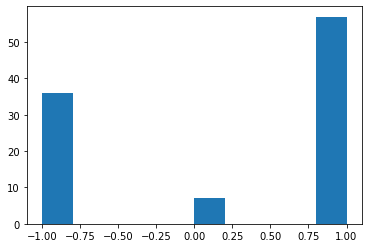

In [91]:
plt.hist(R_q_agent[:100])
plt.show()

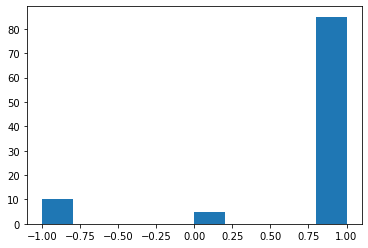

In [92]:
plt.hist(R_q_agent[-100:])
plt.show()

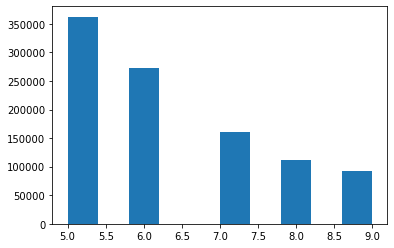

In [93]:
plt.hist(T_q_agent)
plt.show()